In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, notebook=notebook)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

In [60]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 11102018 
rng = np.random.RandomState(seed)
batch_size = 100
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)
test_data =  EMNISTDataProvider('test', batch_size=15800, rng=rng)

KeysView(<numpy.lib.npyio.NpzFile object at 0x7f385da63780>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x7f385e261438>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x7f385e261080>)


In [3]:
def evaluation_acc(dataset, model):
    for inputs, targets in dataset:
        activations = model.fprop(inputs, evaluation=True)
        predictions = activations[-1]
        acc = (predictions.argmax(-1) == targets.argmax(-1)).mean()
    return acc

In [35]:
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import GradientDescentLearningRule, RMSPropLearningRule, AdamLearningRule, AdamLearningRuleWithWeightDecay
from mlp.optimisers import Optimiser
from mlp.penalties import L2Penalty
from collections import OrderedDict
from mlp.schedulers import CosineAnnealingWithWarmRestarts


In [5]:
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100
error = CrossEntropySoftmaxError()
weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

Epoch 1: 2.2s to complete
    error(train)=1.84e+00, acc(train)=5.17e-01, error(valid)=1.85e+00, acc(valid)=5.11e-01


Epoch 2: 2.0s to complete
    error(train)=1.60e+00, acc(train)=5.76e-01, error(valid)=1.61e+00, acc(valid)=5.71e-01


Epoch 3: 1.9s to complete
    error(train)=1.52e+00, acc(train)=5.99e-01, error(valid)=1.52e+00, acc(valid)=5.96e-01


Epoch 4: 2.0s to complete
    error(train)=1.47e+00, acc(train)=6.07e-01, error(valid)=1.47e+00, acc(valid)=6.03e-01


Epoch 5: 2.0s to complete
    error(train)=1.43e+00, acc(train)=6.20e-01, error(valid)=1.43e+00, acc(valid)=6.15e-01


Epoch 6: 1.9s to complete
    error(train)=1.40e+00, acc(train)=6.27e-01, error(valid)=1.40e+00, acc(valid)=6.24e-01


Epoch 7: 1.9s to complete
    error(train)=1.37e+00, acc(train)=6.33e-01, error(valid)=1.37e+00, acc(valid)=6.28e-01


Epoch 8: 2.0s to complete
    error(train)=1.35e+00, acc(train)=6.40e-01, error(valid)=1.35e+00, acc(valid)=6.39e-01


Epoch 9: 1.9s to complete
    error(train)=1.32e+00, acc(train)=6.46e-01, error(valid)=1.33e+00, acc(valid)=6.41e-01


Epoch 10: 1.9s to complete
    error(train)=1.31e+00, acc(train)=6.46e-01, error(valid)=1.31e+00, acc(valid)=6.43e-01


Epoch 11: 2.0s to complete
    error(train)=1.29e+00, acc(train)=6.52e-01, error(valid)=1.30e+00, acc(valid)=6.49e-01


Epoch 12: 1.9s to complete
    error(train)=1.28e+00, acc(train)=6.55e-01, error(valid)=1.29e+00, acc(valid)=6.51e-01


Epoch 13: 1.9s to complete
    error(train)=1.27e+00, acc(train)=6.59e-01, error(valid)=1.27e+00, acc(valid)=6.57e-01


Epoch 14: 2.0s to complete
    error(train)=1.26e+00, acc(train)=6.61e-01, error(valid)=1.27e+00, acc(valid)=6.59e-01


Epoch 15: 1.9s to complete
    error(train)=1.25e+00, acc(train)=6.65e-01, error(valid)=1.25e+00, acc(valid)=6.59e-01


Epoch 16: 1.9s to complete
    error(train)=1.25e+00, acc(train)=6.61e-01, error(valid)=1.25e+00, acc(valid)=6.57e-01


Epoch 17: 2.0s to complete
    error(train)=1.23e+00, acc(train)=6.68e-01, error(valid)=1.24e+00, acc(valid)=6.65e-01


Epoch 18: 2.0s to complete
    error(train)=1.23e+00, acc(train)=6.69e-01, error(valid)=1.23e+00, acc(valid)=6.67e-01


Epoch 19: 2.0s to complete
    error(train)=1.22e+00, acc(train)=6.72e-01, error(valid)=1.23e+00, acc(valid)=6.69e-01


Epoch 20: 2.1s to complete
    error(train)=1.22e+00, acc(train)=6.74e-01, error(valid)=1.22e+00, acc(valid)=6.71e-01


Epoch 21: 2.0s to complete
    error(train)=1.21e+00, acc(train)=6.72e-01, error(valid)=1.22e+00, acc(valid)=6.70e-01


Epoch 22: 2.1s to complete
    error(train)=1.21e+00, acc(train)=6.76e-01, error(valid)=1.21e+00, acc(valid)=6.75e-01


Epoch 23: 2.2s to complete
    error(train)=1.20e+00, acc(train)=6.78e-01, error(valid)=1.20e+00, acc(valid)=6.76e-01


Epoch 24: 2.0s to complete
    error(train)=1.20e+00, acc(train)=6.79e-01, error(valid)=1.20e+00, acc(valid)=6.78e-01


Epoch 25: 2.0s to complete
    error(train)=1.20e+00, acc(train)=6.77e-01, error(valid)=1.21e+00, acc(valid)=6.75e-01


Epoch 26: 2.0s to complete
    error(train)=1.19e+00, acc(train)=6.81e-01, error(valid)=1.19e+00, acc(valid)=6.83e-01


Epoch 27: 2.0s to complete
    error(train)=1.19e+00, acc(train)=6.81e-01, error(valid)=1.19e+00, acc(valid)=6.79e-01


Epoch 28: 2.0s to complete
    error(train)=1.18e+00, acc(train)=6.80e-01, error(valid)=1.19e+00, acc(valid)=6.80e-01


Epoch 29: 2.1s to complete
    error(train)=1.18e+00, acc(train)=6.82e-01, error(valid)=1.19e+00, acc(valid)=6.80e-01


Epoch 30: 2.4s to complete
    error(train)=1.18e+00, acc(train)=6.82e-01, error(valid)=1.18e+00, acc(valid)=6.82e-01


Epoch 31: 2.0s to complete
    error(train)=1.18e+00, acc(train)=6.84e-01, error(valid)=1.18e+00, acc(valid)=6.83e-01


Epoch 32: 2.1s to complete
    error(train)=1.18e+00, acc(train)=6.82e-01, error(valid)=1.18e+00, acc(valid)=6.80e-01


Epoch 33: 2.0s to complete
    error(train)=1.18e+00, acc(train)=6.82e-01, error(valid)=1.18e+00, acc(valid)=6.82e-01


Epoch 34: 2.0s to complete
    error(train)=1.17e+00, acc(train)=6.86e-01, error(valid)=1.17e+00, acc(valid)=6.86e-01


Epoch 35: 2.8s to complete
    error(train)=1.17e+00, acc(train)=6.87e-01, error(valid)=1.17e+00, acc(valid)=6.86e-01


Epoch 36: 3.4s to complete
    error(train)=1.17e+00, acc(train)=6.87e-01, error(valid)=1.17e+00, acc(valid)=6.87e-01


Epoch 37: 4.0s to complete
    error(train)=1.17e+00, acc(train)=6.86e-01, error(valid)=1.17e+00, acc(valid)=6.83e-01


Epoch 38: 5.0s to complete
    error(train)=1.17e+00, acc(train)=6.88e-01, error(valid)=1.17e+00, acc(valid)=6.84e-01


Epoch 39: 5.6s to complete
    error(train)=1.16e+00, acc(train)=6.87e-01, error(valid)=1.17e+00, acc(valid)=6.87e-01


Epoch 40: 5.9s to complete
    error(train)=1.17e+00, acc(train)=6.89e-01, error(valid)=1.17e+00, acc(valid)=6.88e-01


Epoch 41: 6.1s to complete
    error(train)=1.17e+00, acc(train)=6.88e-01, error(valid)=1.17e+00, acc(valid)=6.85e-01


Epoch 42: 6.0s to complete
    error(train)=1.16e+00, acc(train)=6.88e-01, error(valid)=1.16e+00, acc(valid)=6.86e-01


Epoch 43: 6.1s to complete
    error(train)=1.16e+00, acc(train)=6.89e-01, error(valid)=1.16e+00, acc(valid)=6.88e-01


Epoch 44: 6.0s to complete
    error(train)=1.17e+00, acc(train)=6.85e-01, error(valid)=1.17e+00, acc(valid)=6.84e-01


Epoch 45: 6.0s to complete
    error(train)=1.16e+00, acc(train)=6.87e-01, error(valid)=1.17e+00, acc(valid)=6.87e-01


Epoch 46: 6.0s to complete
    error(train)=1.16e+00, acc(train)=6.87e-01, error(valid)=1.16e+00, acc(valid)=6.88e-01


Epoch 47: 6.0s to complete
    error(train)=1.16e+00, acc(train)=6.87e-01, error(valid)=1.16e+00, acc(valid)=6.86e-01


Epoch 48: 6.2s to complete
    error(train)=1.16e+00, acc(train)=6.88e-01, error(valid)=1.16e+00, acc(valid)=6.88e-01


Epoch 49: 6.2s to complete
    error(train)=1.16e+00, acc(train)=6.88e-01, error(valid)=1.17e+00, acc(valid)=6.86e-01


Epoch 50: 6.1s to complete
    error(train)=1.16e+00, acc(train)=6.90e-01, error(valid)=1.16e+00, acc(valid)=6.86e-01


Epoch 51: 6.1s to complete
    error(train)=1.16e+00, acc(train)=6.87e-01, error(valid)=1.16e+00, acc(valid)=6.85e-01


Epoch 52: 6.1s to complete
    error(train)=1.16e+00, acc(train)=6.90e-01, error(valid)=1.16e+00, acc(valid)=6.88e-01


Epoch 53: 6.2s to complete
    error(train)=1.16e+00, acc(train)=6.90e-01, error(valid)=1.16e+00, acc(valid)=6.89e-01


Epoch 54: 6.1s to complete
    error(train)=1.16e+00, acc(train)=6.89e-01, error(valid)=1.16e+00, acc(valid)=6.87e-01


Epoch 55: 6.1s to complete
    error(train)=1.16e+00, acc(train)=6.89e-01, error(valid)=1.16e+00, acc(valid)=6.88e-01


Epoch 56: 6.1s to complete
    error(train)=1.16e+00, acc(train)=6.91e-01, error(valid)=1.16e+00, acc(valid)=6.89e-01


Epoch 57: 6.3s to complete
    error(train)=1.16e+00, acc(train)=6.88e-01, error(valid)=1.16e+00, acc(valid)=6.85e-01


Epoch 58: 6.2s to complete
    error(train)=1.16e+00, acc(train)=6.88e-01, error(valid)=1.16e+00, acc(valid)=6.86e-01


Epoch 59: 6.2s to complete
    error(train)=1.16e+00, acc(train)=6.87e-01, error(valid)=1.16e+00, acc(valid)=6.84e-01


Epoch 60: 6.1s to complete
    error(train)=1.15e+00, acc(train)=6.89e-01, error(valid)=1.16e+00, acc(valid)=6.86e-01


Epoch 61: 6.1s to complete
    error(train)=1.16e+00, acc(train)=6.89e-01, error(valid)=1.16e+00, acc(valid)=6.86e-01


Epoch 62: 6.2s to complete
    error(train)=1.15e+00, acc(train)=6.90e-01, error(valid)=1.15e+00, acc(valid)=6.88e-01


Epoch 63: 6.2s to complete
    error(train)=1.16e+00, acc(train)=6.89e-01, error(valid)=1.16e+00, acc(valid)=6.87e-01


Epoch 64: 6.1s to complete
    error(train)=1.15e+00, acc(train)=6.90e-01, error(valid)=1.16e+00, acc(valid)=6.87e-01


Epoch 65: 6.3s to complete
    error(train)=1.15e+00, acc(train)=6.90e-01, error(valid)=1.16e+00, acc(valid)=6.89e-01


Epoch 66: 6.1s to complete
    error(train)=1.15e+00, acc(train)=6.89e-01, error(valid)=1.16e+00, acc(valid)=6.88e-01


Epoch 67: 6.1s to complete
    error(train)=1.15e+00, acc(train)=6.90e-01, error(valid)=1.16e+00, acc(valid)=6.87e-01


Epoch 68: 6.1s to complete
    error(train)=1.15e+00, acc(train)=6.90e-01, error(valid)=1.15e+00, acc(valid)=6.89e-01


Epoch 69: 6.2s to complete
    error(train)=1.15e+00, acc(train)=6.88e-01, error(valid)=1.16e+00, acc(valid)=6.88e-01


Epoch 70: 6.1s to complete
    error(train)=1.16e+00, acc(train)=6.89e-01, error(valid)=1.16e+00, acc(valid)=6.89e-01


Epoch 71: 6.1s to complete
    error(train)=1.15e+00, acc(train)=6.89e-01, error(valid)=1.15e+00, acc(valid)=6.88e-01


Epoch 72: 6.1s to complete
    error(train)=1.15e+00, acc(train)=6.92e-01, error(valid)=1.15e+00, acc(valid)=6.89e-01


Epoch 73: 6.1s to complete
    error(train)=1.15e+00, acc(train)=6.89e-01, error(valid)=1.15e+00, acc(valid)=6.89e-01


Epoch 74: 6.1s to complete
    error(train)=1.15e+00, acc(train)=6.91e-01, error(valid)=1.15e+00, acc(valid)=6.89e-01


Epoch 75: 6.1s to complete
    error(train)=1.15e+00, acc(train)=6.89e-01, error(valid)=1.15e+00, acc(valid)=6.87e-01


Epoch 76: 6.1s to complete
    error(train)=1.15e+00, acc(train)=6.91e-01, error(valid)=1.15e+00, acc(valid)=6.88e-01


Epoch 77: 6.1s to complete
    error(train)=1.15e+00, acc(train)=6.87e-01, error(valid)=1.16e+00, acc(valid)=6.86e-01


Epoch 78: 6.1s to complete
    error(train)=1.14e+00, acc(train)=6.93e-01, error(valid)=1.15e+00, acc(valid)=6.89e-01


Epoch 79: 6.1s to complete
    error(train)=1.15e+00, acc(train)=6.91e-01, error(valid)=1.15e+00, acc(valid)=6.90e-01


Epoch 80: 6.1s to complete
    error(train)=1.14e+00, acc(train)=6.91e-01, error(valid)=1.15e+00, acc(valid)=6.91e-01


Epoch 81: 6.1s to complete
    error(train)=1.15e+00, acc(train)=6.92e-01, error(valid)=1.15e+00, acc(valid)=6.91e-01


Epoch 82: 6.1s to complete
    error(train)=1.14e+00, acc(train)=6.93e-01, error(valid)=1.14e+00, acc(valid)=6.92e-01


Epoch 83: 6.1s to complete
    error(train)=1.14e+00, acc(train)=6.92e-01, error(valid)=1.15e+00, acc(valid)=6.91e-01


Epoch 84: 6.2s to complete
    error(train)=1.15e+00, acc(train)=6.89e-01, error(valid)=1.15e+00, acc(valid)=6.88e-01


Epoch 85: 6.1s to complete
    error(train)=1.14e+00, acc(train)=6.91e-01, error(valid)=1.15e+00, acc(valid)=6.90e-01


Epoch 86: 6.1s to complete
    error(train)=1.14e+00, acc(train)=6.93e-01, error(valid)=1.14e+00, acc(valid)=6.90e-01


Epoch 87: 6.1s to complete
    error(train)=1.14e+00, acc(train)=6.93e-01, error(valid)=1.15e+00, acc(valid)=6.91e-01


Epoch 88: 6.2s to complete
    error(train)=1.14e+00, acc(train)=6.92e-01, error(valid)=1.15e+00, acc(valid)=6.88e-01


Epoch 89: 6.2s to complete
    error(train)=1.14e+00, acc(train)=6.92e-01, error(valid)=1.15e+00, acc(valid)=6.90e-01


Epoch 90: 6.2s to complete
    error(train)=1.15e+00, acc(train)=6.90e-01, error(valid)=1.15e+00, acc(valid)=6.88e-01


Epoch 91: 6.4s to complete
    error(train)=1.14e+00, acc(train)=6.91e-01, error(valid)=1.15e+00, acc(valid)=6.89e-01


Epoch 92: 6.1s to complete
    error(train)=1.14e+00, acc(train)=6.93e-01, error(valid)=1.14e+00, acc(valid)=6.91e-01


Epoch 93: 6.1s to complete
    error(train)=1.14e+00, acc(train)=6.92e-01, error(valid)=1.14e+00, acc(valid)=6.91e-01


Epoch 94: 6.1s to complete
    error(train)=1.14e+00, acc(train)=6.92e-01, error(valid)=1.15e+00, acc(valid)=6.90e-01


Epoch 95: 6.1s to complete
    error(train)=1.14e+00, acc(train)=6.93e-01, error(valid)=1.15e+00, acc(valid)=6.89e-01


Epoch 96: 6.1s to complete
    error(train)=1.14e+00, acc(train)=6.91e-01, error(valid)=1.15e+00, acc(valid)=6.89e-01


Epoch 97: 6.2s to complete
    error(train)=1.14e+00, acc(train)=6.92e-01, error(valid)=1.14e+00, acc(valid)=6.89e-01


Epoch 98: 6.1s to complete
    error(train)=1.14e+00, acc(train)=6.92e-01, error(valid)=1.14e+00, acc(valid)=6.89e-01


Epoch 99: 6.1s to complete
    error(train)=1.14e+00, acc(train)=6.94e-01, error(valid)=1.14e+00, acc(valid)=6.93e-01


Epoch 100: 6.1s to complete
    error(train)=1.14e+00, acc(train)=6.93e-01, error(valid)=1.14e+00, acc(valid)=6.90e-01


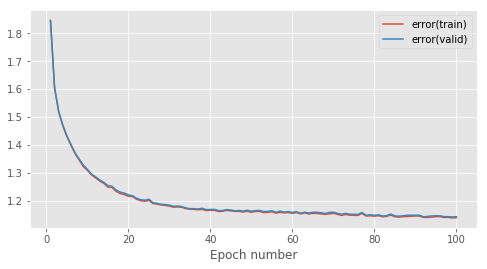

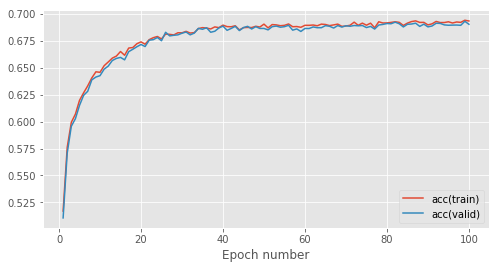

    final error(train) = 1.14e+00
    final error(valid) = 1.14e+00
    final acc(train)   = 6.93e-01
    final acc(valid)   = 6.90e-01
    run time per epoch = 5.48


Epoch 1: 2.0s to complete
    error(train)=1.60e+00, acc(train)=5.76e-01, error(valid)=1.60e+00, acc(valid)=5.71e-01


Epoch 2: 2.0s to complete
    error(train)=1.35e+00, acc(train)=6.31e-01, error(valid)=1.35e+00, acc(valid)=6.26e-01


Epoch 3: 2.4s to complete
    error(train)=1.26e+00, acc(train)=6.55e-01, error(valid)=1.26e+00, acc(valid)=6.49e-01


Epoch 4: 2.0s to complete
    error(train)=1.20e+00, acc(train)=6.69e-01, error(valid)=1.20e+00, acc(valid)=6.65e-01


Epoch 5: 2.0s to complete
    error(train)=1.15e+00, acc(train)=6.80e-01, error(valid)=1.16e+00, acc(valid)=6.76e-01


Epoch 6: 2.0s to complete
    error(train)=1.12e+00, acc(train)=6.88e-01, error(valid)=1.12e+00, acc(valid)=6.84e-01


Epoch 7: 2.0s to complete
    error(train)=1.09e+00, acc(train)=6.99e-01, error(valid)=1.09e+00, acc(valid)=6.92e-01


Epoch 8: 2.0s to complete
    error(train)=1.06e+00, acc(train)=7.01e-01, error(valid)=1.07e+00, acc(valid)=6.96e-01


Epoch 9: 2.0s to complete
    error(train)=1.04e+00, acc(train)=7.11e-01, error(valid)=1.04e+00, acc(valid)=7.05e-01


Epoch 10: 2.0s to complete
    error(train)=1.02e+00, acc(train)=7.14e-01, error(valid)=1.03e+00, acc(valid)=7.09e-01


Epoch 11: 2.0s to complete
    error(train)=1.00e+00, acc(train)=7.21e-01, error(valid)=1.01e+00, acc(valid)=7.17e-01


Epoch 12: 2.0s to complete
    error(train)=9.90e-01, acc(train)=7.22e-01, error(valid)=9.94e-01, acc(valid)=7.17e-01


Epoch 13: 1.9s to complete
    error(train)=9.76e-01, acc(train)=7.27e-01, error(valid)=9.81e-01, acc(valid)=7.21e-01


Epoch 14: 2.0s to complete
    error(train)=9.66e-01, acc(train)=7.27e-01, error(valid)=9.71e-01, acc(valid)=7.23e-01


Epoch 15: 2.3s to complete
    error(train)=9.52e-01, acc(train)=7.34e-01, error(valid)=9.57e-01, acc(valid)=7.29e-01


Epoch 16: 2.0s to complete
    error(train)=9.38e-01, acc(train)=7.38e-01, error(valid)=9.44e-01, acc(valid)=7.32e-01


Epoch 17: 1.9s to complete
    error(train)=9.37e-01, acc(train)=7.34e-01, error(valid)=9.42e-01, acc(valid)=7.29e-01


Epoch 18: 2.1s to complete
    error(train)=9.21e-01, acc(train)=7.42e-01, error(valid)=9.27e-01, acc(valid)=7.36e-01


Epoch 19: 2.2s to complete
    error(train)=9.17e-01, acc(train)=7.41e-01, error(valid)=9.23e-01, acc(valid)=7.36e-01


Epoch 20: 2.1s to complete
    error(train)=9.05e-01, acc(train)=7.46e-01, error(valid)=9.10e-01, acc(valid)=7.39e-01


Epoch 21: 2.0s to complete
    error(train)=9.04e-01, acc(train)=7.44e-01, error(valid)=9.09e-01, acc(valid)=7.38e-01


Epoch 22: 1.9s to complete
    error(train)=8.94e-01, acc(train)=7.47e-01, error(valid)=8.99e-01, acc(valid)=7.44e-01


Epoch 23: 2.0s to complete
    error(train)=8.93e-01, acc(train)=7.49e-01, error(valid)=8.99e-01, acc(valid)=7.44e-01


Epoch 24: 2.0s to complete
    error(train)=8.87e-01, acc(train)=7.49e-01, error(valid)=8.94e-01, acc(valid)=7.46e-01


Epoch 25: 2.0s to complete
    error(train)=8.83e-01, acc(train)=7.51e-01, error(valid)=8.88e-01, acc(valid)=7.46e-01


Epoch 26: 2.0s to complete
    error(train)=8.78e-01, acc(train)=7.53e-01, error(valid)=8.83e-01, acc(valid)=7.51e-01


Epoch 27: 2.0s to complete
    error(train)=8.74e-01, acc(train)=7.54e-01, error(valid)=8.79e-01, acc(valid)=7.48e-01


Epoch 28: 1.9s to complete
    error(train)=8.73e-01, acc(train)=7.53e-01, error(valid)=8.80e-01, acc(valid)=7.48e-01


Epoch 29: 2.1s to complete
    error(train)=8.67e-01, acc(train)=7.54e-01, error(valid)=8.73e-01, acc(valid)=7.47e-01


Epoch 30: 2.0s to complete
    error(train)=8.60e-01, acc(train)=7.57e-01, error(valid)=8.66e-01, acc(valid)=7.53e-01


Epoch 31: 2.1s to complete
    error(train)=8.59e-01, acc(train)=7.58e-01, error(valid)=8.63e-01, acc(valid)=7.54e-01


Epoch 32: 2.0s to complete
    error(train)=8.54e-01, acc(train)=7.59e-01, error(valid)=8.60e-01, acc(valid)=7.56e-01


Epoch 33: 2.0s to complete
    error(train)=8.60e-01, acc(train)=7.57e-01, error(valid)=8.65e-01, acc(valid)=7.53e-01


Epoch 34: 2.0s to complete
    error(train)=8.50e-01, acc(train)=7.60e-01, error(valid)=8.55e-01, acc(valid)=7.57e-01


Epoch 35: 2.3s to complete
    error(train)=8.48e-01, acc(train)=7.60e-01, error(valid)=8.52e-01, acc(valid)=7.56e-01


Epoch 36: 2.2s to complete
    error(train)=8.47e-01, acc(train)=7.61e-01, error(valid)=8.52e-01, acc(valid)=7.57e-01


Epoch 37: 2.2s to complete
    error(train)=8.44e-01, acc(train)=7.58e-01, error(valid)=8.51e-01, acc(valid)=7.53e-01


Epoch 38: 2.1s to complete
    error(train)=8.41e-01, acc(train)=7.63e-01, error(valid)=8.47e-01, acc(valid)=7.60e-01


Epoch 39: 2.0s to complete
    error(train)=8.40e-01, acc(train)=7.63e-01, error(valid)=8.46e-01, acc(valid)=7.59e-01


Epoch 40: 2.0s to complete
    error(train)=8.39e-01, acc(train)=7.63e-01, error(valid)=8.44e-01, acc(valid)=7.59e-01


Epoch 41: 2.0s to complete
    error(train)=8.36e-01, acc(train)=7.62e-01, error(valid)=8.42e-01, acc(valid)=7.58e-01


Epoch 42: 2.3s to complete
    error(train)=8.34e-01, acc(train)=7.62e-01, error(valid)=8.40e-01, acc(valid)=7.58e-01


Epoch 43: 2.0s to complete
    error(train)=8.34e-01, acc(train)=7.64e-01, error(valid)=8.39e-01, acc(valid)=7.60e-01


Epoch 44: 2.0s to complete
    error(train)=8.33e-01, acc(train)=7.63e-01, error(valid)=8.39e-01, acc(valid)=7.60e-01


Epoch 45: 2.0s to complete
    error(train)=8.29e-01, acc(train)=7.65e-01, error(valid)=8.35e-01, acc(valid)=7.63e-01


Epoch 46: 2.0s to complete
    error(train)=8.29e-01, acc(train)=7.67e-01, error(valid)=8.33e-01, acc(valid)=7.65e-01


Epoch 47: 2.0s to complete
    error(train)=8.27e-01, acc(train)=7.66e-01, error(valid)=8.32e-01, acc(valid)=7.63e-01


Epoch 48: 2.0s to complete
    error(train)=8.26e-01, acc(train)=7.65e-01, error(valid)=8.33e-01, acc(valid)=7.61e-01


Epoch 49: 2.0s to complete
    error(train)=8.29e-01, acc(train)=7.65e-01, error(valid)=8.35e-01, acc(valid)=7.62e-01


Epoch 50: 2.0s to complete
    error(train)=8.27e-01, acc(train)=7.64e-01, error(valid)=8.34e-01, acc(valid)=7.60e-01


Epoch 51: 2.0s to complete
    error(train)=8.25e-01, acc(train)=7.68e-01, error(valid)=8.30e-01, acc(valid)=7.65e-01


Epoch 52: 2.0s to complete
    error(train)=8.22e-01, acc(train)=7.67e-01, error(valid)=8.28e-01, acc(valid)=7.66e-01


Epoch 53: 2.2s to complete
    error(train)=8.24e-01, acc(train)=7.66e-01, error(valid)=8.31e-01, acc(valid)=7.63e-01


Epoch 54: 2.0s to complete
    error(train)=8.19e-01, acc(train)=7.68e-01, error(valid)=8.26e-01, acc(valid)=7.65e-01


Epoch 55: 2.1s to complete
    error(train)=8.17e-01, acc(train)=7.69e-01, error(valid)=8.24e-01, acc(valid)=7.67e-01


Epoch 56: 2.0s to complete
    error(train)=8.17e-01, acc(train)=7.69e-01, error(valid)=8.24e-01, acc(valid)=7.68e-01


Epoch 57: 2.0s to complete
    error(train)=8.18e-01, acc(train)=7.68e-01, error(valid)=8.26e-01, acc(valid)=7.65e-01


Epoch 58: 2.1s to complete
    error(train)=8.14e-01, acc(train)=7.69e-01, error(valid)=8.21e-01, acc(valid)=7.65e-01


Epoch 59: 2.0s to complete
    error(train)=8.20e-01, acc(train)=7.68e-01, error(valid)=8.26e-01, acc(valid)=7.64e-01


Epoch 60: 2.0s to complete
    error(train)=8.16e-01, acc(train)=7.69e-01, error(valid)=8.24e-01, acc(valid)=7.66e-01


Epoch 61: 2.0s to complete
    error(train)=8.12e-01, acc(train)=7.70e-01, error(valid)=8.19e-01, acc(valid)=7.68e-01


Epoch 62: 2.0s to complete
    error(train)=8.12e-01, acc(train)=7.71e-01, error(valid)=8.19e-01, acc(valid)=7.68e-01


Epoch 63: 2.2s to complete
    error(train)=8.13e-01, acc(train)=7.70e-01, error(valid)=8.20e-01, acc(valid)=7.66e-01


Epoch 64: 2.1s to complete
    error(train)=8.08e-01, acc(train)=7.70e-01, error(valid)=8.15e-01, acc(valid)=7.68e-01


Epoch 65: 1.9s to complete
    error(train)=8.10e-01, acc(train)=7.70e-01, error(valid)=8.19e-01, acc(valid)=7.67e-01


Epoch 66: 2.0s to complete
    error(train)=8.10e-01, acc(train)=7.72e-01, error(valid)=8.17e-01, acc(valid)=7.70e-01


Epoch 67: 2.0s to complete
    error(train)=8.08e-01, acc(train)=7.71e-01, error(valid)=8.16e-01, acc(valid)=7.68e-01


Epoch 68: 2.0s to complete
    error(train)=8.06e-01, acc(train)=7.72e-01, error(valid)=8.14e-01, acc(valid)=7.69e-01


Epoch 69: 2.2s to complete
    error(train)=8.08e-01, acc(train)=7.72e-01, error(valid)=8.15e-01, acc(valid)=7.67e-01


Epoch 70: 2.9s to complete
    error(train)=8.09e-01, acc(train)=7.71e-01, error(valid)=8.15e-01, acc(valid)=7.70e-01


Epoch 71: 3.9s to complete
    error(train)=8.04e-01, acc(train)=7.73e-01, error(valid)=8.11e-01, acc(valid)=7.69e-01


Epoch 72: 5.0s to complete
    error(train)=8.06e-01, acc(train)=7.72e-01, error(valid)=8.13e-01, acc(valid)=7.68e-01


Epoch 73: 5.4s to complete
    error(train)=8.09e-01, acc(train)=7.70e-01, error(valid)=8.16e-01, acc(valid)=7.67e-01


Epoch 74: 5.7s to complete
    error(train)=8.03e-01, acc(train)=7.72e-01, error(valid)=8.10e-01, acc(valid)=7.69e-01


Epoch 75: 5.8s to complete
    error(train)=8.07e-01, acc(train)=7.72e-01, error(valid)=8.15e-01, acc(valid)=7.68e-01


Epoch 76: 5.8s to complete
    error(train)=8.03e-01, acc(train)=7.72e-01, error(valid)=8.11e-01, acc(valid)=7.67e-01


Epoch 77: 5.8s to complete
    error(train)=8.04e-01, acc(train)=7.72e-01, error(valid)=8.11e-01, acc(valid)=7.68e-01


Epoch 78: 5.8s to complete
    error(train)=8.00e-01, acc(train)=7.73e-01, error(valid)=8.08e-01, acc(valid)=7.69e-01


Epoch 79: 5.8s to complete
    error(train)=8.02e-01, acc(train)=7.72e-01, error(valid)=8.10e-01, acc(valid)=7.68e-01


Epoch 80: 5.8s to complete
    error(train)=8.02e-01, acc(train)=7.73e-01, error(valid)=8.11e-01, acc(valid)=7.68e-01


Epoch 81: 5.8s to complete
    error(train)=8.03e-01, acc(train)=7.73e-01, error(valid)=8.11e-01, acc(valid)=7.68e-01


Epoch 82: 5.8s to complete
    error(train)=8.01e-01, acc(train)=7.73e-01, error(valid)=8.09e-01, acc(valid)=7.68e-01


Epoch 83: 5.8s to complete
    error(train)=7.98e-01, acc(train)=7.74e-01, error(valid)=8.06e-01, acc(valid)=7.71e-01


Epoch 84: 5.9s to complete
    error(train)=7.99e-01, acc(train)=7.72e-01, error(valid)=8.07e-01, acc(valid)=7.69e-01


Epoch 85: 5.9s to complete
    error(train)=8.03e-01, acc(train)=7.72e-01, error(valid)=8.10e-01, acc(valid)=7.67e-01


Epoch 86: 5.8s to complete
    error(train)=8.00e-01, acc(train)=7.73e-01, error(valid)=8.09e-01, acc(valid)=7.69e-01


Epoch 87: 5.8s to complete
    error(train)=7.98e-01, acc(train)=7.74e-01, error(valid)=8.07e-01, acc(valid)=7.69e-01


Epoch 88: 5.8s to complete
    error(train)=7.97e-01, acc(train)=7.74e-01, error(valid)=8.05e-01, acc(valid)=7.72e-01


Epoch 89: 5.8s to complete
    error(train)=7.97e-01, acc(train)=7.74e-01, error(valid)=8.06e-01, acc(valid)=7.69e-01


Epoch 90: 5.8s to complete
    error(train)=8.00e-01, acc(train)=7.73e-01, error(valid)=8.09e-01, acc(valid)=7.67e-01


Epoch 91: 5.8s to complete
    error(train)=7.96e-01, acc(train)=7.73e-01, error(valid)=8.05e-01, acc(valid)=7.69e-01


Epoch 92: 5.8s to complete
    error(train)=7.98e-01, acc(train)=7.73e-01, error(valid)=8.09e-01, acc(valid)=7.68e-01


Epoch 93: 5.8s to complete
    error(train)=7.96e-01, acc(train)=7.73e-01, error(valid)=8.05e-01, acc(valid)=7.69e-01


Epoch 94: 5.8s to complete
    error(train)=7.99e-01, acc(train)=7.73e-01, error(valid)=8.09e-01, acc(valid)=7.68e-01


Epoch 95: 5.8s to complete
    error(train)=7.96e-01, acc(train)=7.72e-01, error(valid)=8.06e-01, acc(valid)=7.68e-01


Epoch 96: 5.8s to complete
    error(train)=7.92e-01, acc(train)=7.75e-01, error(valid)=8.01e-01, acc(valid)=7.70e-01


Epoch 97: 5.8s to complete
    error(train)=7.97e-01, acc(train)=7.74e-01, error(valid)=8.06e-01, acc(valid)=7.69e-01


Epoch 98: 5.8s to complete
    error(train)=7.98e-01, acc(train)=7.74e-01, error(valid)=8.07e-01, acc(valid)=7.68e-01


Epoch 99: 5.8s to complete
    error(train)=7.93e-01, acc(train)=7.75e-01, error(valid)=8.03e-01, acc(valid)=7.70e-01


Epoch 100: 5.8s to complete
    error(train)=7.96e-01, acc(train)=7.72e-01, error(valid)=8.05e-01, acc(valid)=7.66e-01


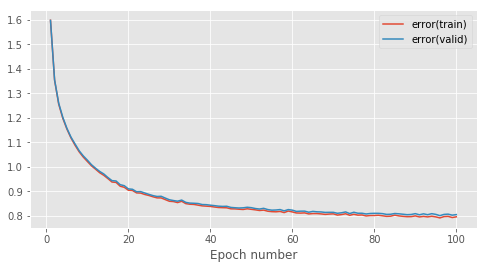

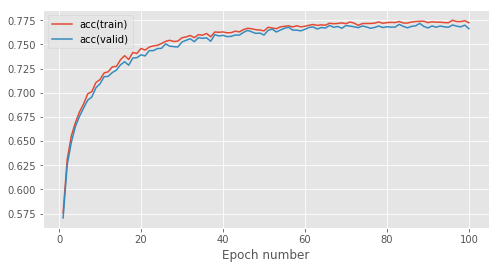

    final error(train) = 7.96e-01
    final error(valid) = 8.05e-01
    final acc(train)   = 7.72e-01
    final acc(valid)   = 7.66e-01
    run time per epoch = 3.90


Epoch 1: 2.0s to complete
    error(train)=1.43e+00, acc(train)=6.10e-01, error(valid)=1.43e+00, acc(valid)=6.08e-01


Epoch 2: 2.0s to complete
    error(train)=1.18e+00, acc(train)=6.68e-01, error(valid)=1.18e+00, acc(valid)=6.69e-01


Epoch 3: 2.0s to complete
    error(train)=1.05e+00, acc(train)=7.02e-01, error(valid)=1.06e+00, acc(valid)=6.99e-01


Epoch 4: 2.2s to complete
    error(train)=9.64e-01, acc(train)=7.23e-01, error(valid)=9.74e-01, acc(valid)=7.21e-01


Epoch 5: 2.0s to complete
    error(train)=9.05e-01, acc(train)=7.37e-01, error(valid)=9.19e-01, acc(valid)=7.31e-01


Epoch 6: 2.2s to complete
    error(train)=8.51e-01, acc(train)=7.51e-01, error(valid)=8.68e-01, acc(valid)=7.48e-01


Epoch 7: 2.0s to complete
    error(train)=8.08e-01, acc(train)=7.60e-01, error(valid)=8.28e-01, acc(valid)=7.53e-01


Epoch 8: 2.1s to complete
    error(train)=7.76e-01, acc(train)=7.68e-01, error(valid)=7.98e-01, acc(valid)=7.66e-01


Epoch 9: 2.2s to complete
    error(train)=7.42e-01, acc(train)=7.78e-01, error(valid)=7.64e-01, acc(valid)=7.72e-01


Epoch 10: 2.1s to complete
    error(train)=7.18e-01, acc(train)=7.83e-01, error(valid)=7.41e-01, acc(valid)=7.78e-01


Epoch 11: 2.0s to complete
    error(train)=6.92e-01, acc(train)=7.91e-01, error(valid)=7.19e-01, acc(valid)=7.84e-01


Epoch 12: 2.1s to complete
    error(train)=6.78e-01, acc(train)=7.93e-01, error(valid)=7.05e-01, acc(valid)=7.86e-01


Epoch 13: 2.0s to complete
    error(train)=6.58e-01, acc(train)=7.99e-01, error(valid)=6.87e-01, acc(valid)=7.92e-01


Epoch 14: 2.0s to complete
    error(train)=6.47e-01, acc(train)=8.02e-01, error(valid)=6.78e-01, acc(valid)=7.93e-01


Epoch 15: 2.0s to complete
    error(train)=6.34e-01, acc(train)=8.06e-01, error(valid)=6.68e-01, acc(valid)=7.98e-01


Epoch 16: 2.1s to complete
    error(train)=6.18e-01, acc(train)=8.10e-01, error(valid)=6.53e-01, acc(valid)=8.00e-01


Epoch 17: 2.2s to complete
    error(train)=6.07e-01, acc(train)=8.12e-01, error(valid)=6.43e-01, acc(valid)=8.01e-01


Epoch 18: 2.1s to complete
    error(train)=5.96e-01, acc(train)=8.14e-01, error(valid)=6.33e-01, acc(valid)=8.03e-01


Epoch 19: 2.0s to complete
    error(train)=5.88e-01, acc(train)=8.17e-01, error(valid)=6.25e-01, acc(valid)=8.08e-01


Epoch 20: 2.1s to complete
    error(train)=5.83e-01, acc(train)=8.18e-01, error(valid)=6.21e-01, acc(valid)=8.08e-01


Epoch 21: 2.0s to complete
    error(train)=5.73e-01, acc(train)=8.22e-01, error(valid)=6.13e-01, acc(valid)=8.09e-01


Epoch 22: 2.0s to complete
    error(train)=5.64e-01, acc(train)=8.24e-01, error(valid)=6.05e-01, acc(valid)=8.12e-01


Epoch 23: 2.3s to complete
    error(train)=5.60e-01, acc(train)=8.25e-01, error(valid)=6.03e-01, acc(valid)=8.11e-01


Epoch 24: 2.1s to complete
    error(train)=5.55e-01, acc(train)=8.25e-01, error(valid)=5.99e-01, acc(valid)=8.13e-01


Epoch 25: 2.0s to complete
    error(train)=5.46e-01, acc(train)=8.28e-01, error(valid)=5.92e-01, acc(valid)=8.15e-01


Epoch 26: 2.0s to complete
    error(train)=5.41e-01, acc(train)=8.29e-01, error(valid)=5.86e-01, acc(valid)=8.15e-01


Epoch 27: 2.0s to complete
    error(train)=5.34e-01, acc(train)=8.31e-01, error(valid)=5.82e-01, acc(valid)=8.18e-01


Epoch 28: 2.0s to complete
    error(train)=5.27e-01, acc(train)=8.33e-01, error(valid)=5.76e-01, acc(valid)=8.17e-01


Epoch 29: 2.0s to complete
    error(train)=5.26e-01, acc(train)=8.33e-01, error(valid)=5.76e-01, acc(valid)=8.14e-01


Epoch 30: 2.2s to complete
    error(train)=5.19e-01, acc(train)=8.35e-01, error(valid)=5.70e-01, acc(valid)=8.20e-01


Epoch 31: 2.0s to complete
    error(train)=5.16e-01, acc(train)=8.34e-01, error(valid)=5.68e-01, acc(valid)=8.19e-01


Epoch 32: 2.0s to complete
    error(train)=5.11e-01, acc(train)=8.37e-01, error(valid)=5.63e-01, acc(valid)=8.21e-01


Epoch 33: 2.1s to complete
    error(train)=5.06e-01, acc(train)=8.38e-01, error(valid)=5.58e-01, acc(valid)=8.22e-01


Epoch 34: 2.2s to complete
    error(train)=5.03e-01, acc(train)=8.39e-01, error(valid)=5.57e-01, acc(valid)=8.21e-01


Epoch 35: 2.0s to complete
    error(train)=4.98e-01, acc(train)=8.41e-01, error(valid)=5.53e-01, acc(valid)=8.22e-01


Epoch 36: 2.2s to complete
    error(train)=4.96e-01, acc(train)=8.43e-01, error(valid)=5.51e-01, acc(valid)=8.23e-01


Epoch 37: 2.1s to complete
    error(train)=4.94e-01, acc(train)=8.43e-01, error(valid)=5.50e-01, acc(valid)=8.26e-01


Epoch 38: 2.0s to complete
    error(train)=4.86e-01, acc(train)=8.45e-01, error(valid)=5.43e-01, acc(valid)=8.25e-01


Epoch 39: 2.0s to complete
    error(train)=4.88e-01, acc(train)=8.43e-01, error(valid)=5.46e-01, acc(valid)=8.25e-01


Epoch 40: 2.0s to complete
    error(train)=4.83e-01, acc(train)=8.44e-01, error(valid)=5.41e-01, acc(valid)=8.26e-01


Epoch 41: 2.0s to complete
    error(train)=4.80e-01, acc(train)=8.46e-01, error(valid)=5.39e-01, acc(valid)=8.26e-01


Epoch 42: 2.0s to complete
    error(train)=4.76e-01, acc(train)=8.47e-01, error(valid)=5.37e-01, acc(valid)=8.27e-01


Epoch 43: 2.0s to complete
    error(train)=4.77e-01, acc(train)=8.45e-01, error(valid)=5.37e-01, acc(valid)=8.26e-01


Epoch 44: 2.0s to complete
    error(train)=4.71e-01, acc(train)=8.48e-01, error(valid)=5.30e-01, acc(valid)=8.29e-01


Epoch 45: 2.0s to complete
    error(train)=4.77e-01, acc(train)=8.46e-01, error(valid)=5.36e-01, acc(valid)=8.30e-01


Epoch 46: 2.2s to complete
    error(train)=4.65e-01, acc(train)=8.49e-01, error(valid)=5.27e-01, acc(valid)=8.30e-01


Epoch 47: 2.1s to complete
    error(train)=4.68e-01, acc(train)=8.48e-01, error(valid)=5.29e-01, acc(valid)=8.28e-01


Epoch 48: 2.0s to complete
    error(train)=4.63e-01, acc(train)=8.50e-01, error(valid)=5.28e-01, acc(valid)=8.30e-01


Epoch 49: 2.0s to complete
    error(train)=4.63e-01, acc(train)=8.49e-01, error(valid)=5.27e-01, acc(valid)=8.26e-01


Epoch 50: 2.0s to complete
    error(train)=4.58e-01, acc(train)=8.53e-01, error(valid)=5.23e-01, acc(valid)=8.29e-01


Epoch 51: 2.1s to complete
    error(train)=4.58e-01, acc(train)=8.50e-01, error(valid)=5.23e-01, acc(valid)=8.31e-01


Epoch 52: 2.0s to complete
    error(train)=4.53e-01, acc(train)=8.54e-01, error(valid)=5.18e-01, acc(valid)=8.32e-01


Epoch 53: 2.0s to complete
    error(train)=4.50e-01, acc(train)=8.55e-01, error(valid)=5.17e-01, acc(valid)=8.32e-01


Epoch 54: 2.0s to complete
    error(train)=4.47e-01, acc(train)=8.55e-01, error(valid)=5.13e-01, acc(valid)=8.33e-01


Epoch 55: 2.1s to complete
    error(train)=4.52e-01, acc(train)=8.52e-01, error(valid)=5.20e-01, acc(valid)=8.30e-01


Epoch 56: 2.1s to complete
    error(train)=4.46e-01, acc(train)=8.55e-01, error(valid)=5.16e-01, acc(valid)=8.33e-01


Epoch 57: 2.1s to complete
    error(train)=4.46e-01, acc(train)=8.54e-01, error(valid)=5.14e-01, acc(valid)=8.33e-01


Epoch 58: 2.2s to complete
    error(train)=4.41e-01, acc(train)=8.56e-01, error(valid)=5.10e-01, acc(valid)=8.34e-01


Epoch 59: 2.0s to complete
    error(train)=4.41e-01, acc(train)=8.56e-01, error(valid)=5.09e-01, acc(valid)=8.34e-01


Epoch 60: 2.0s to complete
    error(train)=4.37e-01, acc(train)=8.57e-01, error(valid)=5.06e-01, acc(valid)=8.35e-01


Epoch 61: 2.0s to complete
    error(train)=4.41e-01, acc(train)=8.55e-01, error(valid)=5.13e-01, acc(valid)=8.34e-01


Epoch 62: 2.0s to complete
    error(train)=4.33e-01, acc(train)=8.59e-01, error(valid)=5.04e-01, acc(valid)=8.34e-01


Epoch 63: 2.0s to complete
    error(train)=4.37e-01, acc(train)=8.55e-01, error(valid)=5.07e-01, acc(valid)=8.33e-01


Epoch 64: 2.0s to complete
    error(train)=4.33e-01, acc(train)=8.58e-01, error(valid)=5.05e-01, acc(valid)=8.34e-01


Epoch 65: 2.1s to complete
    error(train)=4.30e-01, acc(train)=8.59e-01, error(valid)=5.02e-01, acc(valid)=8.35e-01


Epoch 66: 2.1s to complete
    error(train)=4.28e-01, acc(train)=8.60e-01, error(valid)=5.00e-01, acc(valid)=8.37e-01


Epoch 67: 2.2s to complete
    error(train)=4.27e-01, acc(train)=8.60e-01, error(valid)=5.00e-01, acc(valid)=8.38e-01


Epoch 68: 2.1s to complete
    error(train)=4.25e-01, acc(train)=8.62e-01, error(valid)=4.99e-01, acc(valid)=8.38e-01


Epoch 69: 2.0s to complete
    error(train)=4.27e-01, acc(train)=8.60e-01, error(valid)=5.02e-01, acc(valid)=8.35e-01


Epoch 70: 2.0s to complete
    error(train)=4.24e-01, acc(train)=8.61e-01, error(valid)=4.98e-01, acc(valid)=8.38e-01


Epoch 71: 2.0s to complete
    error(train)=4.24e-01, acc(train)=8.61e-01, error(valid)=4.99e-01, acc(valid)=8.38e-01


Epoch 72: 2.1s to complete
    error(train)=4.25e-01, acc(train)=8.60e-01, error(valid)=5.02e-01, acc(valid)=8.37e-01


Epoch 73: 2.0s to complete
    error(train)=4.26e-01, acc(train)=8.59e-01, error(valid)=5.03e-01, acc(valid)=8.35e-01


Epoch 74: 2.0s to complete
    error(train)=4.18e-01, acc(train)=8.63e-01, error(valid)=4.97e-01, acc(valid)=8.36e-01


Epoch 75: 2.0s to complete
    error(train)=4.18e-01, acc(train)=8.62e-01, error(valid)=4.95e-01, acc(valid)=8.39e-01


Epoch 76: 2.0s to complete
    error(train)=4.17e-01, acc(train)=8.63e-01, error(valid)=4.94e-01, acc(valid)=8.39e-01


Epoch 77: 2.0s to complete
    error(train)=4.17e-01, acc(train)=8.62e-01, error(valid)=4.95e-01, acc(valid)=8.37e-01


Epoch 78: 2.0s to complete
    error(train)=4.17e-01, acc(train)=8.64e-01, error(valid)=4.94e-01, acc(valid)=8.39e-01


Epoch 79: 2.1s to complete
    error(train)=4.14e-01, acc(train)=8.64e-01, error(valid)=4.90e-01, acc(valid)=8.39e-01


Epoch 80: 2.0s to complete
    error(train)=4.13e-01, acc(train)=8.63e-01, error(valid)=4.93e-01, acc(valid)=8.38e-01


Epoch 81: 2.0s to complete
    error(train)=4.11e-01, acc(train)=8.65e-01, error(valid)=4.88e-01, acc(valid)=8.41e-01


Epoch 82: 2.1s to complete
    error(train)=4.11e-01, acc(train)=8.64e-01, error(valid)=4.91e-01, acc(valid)=8.38e-01


Epoch 83: 2.0s to complete
    error(train)=4.08e-01, acc(train)=8.65e-01, error(valid)=4.88e-01, acc(valid)=8.40e-01


Epoch 84: 2.0s to complete
    error(train)=4.06e-01, acc(train)=8.66e-01, error(valid)=4.87e-01, acc(valid)=8.41e-01


Epoch 85: 2.2s to complete
    error(train)=4.07e-01, acc(train)=8.67e-01, error(valid)=4.86e-01, acc(valid)=8.41e-01


Epoch 86: 2.0s to complete
    error(train)=4.05e-01, acc(train)=8.66e-01, error(valid)=4.86e-01, acc(valid)=8.40e-01


Epoch 87: 2.0s to complete
    error(train)=4.03e-01, acc(train)=8.66e-01, error(valid)=4.85e-01, acc(valid)=8.41e-01


Epoch 88: 2.0s to complete
    error(train)=4.07e-01, acc(train)=8.65e-01, error(valid)=4.88e-01, acc(valid)=8.41e-01


Epoch 89: 2.0s to complete
    error(train)=4.02e-01, acc(train)=8.67e-01, error(valid)=4.83e-01, acc(valid)=8.40e-01


Epoch 90: 2.0s to complete
    error(train)=4.00e-01, acc(train)=8.67e-01, error(valid)=4.81e-01, acc(valid)=8.42e-01


Epoch 91: 2.1s to complete
    error(train)=4.03e-01, acc(train)=8.67e-01, error(valid)=4.87e-01, acc(valid)=8.39e-01


Epoch 92: 2.1s to complete
    error(train)=3.99e-01, acc(train)=8.68e-01, error(valid)=4.81e-01, acc(valid)=8.42e-01


Epoch 93: 2.1s to complete
    error(train)=3.97e-01, acc(train)=8.69e-01, error(valid)=4.80e-01, acc(valid)=8.42e-01


Epoch 94: 2.0s to complete
    error(train)=3.97e-01, acc(train)=8.69e-01, error(valid)=4.80e-01, acc(valid)=8.42e-01


Epoch 95: 2.1s to complete
    error(train)=3.97e-01, acc(train)=8.68e-01, error(valid)=4.81e-01, acc(valid)=8.41e-01


Epoch 96: 2.1s to complete
    error(train)=3.99e-01, acc(train)=8.67e-01, error(valid)=4.84e-01, acc(valid)=8.39e-01


Epoch 97: 2.1s to complete
    error(train)=3.97e-01, acc(train)=8.69e-01, error(valid)=4.79e-01, acc(valid)=8.42e-01


Epoch 98: 2.0s to complete
    error(train)=3.94e-01, acc(train)=8.69e-01, error(valid)=4.79e-01, acc(valid)=8.41e-01


Epoch 99: 2.0s to complete
    error(train)=3.94e-01, acc(train)=8.69e-01, error(valid)=4.80e-01, acc(valid)=8.42e-01


Epoch 100: 2.0s to complete
    error(train)=3.94e-01, acc(train)=8.70e-01, error(valid)=4.77e-01, acc(valid)=8.42e-01


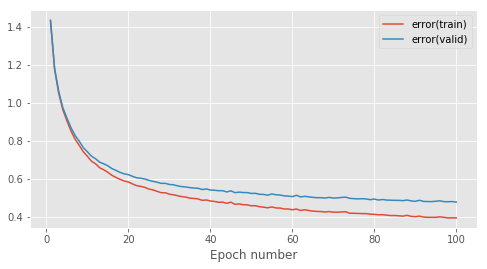

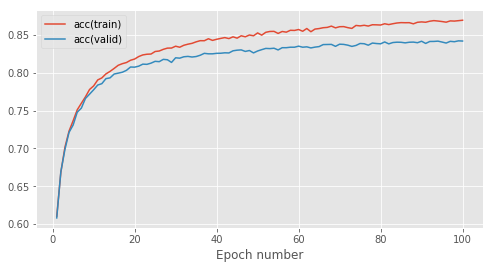

    final error(train) = 3.94e-01
    final error(valid) = 4.77e-01
    final acc(train)   = 8.70e-01
    final acc(valid)   = 8.42e-01
    run time per epoch = 2.78


Epoch 1: 2.0s to complete
    error(train)=1.45e+00, acc(train)=6.02e-01, error(valid)=1.45e+00, acc(valid)=5.97e-01


Epoch 2: 2.0s to complete
    error(train)=1.19e+00, acc(train)=6.65e-01, error(valid)=1.20e+00, acc(valid)=6.64e-01


Epoch 3: 2.1s to complete
    error(train)=1.07e+00, acc(train)=6.95e-01, error(valid)=1.07e+00, acc(valid)=6.93e-01


Epoch 4: 2.0s to complete
    error(train)=9.79e-01, acc(train)=7.20e-01, error(valid)=9.91e-01, acc(valid)=7.14e-01


Epoch 5: 2.0s to complete
    error(train)=9.07e-01, acc(train)=7.36e-01, error(valid)=9.24e-01, acc(valid)=7.32e-01


Epoch 6: 2.2s to complete
    error(train)=8.56e-01, acc(train)=7.48e-01, error(valid)=8.74e-01, acc(valid)=7.43e-01


Epoch 7: 2.0s to complete
    error(train)=8.10e-01, acc(train)=7.59e-01, error(valid)=8.33e-01, acc(valid)=7.52e-01


Epoch 8: 2.0s to complete
    error(train)=7.76e-01, acc(train)=7.69e-01, error(valid)=7.99e-01, acc(valid)=7.63e-01


Epoch 9: 2.0s to complete
    error(train)=7.44e-01, acc(train)=7.76e-01, error(valid)=7.72e-01, acc(valid)=7.69e-01


Epoch 10: 2.0s to complete
    error(train)=7.16e-01, acc(train)=7.84e-01, error(valid)=7.46e-01, acc(valid)=7.75e-01


Epoch 11: 2.1s to complete
    error(train)=6.93e-01, acc(train)=7.89e-01, error(valid)=7.26e-01, acc(valid)=7.80e-01


Epoch 12: 2.1s to complete
    error(train)=6.74e-01, acc(train)=7.94e-01, error(valid)=7.09e-01, acc(valid)=7.85e-01


Epoch 13: 2.0s to complete
    error(train)=6.59e-01, acc(train)=7.96e-01, error(valid)=6.97e-01, acc(valid)=7.84e-01


Epoch 14: 2.0s to complete
    error(train)=6.40e-01, acc(train)=8.02e-01, error(valid)=6.79e-01, acc(valid)=7.93e-01


Epoch 15: 2.0s to complete
    error(train)=6.28e-01, acc(train)=8.05e-01, error(valid)=6.70e-01, acc(valid)=7.94e-01


Epoch 16: 2.2s to complete
    error(train)=6.14e-01, acc(train)=8.10e-01, error(valid)=6.59e-01, acc(valid)=7.97e-01


Epoch 17: 2.0s to complete
    error(train)=5.96e-01, acc(train)=8.15e-01, error(valid)=6.42e-01, acc(valid)=8.02e-01


Epoch 18: 2.0s to complete
    error(train)=5.87e-01, acc(train)=8.17e-01, error(valid)=6.36e-01, acc(valid)=8.02e-01


Epoch 19: 2.0s to complete
    error(train)=5.80e-01, acc(train)=8.18e-01, error(valid)=6.31e-01, acc(valid)=8.01e-01


Epoch 20: 2.2s to complete
    error(train)=5.65e-01, acc(train)=8.21e-01, error(valid)=6.18e-01, acc(valid)=8.04e-01


Epoch 21: 2.0s to complete
    error(train)=5.58e-01, acc(train)=8.24e-01, error(valid)=6.14e-01, acc(valid)=8.07e-01


Epoch 22: 2.1s to complete
    error(train)=5.48e-01, acc(train)=8.27e-01, error(valid)=6.05e-01, acc(valid)=8.10e-01


Epoch 23: 2.0s to complete
    error(train)=5.41e-01, acc(train)=8.28e-01, error(valid)=6.02e-01, acc(valid)=8.10e-01


Epoch 24: 2.0s to complete
    error(train)=5.32e-01, acc(train)=8.31e-01, error(valid)=5.94e-01, acc(valid)=8.10e-01


Epoch 25: 2.0s to complete
    error(train)=5.27e-01, acc(train)=8.33e-01, error(valid)=5.93e-01, acc(valid)=8.14e-01


Epoch 26: 2.4s to complete
    error(train)=5.22e-01, acc(train)=8.33e-01, error(valid)=5.88e-01, acc(valid)=8.11e-01


Epoch 27: 2.0s to complete
    error(train)=5.13e-01, acc(train)=8.35e-01, error(valid)=5.83e-01, acc(valid)=8.14e-01


Epoch 28: 2.0s to complete
    error(train)=5.07e-01, acc(train)=8.37e-01, error(valid)=5.77e-01, acc(valid)=8.16e-01


Epoch 29: 2.1s to complete
    error(train)=4.99e-01, acc(train)=8.40e-01, error(valid)=5.70e-01, acc(valid)=8.20e-01


Epoch 30: 2.2s to complete
    error(train)=4.94e-01, acc(train)=8.41e-01, error(valid)=5.67e-01, acc(valid)=8.19e-01


Epoch 31: 2.0s to complete
    error(train)=4.91e-01, acc(train)=8.41e-01, error(valid)=5.66e-01, acc(valid)=8.20e-01


Epoch 32: 2.0s to complete
    error(train)=4.86e-01, acc(train)=8.43e-01, error(valid)=5.64e-01, acc(valid)=8.19e-01


Epoch 33: 2.1s to complete
    error(train)=4.80e-01, acc(train)=8.45e-01, error(valid)=5.58e-01, acc(valid)=8.22e-01


Epoch 34: 2.0s to complete
    error(train)=4.73e-01, acc(train)=8.47e-01, error(valid)=5.57e-01, acc(valid)=8.22e-01


Epoch 35: 2.1s to complete
    error(train)=4.76e-01, acc(train)=8.44e-01, error(valid)=5.59e-01, acc(valid)=8.19e-01


Epoch 36: 2.0s to complete
    error(train)=4.66e-01, acc(train)=8.49e-01, error(valid)=5.52e-01, acc(valid)=8.22e-01


Epoch 37: 2.1s to complete
    error(train)=4.64e-01, acc(train)=8.48e-01, error(valid)=5.53e-01, acc(valid)=8.24e-01


Epoch 38: 2.0s to complete
    error(train)=4.62e-01, acc(train)=8.48e-01, error(valid)=5.52e-01, acc(valid)=8.23e-01


Epoch 39: 2.0s to complete
    error(train)=4.55e-01, acc(train)=8.52e-01, error(valid)=5.46e-01, acc(valid)=8.28e-01


Epoch 40: 2.0s to complete
    error(train)=4.49e-01, acc(train)=8.53e-01, error(valid)=5.41e-01, acc(valid)=8.27e-01


Epoch 41: 2.4s to complete
    error(train)=4.50e-01, acc(train)=8.53e-01, error(valid)=5.46e-01, acc(valid)=8.26e-01


Epoch 42: 2.0s to complete
    error(train)=4.46e-01, acc(train)=8.52e-01, error(valid)=5.43e-01, acc(valid)=8.23e-01


Epoch 43: 2.2s to complete
    error(train)=4.38e-01, acc(train)=8.55e-01, error(valid)=5.37e-01, acc(valid)=8.27e-01


Epoch 44: 2.0s to complete
    error(train)=4.40e-01, acc(train)=8.56e-01, error(valid)=5.40e-01, acc(valid)=8.27e-01


Epoch 45: 2.0s to complete
    error(train)=4.37e-01, acc(train)=8.55e-01, error(valid)=5.39e-01, acc(valid)=8.27e-01


Epoch 46: 2.1s to complete
    error(train)=4.30e-01, acc(train)=8.59e-01, error(valid)=5.32e-01, acc(valid)=8.31e-01


Epoch 47: 2.0s to complete
    error(train)=4.31e-01, acc(train)=8.58e-01, error(valid)=5.35e-01, acc(valid)=8.27e-01


Epoch 48: 2.1s to complete
    error(train)=4.22e-01, acc(train)=8.61e-01, error(valid)=5.30e-01, acc(valid)=8.30e-01


Epoch 49: 2.1s to complete
    error(train)=4.16e-01, acc(train)=8.63e-01, error(valid)=5.27e-01, acc(valid)=8.32e-01


Epoch 50: 2.0s to complete
    error(train)=4.18e-01, acc(train)=8.61e-01, error(valid)=5.30e-01, acc(valid)=8.30e-01


Epoch 51: 2.0s to complete
    error(train)=4.13e-01, acc(train)=8.64e-01, error(valid)=5.25e-01, acc(valid)=8.33e-01


Epoch 52: 2.1s to complete
    error(train)=4.11e-01, acc(train)=8.64e-01, error(valid)=5.24e-01, acc(valid)=8.32e-01


Epoch 53: 2.0s to complete
    error(train)=4.09e-01, acc(train)=8.64e-01, error(valid)=5.25e-01, acc(valid)=8.31e-01


Epoch 54: 2.1s to complete
    error(train)=4.06e-01, acc(train)=8.65e-01, error(valid)=5.26e-01, acc(valid)=8.32e-01


Epoch 55: 2.0s to complete
    error(train)=4.04e-01, acc(train)=8.65e-01, error(valid)=5.25e-01, acc(valid)=8.31e-01


Epoch 56: 2.2s to complete
    error(train)=4.05e-01, acc(train)=8.65e-01, error(valid)=5.28e-01, acc(valid)=8.31e-01


Epoch 57: 2.2s to complete
    error(train)=3.97e-01, acc(train)=8.69e-01, error(valid)=5.21e-01, acc(valid)=8.34e-01


Epoch 58: 2.1s to complete
    error(train)=4.02e-01, acc(train)=8.66e-01, error(valid)=5.27e-01, acc(valid)=8.31e-01


Epoch 59: 2.0s to complete
    error(train)=3.98e-01, acc(train)=8.66e-01, error(valid)=5.24e-01, acc(valid)=8.33e-01


Epoch 60: 2.0s to complete
    error(train)=3.89e-01, acc(train)=8.70e-01, error(valid)=5.20e-01, acc(valid)=8.34e-01


Epoch 61: 2.0s to complete
    error(train)=3.91e-01, acc(train)=8.68e-01, error(valid)=5.21e-01, acc(valid)=8.32e-01


Epoch 62: 2.1s to complete
    error(train)=3.85e-01, acc(train)=8.71e-01, error(valid)=5.17e-01, acc(valid)=8.32e-01


Epoch 63: 2.0s to complete
    error(train)=3.83e-01, acc(train)=8.71e-01, error(valid)=5.14e-01, acc(valid)=8.35e-01


Epoch 64: 2.0s to complete
    error(train)=3.83e-01, acc(train)=8.72e-01, error(valid)=5.17e-01, acc(valid)=8.35e-01


Epoch 65: 2.0s to complete
    error(train)=3.80e-01, acc(train)=8.72e-01, error(valid)=5.17e-01, acc(valid)=8.37e-01


Epoch 66: 2.0s to complete
    error(train)=3.77e-01, acc(train)=8.74e-01, error(valid)=5.14e-01, acc(valid)=8.34e-01


Epoch 67: 2.1s to complete
    error(train)=3.79e-01, acc(train)=8.72e-01, error(valid)=5.18e-01, acc(valid)=8.33e-01


Epoch 68: 2.0s to complete
    error(train)=3.78e-01, acc(train)=8.72e-01, error(valid)=5.21e-01, acc(valid)=8.33e-01


Epoch 69: 2.0s to complete
    error(train)=3.69e-01, acc(train)=8.76e-01, error(valid)=5.12e-01, acc(valid)=8.36e-01


Epoch 70: 2.0s to complete
    error(train)=3.71e-01, acc(train)=8.73e-01, error(valid)=5.15e-01, acc(valid)=8.32e-01


Epoch 71: 2.0s to complete
    error(train)=3.66e-01, acc(train)=8.77e-01, error(valid)=5.14e-01, acc(valid)=8.34e-01


Epoch 72: 2.0s to complete
    error(train)=3.65e-01, acc(train)=8.77e-01, error(valid)=5.12e-01, acc(valid)=8.35e-01


Epoch 73: 2.0s to complete
    error(train)=3.63e-01, acc(train)=8.77e-01, error(valid)=5.14e-01, acc(valid)=8.35e-01


Epoch 74: 2.1s to complete
    error(train)=3.61e-01, acc(train)=8.78e-01, error(valid)=5.11e-01, acc(valid)=8.36e-01


Epoch 75: 2.0s to complete
    error(train)=3.60e-01, acc(train)=8.79e-01, error(valid)=5.11e-01, acc(valid)=8.36e-01


Epoch 76: 2.1s to complete
    error(train)=3.65e-01, acc(train)=8.76e-01, error(valid)=5.18e-01, acc(valid)=8.35e-01


Epoch 77: 2.1s to complete
    error(train)=3.54e-01, acc(train)=8.80e-01, error(valid)=5.08e-01, acc(valid)=8.38e-01


Epoch 78: 2.1s to complete
    error(train)=3.55e-01, acc(train)=8.80e-01, error(valid)=5.10e-01, acc(valid)=8.36e-01


Epoch 79: 2.1s to complete
    error(train)=3.54e-01, acc(train)=8.81e-01, error(valid)=5.11e-01, acc(valid)=8.35e-01


Epoch 80: 2.1s to complete
    error(train)=3.52e-01, acc(train)=8.81e-01, error(valid)=5.11e-01, acc(valid)=8.37e-01


Epoch 81: 2.2s to complete
    error(train)=3.53e-01, acc(train)=8.79e-01, error(valid)=5.12e-01, acc(valid)=8.34e-01


Epoch 82: 2.1s to complete
    error(train)=3.50e-01, acc(train)=8.80e-01, error(valid)=5.14e-01, acc(valid)=8.34e-01


Epoch 83: 2.1s to complete
    error(train)=3.49e-01, acc(train)=8.81e-01, error(valid)=5.14e-01, acc(valid)=8.36e-01


Epoch 84: 2.0s to complete
    error(train)=3.49e-01, acc(train)=8.80e-01, error(valid)=5.15e-01, acc(valid)=8.34e-01


Epoch 85: 2.0s to complete
    error(train)=3.42e-01, acc(train)=8.84e-01, error(valid)=5.08e-01, acc(valid)=8.38e-01


Epoch 86: 2.0s to complete
    error(train)=3.42e-01, acc(train)=8.83e-01, error(valid)=5.10e-01, acc(valid)=8.37e-01


Epoch 87: 2.2s to complete
    error(train)=3.38e-01, acc(train)=8.85e-01, error(valid)=5.08e-01, acc(valid)=8.38e-01


Epoch 88: 2.0s to complete
    error(train)=3.40e-01, acc(train)=8.84e-01, error(valid)=5.11e-01, acc(valid)=8.38e-01


Epoch 89: 2.0s to complete
    error(train)=3.40e-01, acc(train)=8.84e-01, error(valid)=5.14e-01, acc(valid)=8.36e-01


Epoch 90: 2.0s to complete
    error(train)=3.38e-01, acc(train)=8.84e-01, error(valid)=5.11e-01, acc(valid)=8.37e-01


Epoch 91: 2.0s to complete
    error(train)=3.34e-01, acc(train)=8.86e-01, error(valid)=5.10e-01, acc(valid)=8.37e-01


Epoch 92: 2.0s to complete
    error(train)=3.33e-01, acc(train)=8.86e-01, error(valid)=5.12e-01, acc(valid)=8.36e-01


Epoch 93: 2.4s to complete
    error(train)=3.32e-01, acc(train)=8.87e-01, error(valid)=5.10e-01, acc(valid)=8.38e-01


Epoch 94: 2.1s to complete
    error(train)=3.29e-01, acc(train)=8.88e-01, error(valid)=5.10e-01, acc(valid)=8.38e-01


Epoch 95: 2.0s to complete
    error(train)=3.33e-01, acc(train)=8.85e-01, error(valid)=5.14e-01, acc(valid)=8.36e-01


Epoch 96: 2.0s to complete
    error(train)=3.27e-01, acc(train)=8.89e-01, error(valid)=5.09e-01, acc(valid)=8.37e-01


Epoch 97: 2.0s to complete
    error(train)=3.26e-01, acc(train)=8.89e-01, error(valid)=5.11e-01, acc(valid)=8.37e-01


Epoch 98: 2.1s to complete
    error(train)=3.29e-01, acc(train)=8.87e-01, error(valid)=5.14e-01, acc(valid)=8.38e-01


Epoch 99: 2.2s to complete
    error(train)=3.25e-01, acc(train)=8.87e-01, error(valid)=5.13e-01, acc(valid)=8.37e-01


Epoch 100: 2.3s to complete
    error(train)=3.25e-01, acc(train)=8.89e-01, error(valid)=5.13e-01, acc(valid)=8.37e-01


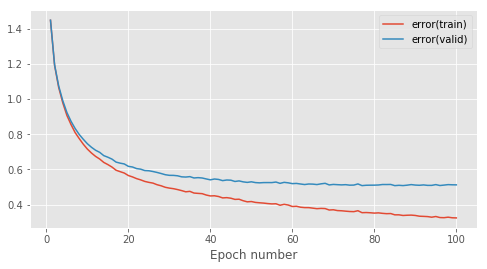

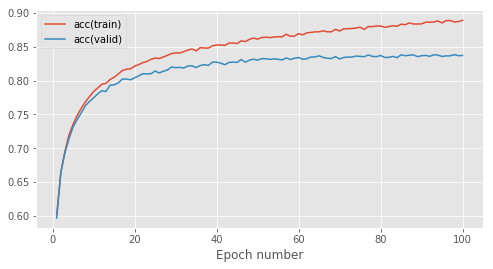

    final error(train) = 3.25e-01
    final error(valid) = 5.13e-01
    final acc(train)   = 8.89e-01
    final acc(valid)   = 8.37e-01
    run time per epoch = 2.78


In [13]:
penalties = [
    L2Penalty(0.02),
    L2Penalty(0.01),
    L2Penalty(0.001),
    L2Penalty(0.0001)
]

num_epochs = 100

penalties_models = OrderedDict()
penalties_stats = OrderedDict()
final_train_errors = []
final_valid_errors = []
final_train_accs = []
final_valid_accs = []

for penalty in penalties:
    layers = [AffineLayer(input_dim, hidden_dim, weights_init, biases_init, penalty),
              ReluLayer(),
              AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, penalty),
              ReluLayer(),
              AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, penalty),
              ReluLayer(),
              AffineLayer(hidden_dim, output_dim, weights_init, biases_init, penalty)]

    model = MultipleLayerModel(layers)
    learning_rule = AdamLearningRule(learning_rate=0.0001, beta_1=0.5, beta_2=0.999, epsilon=1e-8)

    stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
            model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
    plt.show()
    
    penalties_models[penalty] = model
    penalties_stats[penalty] = stats
    final_train_errors.append(stats[-1, 0])
    final_valid_errors.append(stats[-1, 2])
    final_train_accs.append(stats[-1, 1])
    final_valid_accs.append(stats[-1, -1])
    
    print('    final error(train) = {0:.2e}'.format(stats[-1, 0]))
    print('    final error(valid) = {0:.2e}'.format(stats[-1, 2]))
    print('    final acc(train)   = {0:.2e}'.format(stats[-1, 1]))
    print('    final acc(valid)   = {0:.2e}'.format(stats[-1, -1]))
    print('    run time per epoch = {0:.2f}'.format(run_time * 1. / num_epochs))

In [14]:
labels = [0.02, 0.01, 0.001, 0.0001]
print('|     methods     | final valid error| final valid acc |')
print('|---------------- |------------------|-----------------|')
for i, k in enumerate(labels):89
    print('|{0:.4f}           | {1:3f}        |  {2:3f}        | '
          .format(k, final_valid_errors[i], final_valid_accs[i]))

|     methods     | final valid error| final valid acc |
|---------------- |------------------|-----------------|
|0.0200           | 1.142379        |  0.690190        | 
|0.0100           | 0.805485        |  0.766329        | 
|0.0010           | 0.476892        |  0.842152        | 
|0.0001           | 0.512502        |  0.837215        | 


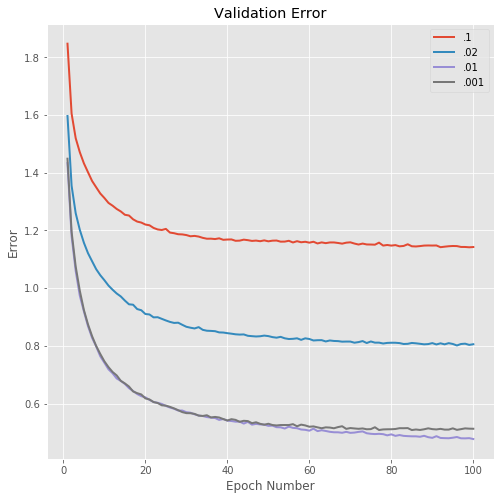

In [15]:
# Plot the training accuracy
plt.close()
plt.figure(figsize=(8,8))
labels = ['.1', '.02', '.01', '.001', '.0001', '.00001']
for stats, k in zip(list(penalties_stats.values()), labels):
    plt.plot(np.arange(1, stats.shape[0]) * stats_interval, stats[1:, 2], label=k, linewidth=2)
plt.legend(loc=0)
plt.ylabel('Error')
plt.xlabel('Epoch Number')
plt.title('Validation Error')
# plt.savefig('./plots/4_3_sgd_lr.png', dpi=1000)
#plt.savefig('./plots/4_3_sgd_lr.eps', format='eps', dpi=1000)
plt.show()

Epoch 1: 4.5s to complete
    error(train)=2.36e+00, acc(train)=4.42e-01, error(valid)=2.36e+00, acc(valid)=4.41e-01


Epoch 2: 4.4s to complete
    error(train)=2.38e+00, acc(train)=4.08e-01, error(valid)=2.38e+00, acc(valid)=4.06e-01


Epoch 3: 4.1s to complete
    error(train)=2.40e+00, acc(train)=3.87e-01, error(valid)=2.39e+00, acc(valid)=3.84e-01


Epoch 4: 3.9s to complete
    error(train)=2.40e+00, acc(train)=3.74e-01, error(valid)=2.40e+00, acc(valid)=3.70e-01


Epoch 5: 3.8s to complete
    error(train)=2.40e+00, acc(train)=3.63e-01, error(valid)=2.40e+00, acc(valid)=3.62e-01


Epoch 6: 3.9s to complete
    error(train)=2.39e+00, acc(train)=3.54e-01, error(valid)=2.39e+00, acc(valid)=3.51e-01


Epoch 7: 3.8s to complete
    error(train)=2.39e+00, acc(train)=3.69e-01, error(valid)=2.38e+00, acc(valid)=3.64e-01


Epoch 8: 4.0s to complete
    error(train)=2.39e+00, acc(train)=3.68e-01, error(valid)=2.38e+00, acc(valid)=3.66e-01


Epoch 9: 3.9s to complete
    error(train)=2.38e+00, acc(train)=3.63e-01, error(valid)=2.38e+00, acc(valid)=3.58e-01


Epoch 10: 4.1s to complete
    error(train)=2.38e+00, acc(train)=3.65e-01, error(valid)=2.38e+00, acc(valid)=3.61e-01


Epoch 11: 4.2s to complete
    error(train)=2.38e+00, acc(train)=3.65e-01, error(valid)=2.37e+00, acc(valid)=3.61e-01


Epoch 12: 4.4s to complete
    error(train)=2.38e+00, acc(train)=3.72e-01, error(valid)=2.38e+00, acc(valid)=3.67e-01


Epoch 13: 4.0s to complete
    error(train)=2.38e+00, acc(train)=3.71e-01, error(valid)=2.38e+00, acc(valid)=3.66e-01


Epoch 14: 4.9s to complete
    error(train)=2.38e+00, acc(train)=3.63e-01, error(valid)=2.37e+00, acc(valid)=3.61e-01


Epoch 15: 4.7s to complete
    error(train)=2.38e+00, acc(train)=3.63e-01, error(valid)=2.37e+00, acc(valid)=3.60e-01


Epoch 16: 4.6s to complete
    error(train)=2.38e+00, acc(train)=3.56e-01, error(valid)=2.37e+00, acc(valid)=3.56e-01


Epoch 17: 4.6s to complete
    error(train)=2.38e+00, acc(train)=3.67e-01, error(valid)=2.38e+00, acc(valid)=3.64e-01


Epoch 18: 4.6s to complete
    error(train)=2.37e+00, acc(train)=3.62e-01, error(valid)=2.37e+00, acc(valid)=3.57e-01


Epoch 19: 4.6s to complete
    error(train)=2.38e+00, acc(train)=3.58e-01, error(valid)=2.38e+00, acc(valid)=3.56e-01


Epoch 20: 5.0s to complete
    error(train)=2.37e+00, acc(train)=3.61e-01, error(valid)=2.37e+00, acc(valid)=3.58e-01


Epoch 21: 4.7s to complete
    error(train)=2.37e+00, acc(train)=3.56e-01, error(valid)=2.37e+00, acc(valid)=3.55e-01


Epoch 22: 4.3s to complete
    error(train)=2.37e+00, acc(train)=3.63e-01, error(valid)=2.37e+00, acc(valid)=3.60e-01


Epoch 23: 4.1s to complete
    error(train)=2.37e+00, acc(train)=3.67e-01, error(valid)=2.37e+00, acc(valid)=3.64e-01


Epoch 24: 4.3s to complete
    error(train)=2.37e+00, acc(train)=3.63e-01, error(valid)=2.37e+00, acc(valid)=3.62e-01


Epoch 25: 4.1s to complete
    error(train)=2.37e+00, acc(train)=3.61e-01, error(valid)=2.37e+00, acc(valid)=3.59e-01


Epoch 26: 4.0s to complete
    error(train)=2.37e+00, acc(train)=3.73e-01, error(valid)=2.37e+00, acc(valid)=3.69e-01


Epoch 27: 3.9s to complete
    error(train)=2.37e+00, acc(train)=3.69e-01, error(valid)=2.37e+00, acc(valid)=3.67e-01


Epoch 28: 4.0s to complete
    error(train)=2.38e+00, acc(train)=3.66e-01, error(valid)=2.38e+00, acc(valid)=3.63e-01


Epoch 29: 3.9s to complete
    error(train)=2.38e+00, acc(train)=3.60e-01, error(valid)=2.37e+00, acc(valid)=3.62e-01


Epoch 30: 3.9s to complete
    error(train)=2.37e+00, acc(train)=3.68e-01, error(valid)=2.37e+00, acc(valid)=3.65e-01


Epoch 31: 4.0s to complete
    error(train)=2.37e+00, acc(train)=3.67e-01, error(valid)=2.37e+00, acc(valid)=3.64e-01


Epoch 32: 4.0s to complete
    error(train)=2.38e+00, acc(train)=3.50e-01, error(valid)=2.37e+00, acc(valid)=3.45e-01


Epoch 33: 3.9s to complete
    error(train)=2.37e+00, acc(train)=3.68e-01, error(valid)=2.37e+00, acc(valid)=3.63e-01


Epoch 34: 4.0s to complete
    error(train)=2.37e+00, acc(train)=3.68e-01, error(valid)=2.37e+00, acc(valid)=3.64e-01


Epoch 35: 4.0s to complete
    error(train)=2.37e+00, acc(train)=3.61e-01, error(valid)=2.37e+00, acc(valid)=3.58e-01


Epoch 36: 4.3s to complete
    error(train)=2.37e+00, acc(train)=3.66e-01, error(valid)=2.37e+00, acc(valid)=3.62e-01


Epoch 37: 4.0s to complete
    error(train)=2.37e+00, acc(train)=3.74e-01, error(valid)=2.37e+00, acc(valid)=3.72e-01


Epoch 38: 3.9s to complete
    error(train)=2.37e+00, acc(train)=3.65e-01, error(valid)=2.37e+00, acc(valid)=3.61e-01


Epoch 39: 4.0s to complete
    error(train)=2.37e+00, acc(train)=3.67e-01, error(valid)=2.36e+00, acc(valid)=3.64e-01


Epoch 40: 3.9s to complete
    error(train)=2.37e+00, acc(train)=3.59e-01, error(valid)=2.37e+00, acc(valid)=3.55e-01


Epoch 41: 4.0s to complete
    error(train)=2.37e+00, acc(train)=3.69e-01, error(valid)=2.37e+00, acc(valid)=3.62e-01


Epoch 42: 4.1s to complete
    error(train)=2.37e+00, acc(train)=3.64e-01, error(valid)=2.36e+00, acc(valid)=3.60e-01


Epoch 43: 4.1s to complete
    error(train)=2.37e+00, acc(train)=3.71e-01, error(valid)=2.36e+00, acc(valid)=3.70e-01


Epoch 44: 4.0s to complete
    error(train)=2.37e+00, acc(train)=3.65e-01, error(valid)=2.36e+00, acc(valid)=3.64e-01


Epoch 45: 4.2s to complete
    error(train)=2.37e+00, acc(train)=3.65e-01, error(valid)=2.37e+00, acc(valid)=3.62e-01


Epoch 46: 4.1s to complete
    error(train)=2.38e+00, acc(train)=3.61e-01, error(valid)=2.37e+00, acc(valid)=3.57e-01


Epoch 47: 4.1s to complete
    error(train)=2.37e+00, acc(train)=3.73e-01, error(valid)=2.37e+00, acc(valid)=3.68e-01


Epoch 48: 4.4s to complete
    error(train)=2.37e+00, acc(train)=3.69e-01, error(valid)=2.36e+00, acc(valid)=3.64e-01


Epoch 49: 4.4s to complete
    error(train)=2.37e+00, acc(train)=3.62e-01, error(valid)=2.36e+00, acc(valid)=3.56e-01


Epoch 50: 4.2s to complete
    error(train)=2.37e+00, acc(train)=3.67e-01, error(valid)=2.37e+00, acc(valid)=3.63e-01


Epoch 51: 3.9s to complete
    error(train)=2.37e+00, acc(train)=3.54e-01, error(valid)=2.37e+00, acc(valid)=3.50e-01


Epoch 52: 3.9s to complete
    error(train)=2.37e+00, acc(train)=3.63e-01, error(valid)=2.37e+00, acc(valid)=3.62e-01


Epoch 53: 4.0s to complete
    error(train)=2.37e+00, acc(train)=3.75e-01, error(valid)=2.37e+00, acc(valid)=3.70e-01


Epoch 54: 4.0s to complete
    error(train)=2.37e+00, acc(train)=3.58e-01, error(valid)=2.37e+00, acc(valid)=3.56e-01


Epoch 55: 4.0s to complete
    error(train)=2.37e+00, acc(train)=3.64e-01, error(valid)=2.37e+00, acc(valid)=3.61e-01


Epoch 56: 4.9s to complete
    error(train)=2.37e+00, acc(train)=3.70e-01, error(valid)=2.37e+00, acc(valid)=3.65e-01


Epoch 57: 4.3s to complete
    error(train)=2.37e+00, acc(train)=3.60e-01, error(valid)=2.36e+00, acc(valid)=3.57e-01


Epoch 58: 4.1s to complete
    error(train)=2.37e+00, acc(train)=3.63e-01, error(valid)=2.37e+00, acc(valid)=3.57e-01


Epoch 59: 4.0s to complete
    error(train)=2.37e+00, acc(train)=3.62e-01, error(valid)=2.37e+00, acc(valid)=3.58e-01


Epoch 60: 3.9s to complete
    error(train)=2.37e+00, acc(train)=3.73e-01, error(valid)=2.36e+00, acc(valid)=3.72e-01


Epoch 61: 4.0s to complete
    error(train)=2.36e+00, acc(train)=3.74e-01, error(valid)=2.36e+00, acc(valid)=3.72e-01


Epoch 62: 4.4s to complete
    error(train)=2.37e+00, acc(train)=3.58e-01, error(valid)=2.37e+00, acc(valid)=3.54e-01


Epoch 63: 4.5s to complete
    error(train)=2.37e+00, acc(train)=3.60e-01, error(valid)=2.37e+00, acc(valid)=3.58e-01


Epoch 64: 4.7s to complete
    error(train)=2.37e+00, acc(train)=3.63e-01, error(valid)=2.36e+00, acc(valid)=3.59e-01


Epoch 65: 4.8s to complete
    error(train)=2.37e+00, acc(train)=3.73e-01, error(valid)=2.37e+00, acc(valid)=3.69e-01


Epoch 66: 4.0s to complete
    error(train)=2.37e+00, acc(train)=3.61e-01, error(valid)=2.37e+00, acc(valid)=3.58e-01


Epoch 67: 4.0s to complete
    error(train)=2.37e+00, acc(train)=3.62e-01, error(valid)=2.36e+00, acc(valid)=3.59e-01


Epoch 68: 4.0s to complete
    error(train)=2.37e+00, acc(train)=3.65e-01, error(valid)=2.37e+00, acc(valid)=3.59e-01


Epoch 69: 4.0s to complete
    error(train)=2.37e+00, acc(train)=3.59e-01, error(valid)=2.37e+00, acc(valid)=3.54e-01


Epoch 70: 4.0s to complete
    error(train)=2.36e+00, acc(train)=3.74e-01, error(valid)=2.36e+00, acc(valid)=3.70e-01


Epoch 71: 4.1s to complete
    error(train)=2.37e+00, acc(train)=3.64e-01, error(valid)=2.37e+00, acc(valid)=3.61e-01


Epoch 72: 4.1s to complete
    error(train)=2.37e+00, acc(train)=3.66e-01, error(valid)=2.36e+00, acc(valid)=3.63e-01


Epoch 73: 3.9s to complete
    error(train)=2.36e+00, acc(train)=3.72e-01, error(valid)=2.36e+00, acc(valid)=3.69e-01


Epoch 74: 4.0s to complete
    error(train)=2.37e+00, acc(train)=3.62e-01, error(valid)=2.37e+00, acc(valid)=3.57e-01


Epoch 75: 3.9s to complete
    error(train)=2.36e+00, acc(train)=3.60e-01, error(valid)=2.36e+00, acc(valid)=3.61e-01


Epoch 76: 3.9s to complete
    error(train)=2.37e+00, acc(train)=3.61e-01, error(valid)=2.37e+00, acc(valid)=3.55e-01


Epoch 77: 4.3s to complete
    error(train)=2.37e+00, acc(train)=3.65e-01, error(valid)=2.36e+00, acc(valid)=3.63e-01


Epoch 78: 4.1s to complete
    error(train)=2.37e+00, acc(train)=3.59e-01, error(valid)=2.36e+00, acc(valid)=3.57e-01


Epoch 79: 4.0s to complete
    error(train)=2.36e+00, acc(train)=3.63e-01, error(valid)=2.36e+00, acc(valid)=3.61e-01


Epoch 80: 4.2s to complete
    error(train)=2.37e+00, acc(train)=3.67e-01, error(valid)=2.37e+00, acc(valid)=3.65e-01


Epoch 81: 4.0s to complete
    error(train)=2.36e+00, acc(train)=3.70e-01, error(valid)=2.36e+00, acc(valid)=3.67e-01


Epoch 82: 4.1s to complete
    error(train)=2.37e+00, acc(train)=3.61e-01, error(valid)=2.37e+00, acc(valid)=3.60e-01


Epoch 83: 4.1s to complete
    error(train)=2.37e+00, acc(train)=3.65e-01, error(valid)=2.37e+00, acc(valid)=3.62e-01


Epoch 84: 5.6s to complete
    error(train)=2.37e+00, acc(train)=3.65e-01, error(valid)=2.37e+00, acc(valid)=3.63e-01


Epoch 85: 4.4s to complete
    error(train)=2.38e+00, acc(train)=3.57e-01, error(valid)=2.38e+00, acc(valid)=3.51e-01


Epoch 86: 5.0s to complete
    error(train)=2.37e+00, acc(train)=3.66e-01, error(valid)=2.37e+00, acc(valid)=3.63e-01


Epoch 87: 4.5s to complete
    error(train)=2.36e+00, acc(train)=3.62e-01, error(valid)=2.36e+00, acc(valid)=3.58e-01


Epoch 88: 4.4s to complete
    error(train)=2.37e+00, acc(train)=3.67e-01, error(valid)=2.37e+00, acc(valid)=3.61e-01


Epoch 89: 4.0s to complete
    error(train)=2.37e+00, acc(train)=3.67e-01, error(valid)=2.37e+00, acc(valid)=3.65e-01


Epoch 90: 4.1s to complete
    error(train)=2.37e+00, acc(train)=3.58e-01, error(valid)=2.37e+00, acc(valid)=3.54e-01


Epoch 91: 4.1s to complete
    error(train)=2.36e+00, acc(train)=3.62e-01, error(valid)=2.36e+00, acc(valid)=3.58e-01


Epoch 92: 4.0s to complete
    error(train)=2.37e+00, acc(train)=3.68e-01, error(valid)=2.37e+00, acc(valid)=3.67e-01


Epoch 93: 4.1s to complete
    error(train)=2.37e+00, acc(train)=3.60e-01, error(valid)=2.36e+00, acc(valid)=3.57e-01


Epoch 94: 4.1s to complete
    error(train)=2.37e+00, acc(train)=3.69e-01, error(valid)=2.36e+00, acc(valid)=3.66e-01


Epoch 95: 4.0s to complete
    error(train)=2.36e+00, acc(train)=3.69e-01, error(valid)=2.36e+00, acc(valid)=3.66e-01


Epoch 96: 4.0s to complete
    error(train)=2.37e+00, acc(train)=3.68e-01, error(valid)=2.36e+00, acc(valid)=3.62e-01


Epoch 97: 3.9s to complete
    error(train)=2.37e+00, acc(train)=3.63e-01, error(valid)=2.36e+00, acc(valid)=3.57e-01


Epoch 98: 4.0s to complete
    error(train)=2.37e+00, acc(train)=3.67e-01, error(valid)=2.37e+00, acc(valid)=3.65e-01


Epoch 99: 4.1s to complete
    error(train)=2.37e+00, acc(train)=3.60e-01, error(valid)=2.37e+00, acc(valid)=3.54e-01


Epoch 100: 4.7s to complete
    error(train)=2.37e+00, acc(train)=3.64e-01, error(valid)=2.37e+00, acc(valid)=3.58e-01


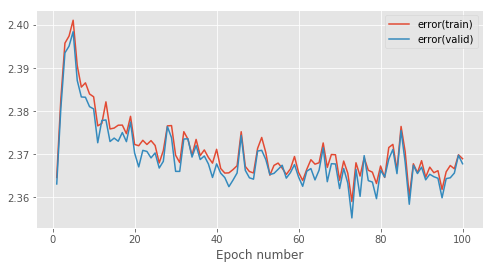

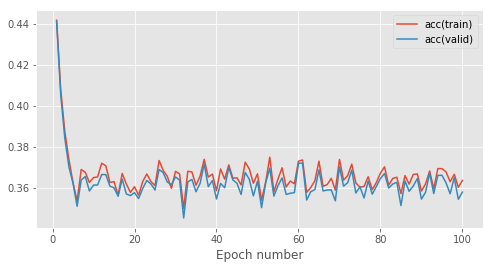

    final error(train) = 2.37e+00
    final error(valid) = 2.37e+00
    final acc(train)   = 3.64e-01
    final acc(valid)   = 3.58e-01
    run time per epoch = 5.40


Epoch 1: 3.7s to complete
    error(train)=1.87e+00, acc(train)=5.50e-01, error(valid)=1.87e+00, acc(valid)=5.43e-01


Epoch 2: 3.7s to complete
    error(train)=1.78e+00, acc(train)=5.62e-01, error(valid)=1.79e+00, acc(valid)=5.58e-01


Epoch 3: 3.7s to complete
    error(train)=1.77e+00, acc(train)=5.64e-01, error(valid)=1.78e+00, acc(valid)=5.61e-01


Epoch 4: 3.8s to complete
    error(train)=1.77e+00, acc(train)=5.56e-01, error(valid)=1.77e+00, acc(valid)=5.54e-01


Epoch 5: 3.8s to complete
    error(train)=1.77e+00, acc(train)=5.57e-01, error(valid)=1.77e+00, acc(valid)=5.54e-01


Epoch 6: 3.6s to complete
    error(train)=1.77e+00, acc(train)=5.56e-01, error(valid)=1.77e+00, acc(valid)=5.54e-01


Epoch 7: 4.1s to complete
    error(train)=1.76e+00, acc(train)=5.52e-01, error(valid)=1.76e+00, acc(valid)=5.47e-01


Epoch 8: 4.3s to complete
    error(train)=1.76e+00, acc(train)=5.50e-01, error(valid)=1.77e+00, acc(valid)=5.48e-01


Epoch 9: 4.5s to complete
    error(train)=1.76e+00, acc(train)=5.46e-01, error(valid)=1.77e+00, acc(valid)=5.41e-01


Epoch 10: 4.1s to complete
    error(train)=1.77e+00, acc(train)=5.47e-01, error(valid)=1.77e+00, acc(valid)=5.44e-01


Epoch 11: 4.3s to complete
    error(train)=1.76e+00, acc(train)=5.50e-01, error(valid)=1.76e+00, acc(valid)=5.47e-01


Epoch 12: 4.1s to complete
    error(train)=1.75e+00, acc(train)=5.50e-01, error(valid)=1.76e+00, acc(valid)=5.46e-01


Epoch 13: 4.0s to complete
    error(train)=1.75e+00, acc(train)=5.54e-01, error(valid)=1.76e+00, acc(valid)=5.49e-01


Epoch 14: 4.0s to complete
    error(train)=1.75e+00, acc(train)=5.51e-01, error(valid)=1.75e+00, acc(valid)=5.48e-01


Epoch 15: 4.1s to complete
    error(train)=1.75e+00, acc(train)=5.51e-01, error(valid)=1.75e+00, acc(valid)=5.48e-01


Epoch 16: 3.8s to complete
    error(train)=1.75e+00, acc(train)=5.51e-01, error(valid)=1.75e+00, acc(valid)=5.47e-01


Epoch 17: 3.8s to complete
    error(train)=1.75e+00, acc(train)=5.52e-01, error(valid)=1.75e+00, acc(valid)=5.48e-01


Epoch 18: 3.9s to complete
    error(train)=1.74e+00, acc(train)=5.56e-01, error(valid)=1.75e+00, acc(valid)=5.49e-01


Epoch 19: 5.3s to complete
    error(train)=1.74e+00, acc(train)=5.52e-01, error(valid)=1.75e+00, acc(valid)=5.49e-01


Epoch 20: 4.0s to complete
    error(train)=1.74e+00, acc(train)=5.47e-01, error(valid)=1.75e+00, acc(valid)=5.44e-01


Epoch 21: 4.4s to complete
    error(train)=1.74e+00, acc(train)=5.52e-01, error(valid)=1.74e+00, acc(valid)=5.49e-01


Epoch 22: 4.0s to complete
    error(train)=1.73e+00, acc(train)=5.57e-01, error(valid)=1.74e+00, acc(valid)=5.52e-01


Epoch 23: 4.0s to complete
    error(train)=1.73e+00, acc(train)=5.55e-01, error(valid)=1.73e+00, acc(valid)=5.49e-01


Epoch 24: 4.1s to complete
    error(train)=1.73e+00, acc(train)=5.52e-01, error(valid)=1.73e+00, acc(valid)=5.47e-01


Epoch 25: 4.0s to complete
    error(train)=1.73e+00, acc(train)=5.58e-01, error(valid)=1.73e+00, acc(valid)=5.56e-01


Epoch 26: 3.9s to complete
    error(train)=1.72e+00, acc(train)=5.56e-01, error(valid)=1.73e+00, acc(valid)=5.48e-01


Epoch 27: 3.8s to complete
    error(train)=1.72e+00, acc(train)=5.58e-01, error(valid)=1.73e+00, acc(valid)=5.54e-01


Epoch 28: 3.9s to complete
    error(train)=1.72e+00, acc(train)=5.57e-01, error(valid)=1.73e+00, acc(valid)=5.53e-01


Epoch 29: 4.0s to complete
    error(train)=1.72e+00, acc(train)=5.56e-01, error(valid)=1.73e+00, acc(valid)=5.51e-01


Epoch 30: 4.1s to complete
    error(train)=1.72e+00, acc(train)=5.57e-01, error(valid)=1.72e+00, acc(valid)=5.51e-01


Epoch 31: 4.2s to complete
    error(train)=1.72e+00, acc(train)=5.56e-01, error(valid)=1.73e+00, acc(valid)=5.53e-01


Epoch 32: 4.5s to complete
    error(train)=1.72e+00, acc(train)=5.56e-01, error(valid)=1.72e+00, acc(valid)=5.52e-01


Epoch 33: 4.6s to complete
    error(train)=1.72e+00, acc(train)=5.56e-01, error(valid)=1.72e+00, acc(valid)=5.51e-01


Epoch 34: 3.8s to complete
    error(train)=1.72e+00, acc(train)=5.59e-01, error(valid)=1.72e+00, acc(valid)=5.55e-01


Epoch 35: 3.8s to complete
    error(train)=1.72e+00, acc(train)=5.55e-01, error(valid)=1.72e+00, acc(valid)=5.50e-01


Epoch 36: 4.0s to complete
    error(train)=1.72e+00, acc(train)=5.56e-01, error(valid)=1.72e+00, acc(valid)=5.53e-01


Epoch 37: 3.9s to complete
    error(train)=1.72e+00, acc(train)=5.54e-01, error(valid)=1.73e+00, acc(valid)=5.50e-01


Epoch 38: 3.9s to complete
    error(train)=1.72e+00, acc(train)=5.58e-01, error(valid)=1.72e+00, acc(valid)=5.56e-01


Epoch 39: 4.0s to complete
    error(train)=1.72e+00, acc(train)=5.57e-01, error(valid)=1.72e+00, acc(valid)=5.52e-01


Epoch 40: 4.0s to complete
    error(train)=1.72e+00, acc(train)=5.59e-01, error(valid)=1.72e+00, acc(valid)=5.52e-01


Epoch 41: 3.9s to complete
    error(train)=1.72e+00, acc(train)=5.59e-01, error(valid)=1.72e+00, acc(valid)=5.56e-01


Epoch 42: 3.9s to complete
    error(train)=1.72e+00, acc(train)=5.56e-01, error(valid)=1.72e+00, acc(valid)=5.51e-01


Epoch 43: 3.9s to complete
    error(train)=1.71e+00, acc(train)=5.60e-01, error(valid)=1.71e+00, acc(valid)=5.57e-01


Epoch 44: 3.9s to complete
    error(train)=1.71e+00, acc(train)=5.62e-01, error(valid)=1.72e+00, acc(valid)=5.57e-01


Epoch 45: 3.9s to complete
    error(train)=1.71e+00, acc(train)=5.54e-01, error(valid)=1.72e+00, acc(valid)=5.52e-01


Epoch 46: 4.6s to complete
    error(train)=1.71e+00, acc(train)=5.61e-01, error(valid)=1.71e+00, acc(valid)=5.58e-01


Epoch 47: 3.9s to complete
    error(train)=1.71e+00, acc(train)=5.58e-01, error(valid)=1.71e+00, acc(valid)=5.54e-01


Epoch 48: 4.1s to complete
    error(train)=1.71e+00, acc(train)=5.55e-01, error(valid)=1.71e+00, acc(valid)=5.51e-01


Epoch 49: 4.2s to complete
    error(train)=1.70e+00, acc(train)=5.61e-01, error(valid)=1.71e+00, acc(valid)=5.57e-01


Epoch 50: 4.7s to complete
    error(train)=1.71e+00, acc(train)=5.63e-01, error(valid)=1.71e+00, acc(valid)=5.57e-01


Epoch 51: 5.3s to complete
    error(train)=1.71e+00, acc(train)=5.61e-01, error(valid)=1.71e+00, acc(valid)=5.58e-01


Epoch 52: 5.0s to complete
    error(train)=1.71e+00, acc(train)=5.57e-01, error(valid)=1.71e+00, acc(valid)=5.52e-01


Epoch 53: 4.7s to complete
    error(train)=1.71e+00, acc(train)=5.63e-01, error(valid)=1.71e+00, acc(valid)=5.60e-01


Epoch 54: 5.1s to complete
    error(train)=1.71e+00, acc(train)=5.54e-01, error(valid)=1.71e+00, acc(valid)=5.51e-01


Epoch 55: 4.1s to complete
    error(train)=1.71e+00, acc(train)=5.59e-01, error(valid)=1.71e+00, acc(valid)=5.58e-01


Epoch 56: 3.9s to complete
    error(train)=1.70e+00, acc(train)=5.63e-01, error(valid)=1.71e+00, acc(valid)=5.58e-01


Epoch 57: 4.5s to complete
    error(train)=1.70e+00, acc(train)=5.61e-01, error(valid)=1.70e+00, acc(valid)=5.58e-01


Epoch 58: 4.2s to complete
    error(train)=1.70e+00, acc(train)=5.62e-01, error(valid)=1.70e+00, acc(valid)=5.58e-01


Epoch 59: 4.1s to complete
    error(train)=1.70e+00, acc(train)=5.65e-01, error(valid)=1.70e+00, acc(valid)=5.61e-01


Epoch 60: 4.0s to complete
    error(train)=1.70e+00, acc(train)=5.60e-01, error(valid)=1.70e+00, acc(valid)=5.53e-01


Epoch 61: 4.5s to complete
    error(train)=1.69e+00, acc(train)=5.67e-01, error(valid)=1.70e+00, acc(valid)=5.64e-01


Epoch 62: 4.0s to complete
    error(train)=1.69e+00, acc(train)=5.66e-01, error(valid)=1.69e+00, acc(valid)=5.63e-01


Epoch 63: 4.0s to complete
    error(train)=1.69e+00, acc(train)=5.66e-01, error(valid)=1.70e+00, acc(valid)=5.64e-01


Epoch 64: 4.0s to complete
    error(train)=1.69e+00, acc(train)=5.63e-01, error(valid)=1.69e+00, acc(valid)=5.61e-01


Epoch 65: 4.3s to complete
    error(train)=1.69e+00, acc(train)=5.68e-01, error(valid)=1.69e+00, acc(valid)=5.62e-01


Epoch 66: 4.2s to complete
    error(train)=1.69e+00, acc(train)=5.63e-01, error(valid)=1.69e+00, acc(valid)=5.60e-01


Epoch 67: 4.0s to complete
    error(train)=1.69e+00, acc(train)=5.69e-01, error(valid)=1.69e+00, acc(valid)=5.65e-01


Epoch 68: 3.9s to complete
    error(train)=1.68e+00, acc(train)=5.65e-01, error(valid)=1.69e+00, acc(valid)=5.63e-01


Epoch 69: 3.9s to complete
    error(train)=1.69e+00, acc(train)=5.64e-01, error(valid)=1.69e+00, acc(valid)=5.63e-01


Epoch 70: 3.9s to complete
    error(train)=1.69e+00, acc(train)=5.66e-01, error(valid)=1.69e+00, acc(valid)=5.63e-01


Epoch 71: 3.9s to complete
    error(train)=1.69e+00, acc(train)=5.68e-01, error(valid)=1.69e+00, acc(valid)=5.62e-01


Epoch 72: 4.5s to complete
    error(train)=1.69e+00, acc(train)=5.68e-01, error(valid)=1.69e+00, acc(valid)=5.64e-01


Epoch 73: 4.6s to complete
    error(train)=1.68e+00, acc(train)=5.71e-01, error(valid)=1.68e+00, acc(valid)=5.66e-01


Epoch 74: 5.0s to complete
    error(train)=1.68e+00, acc(train)=5.72e-01, error(valid)=1.68e+00, acc(valid)=5.67e-01


Epoch 75: 4.2s to complete
    error(train)=1.68e+00, acc(train)=5.69e-01, error(valid)=1.68e+00, acc(valid)=5.66e-01


Epoch 76: 3.9s to complete
    error(train)=1.68e+00, acc(train)=5.69e-01, error(valid)=1.68e+00, acc(valid)=5.67e-01


Epoch 77: 4.1s to complete
    error(train)=1.68e+00, acc(train)=5.68e-01, error(valid)=1.68e+00, acc(valid)=5.63e-01


Epoch 78: 4.1s to complete
    error(train)=1.67e+00, acc(train)=5.68e-01, error(valid)=1.67e+00, acc(valid)=5.68e-01


Epoch 79: 4.2s to complete
    error(train)=1.67e+00, acc(train)=5.67e-01, error(valid)=1.67e+00, acc(valid)=5.68e-01


Epoch 80: 4.1s to complete
    error(train)=1.68e+00, acc(train)=5.69e-01, error(valid)=1.68e+00, acc(valid)=5.66e-01


Epoch 81: 4.1s to complete
    error(train)=1.67e+00, acc(train)=5.71e-01, error(valid)=1.67e+00, acc(valid)=5.70e-01


Epoch 82: 4.3s to complete
    error(train)=1.68e+00, acc(train)=5.69e-01, error(valid)=1.68e+00, acc(valid)=5.66e-01


Epoch 83: 4.2s to complete
    error(train)=1.68e+00, acc(train)=5.63e-01, error(valid)=1.68e+00, acc(valid)=5.58e-01


Epoch 84: 4.1s to complete
    error(train)=1.67e+00, acc(train)=5.73e-01, error(valid)=1.67e+00, acc(valid)=5.72e-01


Epoch 85: 4.0s to complete
    error(train)=1.67e+00, acc(train)=5.68e-01, error(valid)=1.68e+00, acc(valid)=5.66e-01


Epoch 86: 4.0s to complete
    error(train)=1.67e+00, acc(train)=5.72e-01, error(valid)=1.67e+00, acc(valid)=5.67e-01


Epoch 87: 4.1s to complete
    error(train)=1.67e+00, acc(train)=5.70e-01, error(valid)=1.68e+00, acc(valid)=5.67e-01


Epoch 88: 5.3s to complete
    error(train)=1.67e+00, acc(train)=5.69e-01, error(valid)=1.68e+00, acc(valid)=5.66e-01


Epoch 89: 4.8s to complete
    error(train)=1.68e+00, acc(train)=5.68e-01, error(valid)=1.68e+00, acc(valid)=5.66e-01


Epoch 90: 4.7s to complete
    error(train)=1.67e+00, acc(train)=5.70e-01, error(valid)=1.68e+00, acc(valid)=5.65e-01


Epoch 91: 4.5s to complete
    error(train)=1.68e+00, acc(train)=5.67e-01, error(valid)=1.68e+00, acc(valid)=5.66e-01


Epoch 92: 4.7s to complete
    error(train)=1.67e+00, acc(train)=5.67e-01, error(valid)=1.68e+00, acc(valid)=5.65e-01


Epoch 93: 4.2s to complete
    error(train)=1.68e+00, acc(train)=5.71e-01, error(valid)=1.68e+00, acc(valid)=5.69e-01


Epoch 94: 4.0s to complete
    error(train)=1.66e+00, acc(train)=5.74e-01, error(valid)=1.67e+00, acc(valid)=5.72e-01


Epoch 95: 3.9s to complete
    error(train)=1.67e+00, acc(train)=5.74e-01, error(valid)=1.67e+00, acc(valid)=5.75e-01


Epoch 96: 4.1s to complete
    error(train)=1.67e+00, acc(train)=5.69e-01, error(valid)=1.68e+00, acc(valid)=5.65e-01


Epoch 97: 4.1s to complete
    error(train)=1.67e+00, acc(train)=5.71e-01, error(valid)=1.67e+00, acc(valid)=5.66e-01


Epoch 98: 3.9s to complete
    error(train)=1.67e+00, acc(train)=5.70e-01, error(valid)=1.68e+00, acc(valid)=5.65e-01


Epoch 99: 3.9s to complete
    error(train)=1.67e+00, acc(train)=5.68e-01, error(valid)=1.67e+00, acc(valid)=5.71e-01


Epoch 100: 4.0s to complete
    error(train)=1.67e+00, acc(train)=5.76e-01, error(valid)=1.67e+00, acc(valid)=5.72e-01


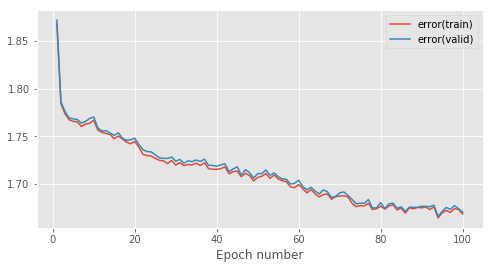

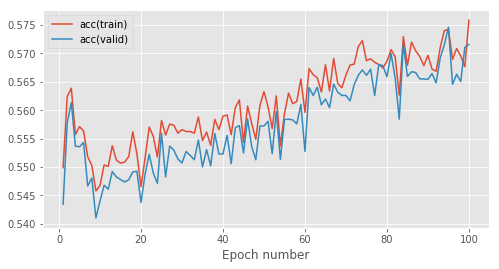

    final error(train) = 1.67e+00
    final error(valid) = 1.67e+00
    final acc(train)   = 5.76e-01
    final acc(valid)   = 5.72e-01
    run time per epoch = 5.38


Epoch 1: 4.0s to complete
    error(train)=1.51e+00, acc(train)=5.93e-01, error(valid)=1.51e+00, acc(valid)=5.91e-01


Epoch 2: 4.1s to complete
    error(train)=1.29e+00, acc(train)=6.45e-01, error(valid)=1.30e+00, acc(valid)=6.41e-01


Epoch 3: 3.8s to complete
    error(train)=1.20e+00, acc(train)=6.72e-01, error(valid)=1.20e+00, acc(valid)=6.70e-01


Epoch 4: 3.8s to complete
    error(train)=1.14e+00, acc(train)=6.83e-01, error(valid)=1.15e+00, acc(valid)=6.78e-01


Epoch 5: 4.4s to complete
    error(train)=1.10e+00, acc(train)=6.94e-01, error(valid)=1.11e+00, acc(valid)=6.89e-01


Epoch 6: 3.8s to complete
    error(train)=1.07e+00, acc(train)=7.00e-01, error(valid)=1.08e+00, acc(valid)=6.97e-01


Epoch 7: 4.0s to complete
    error(train)=1.03e+00, acc(train)=7.11e-01, error(valid)=1.04e+00, acc(valid)=7.04e-01


Epoch 8: 4.1s to complete
    error(train)=1.00e+00, acc(train)=7.19e-01, error(valid)=1.01e+00, acc(valid)=7.16e-01


Epoch 9: 4.0s to complete
    error(train)=9.88e-01, acc(train)=7.22e-01, error(valid)=9.98e-01, acc(valid)=7.16e-01


Epoch 10: 4.1s to complete
    error(train)=9.62e-01, acc(train)=7.30e-01, error(valid)=9.73e-01, acc(valid)=7.25e-01


Epoch 11: 4.5s to complete
    error(train)=9.54e-01, acc(train)=7.29e-01, error(valid)=9.65e-01, acc(valid)=7.25e-01


Epoch 12: 5.4s to complete
    error(train)=9.36e-01, acc(train)=7.36e-01, error(valid)=9.46e-01, acc(valid)=7.31e-01


Epoch 13: 4.5s to complete
    error(train)=9.22e-01, acc(train)=7.39e-01, error(valid)=9.34e-01, acc(valid)=7.34e-01


Epoch 14: 4.3s to complete
    error(train)=9.15e-01, acc(train)=7.41e-01, error(valid)=9.26e-01, acc(valid)=7.36e-01


Epoch 15: 4.0s to complete
    error(train)=9.03e-01, acc(train)=7.46e-01, error(valid)=9.13e-01, acc(valid)=7.40e-01


Epoch 16: 3.9s to complete
    error(train)=8.96e-01, acc(train)=7.47e-01, error(valid)=9.09e-01, acc(valid)=7.40e-01


Epoch 17: 4.1s to complete
    error(train)=8.85e-01, acc(train)=7.48e-01, error(valid)=8.96e-01, acc(valid)=7.43e-01


Epoch 18: 4.2s to complete
    error(train)=8.78e-01, acc(train)=7.48e-01, error(valid)=8.89e-01, acc(valid)=7.43e-01


Epoch 19: 4.3s to complete
    error(train)=8.72e-01, acc(train)=7.51e-01, error(valid)=8.82e-01, acc(valid)=7.48e-01


Epoch 20: 3.9s to complete
    error(train)=8.66e-01, acc(train)=7.53e-01, error(valid)=8.76e-01, acc(valid)=7.47e-01


Epoch 21: 3.9s to complete
    error(train)=8.61e-01, acc(train)=7.56e-01, error(valid)=8.70e-01, acc(valid)=7.52e-01


Epoch 22: 3.9s to complete
    error(train)=8.55e-01, acc(train)=7.55e-01, error(valid)=8.65e-01, acc(valid)=7.52e-01


Epoch 23: 4.0s to complete
    error(train)=8.56e-01, acc(train)=7.56e-01, error(valid)=8.66e-01, acc(valid)=7.52e-01


Epoch 24: 4.1s to complete
    error(train)=8.47e-01, acc(train)=7.55e-01, error(valid)=8.56e-01, acc(valid)=7.53e-01


Epoch 25: 4.6s to complete
    error(train)=8.40e-01, acc(train)=7.59e-01, error(valid)=8.50e-01, acc(valid)=7.53e-01


Epoch 26: 3.9s to complete
    error(train)=8.35e-01, acc(train)=7.60e-01, error(valid)=8.44e-01, acc(valid)=7.58e-01


Epoch 27: 4.1s to complete
    error(train)=8.30e-01, acc(train)=7.63e-01, error(valid)=8.39e-01, acc(valid)=7.62e-01


Epoch 28: 4.2s to complete
    error(train)=8.25e-01, acc(train)=7.64e-01, error(valid)=8.34e-01, acc(valid)=7.63e-01


Epoch 29: 4.1s to complete
    error(train)=8.24e-01, acc(train)=7.64e-01, error(valid)=8.33e-01, acc(valid)=7.61e-01


Epoch 30: 4.2s to complete
    error(train)=8.22e-01, acc(train)=7.64e-01, error(valid)=8.32e-01, acc(valid)=7.59e-01


Epoch 31: 4.0s to complete
    error(train)=8.16e-01, acc(train)=7.66e-01, error(valid)=8.26e-01, acc(valid)=7.61e-01


Epoch 32: 4.0s to complete
    error(train)=8.12e-01, acc(train)=7.67e-01, error(valid)=8.21e-01, acc(valid)=7.66e-01


Epoch 33: 4.0s to complete
    error(train)=8.11e-01, acc(train)=7.67e-01, error(valid)=8.21e-01, acc(valid)=7.64e-01


Epoch 34: 4.6s to complete
    error(train)=8.08e-01, acc(train)=7.68e-01, error(valid)=8.18e-01, acc(valid)=7.67e-01


Epoch 35: 4.8s to complete
    error(train)=8.06e-01, acc(train)=7.68e-01, error(valid)=8.15e-01, acc(valid)=7.66e-01


Epoch 36: 4.8s to complete
    error(train)=8.04e-01, acc(train)=7.68e-01, error(valid)=8.13e-01, acc(valid)=7.66e-01


Epoch 37: 5.2s to complete
    error(train)=7.99e-01, acc(train)=7.69e-01, error(valid)=8.09e-01, acc(valid)=7.66e-01


Epoch 38: 4.1s to complete
    error(train)=8.00e-01, acc(train)=7.68e-01, error(valid)=8.11e-01, acc(valid)=7.64e-01


Epoch 39: 4.0s to complete
    error(train)=8.01e-01, acc(train)=7.68e-01, error(valid)=8.09e-01, acc(valid)=7.66e-01


Epoch 40: 4.0s to complete
    error(train)=7.97e-01, acc(train)=7.70e-01, error(valid)=8.06e-01, acc(valid)=7.70e-01


Epoch 41: 4.0s to complete
    error(train)=7.94e-01, acc(train)=7.71e-01, error(valid)=8.04e-01, acc(valid)=7.70e-01


Epoch 42: 3.9s to complete
    error(train)=7.94e-01, acc(train)=7.71e-01, error(valid)=8.04e-01, acc(valid)=7.69e-01


Epoch 43: 4.0s to complete
    error(train)=7.97e-01, acc(train)=7.70e-01, error(valid)=8.07e-01, acc(valid)=7.69e-01


Epoch 44: 4.0s to complete
    error(train)=7.89e-01, acc(train)=7.73e-01, error(valid)=8.00e-01, acc(valid)=7.71e-01


Epoch 45: 3.9s to complete
    error(train)=7.91e-01, acc(train)=7.73e-01, error(valid)=8.00e-01, acc(valid)=7.70e-01


Epoch 46: 4.1s to complete
    error(train)=7.85e-01, acc(train)=7.73e-01, error(valid)=7.95e-01, acc(valid)=7.72e-01


Epoch 47: 4.0s to complete
    error(train)=7.89e-01, acc(train)=7.71e-01, error(valid)=7.99e-01, acc(valid)=7.68e-01


Epoch 48: 4.0s to complete
    error(train)=7.90e-01, acc(train)=7.70e-01, error(valid)=8.00e-01, acc(valid)=7.67e-01


Epoch 49: 4.2s to complete
    error(train)=7.86e-01, acc(train)=7.74e-01, error(valid)=7.96e-01, acc(valid)=7.72e-01


Epoch 50: 4.0s to complete
    error(train)=7.89e-01, acc(train)=7.71e-01, error(valid)=7.99e-01, acc(valid)=7.69e-01


Epoch 51: 4.1s to complete
    error(train)=7.85e-01, acc(train)=7.73e-01, error(valid)=7.95e-01, acc(valid)=7.72e-01


Epoch 52: 4.1s to complete
    error(train)=7.80e-01, acc(train)=7.75e-01, error(valid)=7.91e-01, acc(valid)=7.71e-01


Epoch 53: 4.0s to complete
    error(train)=7.83e-01, acc(train)=7.72e-01, error(valid)=7.93e-01, acc(valid)=7.68e-01


Epoch 54: 4.1s to complete
    error(train)=7.81e-01, acc(train)=7.73e-01, error(valid)=7.91e-01, acc(valid)=7.71e-01


Epoch 55: 3.9s to complete
    error(train)=7.80e-01, acc(train)=7.72e-01, error(valid)=7.90e-01, acc(valid)=7.70e-01


Epoch 56: 4.1s to complete
    error(train)=7.84e-01, acc(train)=7.73e-01, error(valid)=7.94e-01, acc(valid)=7.70e-01


Epoch 57: 4.3s to complete
    error(train)=7.80e-01, acc(train)=7.75e-01, error(valid)=7.91e-01, acc(valid)=7.70e-01


Epoch 58: 4.3s to complete
    error(train)=7.76e-01, acc(train)=7.74e-01, error(valid)=7.86e-01, acc(valid)=7.71e-01


Epoch 59: 4.6s to complete
    error(train)=7.76e-01, acc(train)=7.74e-01, error(valid)=7.85e-01, acc(valid)=7.72e-01


Epoch 60: 4.9s to complete
    error(train)=7.74e-01, acc(train)=7.75e-01, error(valid)=7.85e-01, acc(valid)=7.72e-01


Epoch 61: 4.0s to complete
    error(train)=7.73e-01, acc(train)=7.77e-01, error(valid)=7.82e-01, acc(valid)=7.79e-01


Epoch 62: 4.0s to complete
    error(train)=7.75e-01, acc(train)=7.75e-01, error(valid)=7.87e-01, acc(valid)=7.73e-01


Epoch 63: 4.1s to complete
    error(train)=7.73e-01, acc(train)=7.76e-01, error(valid)=7.85e-01, acc(valid)=7.71e-01


Epoch 64: 4.2s to complete
    error(train)=7.72e-01, acc(train)=7.76e-01, error(valid)=7.83e-01, acc(valid)=7.73e-01


Epoch 65: 4.1s to complete
    error(train)=7.73e-01, acc(train)=7.77e-01, error(valid)=7.84e-01, acc(valid)=7.75e-01


Epoch 66: 4.2s to complete
    error(train)=7.77e-01, acc(train)=7.75e-01, error(valid)=7.87e-01, acc(valid)=7.72e-01


Epoch 67: 4.0s to complete
    error(train)=7.74e-01, acc(train)=7.75e-01, error(valid)=7.85e-01, acc(valid)=7.71e-01


Epoch 68: 4.0s to complete
    error(train)=7.71e-01, acc(train)=7.77e-01, error(valid)=7.81e-01, acc(valid)=7.73e-01


Epoch 69: 4.0s to complete
    error(train)=7.71e-01, acc(train)=7.76e-01, error(valid)=7.82e-01, acc(valid)=7.74e-01


Epoch 70: 4.1s to complete
    error(train)=7.67e-01, acc(train)=7.77e-01, error(valid)=7.78e-01, acc(valid)=7.73e-01


Epoch 71: 3.9s to complete
    error(train)=7.69e-01, acc(train)=7.76e-01, error(valid)=7.80e-01, acc(valid)=7.73e-01


Epoch 72: 4.0s to complete
    error(train)=7.66e-01, acc(train)=7.78e-01, error(valid)=7.76e-01, acc(valid)=7.76e-01


Epoch 73: 4.0s to complete
    error(train)=7.73e-01, acc(train)=7.76e-01, error(valid)=7.84e-01, acc(valid)=7.73e-01


Epoch 74: 4.7s to complete
    error(train)=7.67e-01, acc(train)=7.78e-01, error(valid)=7.79e-01, acc(valid)=7.76e-01


Epoch 75: 4.0s to complete
    error(train)=7.66e-01, acc(train)=7.78e-01, error(valid)=7.77e-01, acc(valid)=7.75e-01


Epoch 76: 4.2s to complete
    error(train)=7.63e-01, acc(train)=7.79e-01, error(valid)=7.74e-01, acc(valid)=7.76e-01


Epoch 77: 4.2s to complete
    error(train)=7.63e-01, acc(train)=7.79e-01, error(valid)=7.75e-01, acc(valid)=7.75e-01


Epoch 78: 4.0s to complete
    error(train)=7.68e-01, acc(train)=7.74e-01, error(valid)=7.79e-01, acc(valid)=7.71e-01


Epoch 79: 4.6s to complete
    error(train)=7.66e-01, acc(train)=7.77e-01, error(valid)=7.77e-01, acc(valid)=7.74e-01


Epoch 80: 4.9s to complete
    error(train)=7.64e-01, acc(train)=7.79e-01, error(valid)=7.74e-01, acc(valid)=7.76e-01


Epoch 81: 4.9s to complete
    error(train)=7.62e-01, acc(train)=7.79e-01, error(valid)=7.73e-01, acc(valid)=7.77e-01


Epoch 82: 4.5s to complete
    error(train)=7.60e-01, acc(train)=7.80e-01, error(valid)=7.71e-01, acc(valid)=7.78e-01


Epoch 83: 4.0s to complete
    error(train)=7.63e-01, acc(train)=7.78e-01, error(valid)=7.73e-01, acc(valid)=7.73e-01


Epoch 84: 4.0s to complete
    error(train)=7.61e-01, acc(train)=7.79e-01, error(valid)=7.72e-01, acc(valid)=7.78e-01


Epoch 85: 3.9s to complete
    error(train)=7.66e-01, acc(train)=7.79e-01, error(valid)=7.77e-01, acc(valid)=7.77e-01


Epoch 86: 4.2s to complete
    error(train)=7.60e-01, acc(train)=7.80e-01, error(valid)=7.71e-01, acc(valid)=7.78e-01


Epoch 87: 4.3s to complete
    error(train)=7.62e-01, acc(train)=7.78e-01, error(valid)=7.74e-01, acc(valid)=7.74e-01


Epoch 88: 4.3s to complete
    error(train)=7.61e-01, acc(train)=7.81e-01, error(valid)=7.72e-01, acc(valid)=7.78e-01


Epoch 89: 4.0s to complete
    error(train)=7.60e-01, acc(train)=7.77e-01, error(valid)=7.71e-01, acc(valid)=7.75e-01


Epoch 90: 4.1s to complete
    error(train)=7.58e-01, acc(train)=7.81e-01, error(valid)=7.70e-01, acc(valid)=7.79e-01


Epoch 91: 4.1s to complete
    error(train)=7.66e-01, acc(train)=7.78e-01, error(valid)=7.77e-01, acc(valid)=7.77e-01


Epoch 92: 4.2s to complete
    error(train)=7.57e-01, acc(train)=7.81e-01, error(valid)=7.68e-01, acc(valid)=7.79e-01


Epoch 93: 4.0s to complete
    error(train)=7.59e-01, acc(train)=7.80e-01, error(valid)=7.68e-01, acc(valid)=7.77e-01


Epoch 94: 4.2s to complete
    error(train)=7.55e-01, acc(train)=7.82e-01, error(valid)=7.66e-01, acc(valid)=7.78e-01


Epoch 95: 5.9s to complete
    error(train)=7.56e-01, acc(train)=7.81e-01, error(valid)=7.67e-01, acc(valid)=7.77e-01


Epoch 96: 4.0s to complete
    error(train)=7.54e-01, acc(train)=7.81e-01, error(valid)=7.66e-01, acc(valid)=7.78e-01


Epoch 97: 3.9s to complete
    error(train)=7.53e-01, acc(train)=7.81e-01, error(valid)=7.63e-01, acc(valid)=7.79e-01


Epoch 98: 4.0s to complete
    error(train)=7.54e-01, acc(train)=7.80e-01, error(valid)=7.65e-01, acc(valid)=7.78e-01


Epoch 99: 4.1s to complete
    error(train)=7.61e-01, acc(train)=7.78e-01, error(valid)=7.70e-01, acc(valid)=7.74e-01


Epoch 100: 4.2s to complete
    error(train)=7.55e-01, acc(train)=7.81e-01, error(valid)=7.66e-01, acc(valid)=7.79e-01


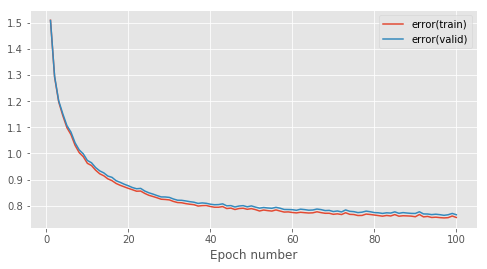

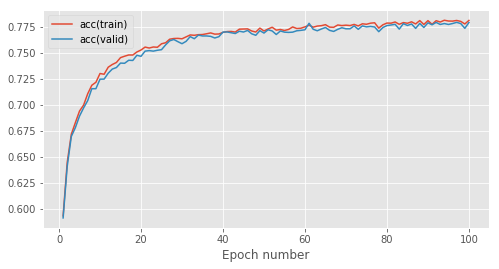

    final error(train) = 7.55e-01
    final error(valid) = 7.66e-01
    final acc(train)   = 7.81e-01
    final acc(valid)   = 7.79e-01
    run time per epoch = 5.43


Epoch 1: 4.1s to complete
    error(train)=1.52e+00, acc(train)=5.91e-01, error(valid)=1.51e+00, acc(valid)=5.91e-01


Epoch 2: 4.0s to complete
    error(train)=1.26e+00, acc(train)=6.50e-01, error(valid)=1.26e+00, acc(valid)=6.45e-01


Epoch 3: 4.5s to complete
    error(train)=1.14e+00, acc(train)=6.83e-01, error(valid)=1.14e+00, acc(valid)=6.78e-01


Epoch 4: 4.0s to complete
    error(train)=1.07e+00, acc(train)=6.99e-01, error(valid)=1.07e+00, acc(valid)=6.94e-01


Epoch 5: 3.6s to complete
    error(train)=1.01e+00, acc(train)=7.16e-01, error(valid)=1.02e+00, acc(valid)=7.09e-01


Epoch 6: 3.8s to complete
    error(train)=9.65e-01, acc(train)=7.25e-01, error(valid)=9.77e-01, acc(valid)=7.17e-01


Epoch 7: 4.0s to complete
    error(train)=9.30e-01, acc(train)=7.36e-01, error(valid)=9.41e-01, acc(valid)=7.30e-01


Epoch 8: 3.8s to complete
    error(train)=8.98e-01, acc(train)=7.43e-01, error(valid)=9.12e-01, acc(valid)=7.38e-01


Epoch 9: 4.0s to complete
    error(train)=8.71e-01, acc(train)=7.51e-01, error(valid)=8.84e-01, acc(valid)=7.47e-01


Epoch 10: 3.9s to complete
    error(train)=8.58e-01, acc(train)=7.54e-01, error(valid)=8.73e-01, acc(valid)=7.48e-01


Epoch 11: 4.0s to complete
    error(train)=8.33e-01, acc(train)=7.61e-01, error(valid)=8.47e-01, acc(valid)=7.53e-01


Epoch 12: 4.1s to complete
    error(train)=8.21e-01, acc(train)=7.62e-01, error(valid)=8.34e-01, acc(valid)=7.57e-01


Epoch 13: 4.0s to complete
    error(train)=8.01e-01, acc(train)=7.67e-01, error(valid)=8.15e-01, acc(valid)=7.65e-01


Epoch 14: 4.9s to complete
    error(train)=7.88e-01, acc(train)=7.71e-01, error(valid)=8.03e-01, acc(valid)=7.67e-01


Epoch 15: 4.2s to complete
    error(train)=7.75e-01, acc(train)=7.74e-01, error(valid)=7.89e-01, acc(valid)=7.69e-01


Epoch 16: 4.1s to complete
    error(train)=7.64e-01, acc(train)=7.75e-01, error(valid)=7.79e-01, acc(valid)=7.74e-01


Epoch 17: 4.3s to complete
    error(train)=7.56e-01, acc(train)=7.80e-01, error(valid)=7.70e-01, acc(valid)=7.75e-01


Epoch 18: 4.1s to complete
    error(train)=7.45e-01, acc(train)=7.82e-01, error(valid)=7.61e-01, acc(valid)=7.79e-01


Epoch 19: 3.9s to complete
    error(train)=7.36e-01, acc(train)=7.83e-01, error(valid)=7.53e-01, acc(valid)=7.80e-01


Epoch 20: 4.2s to complete
    error(train)=7.31e-01, acc(train)=7.85e-01, error(valid)=7.48e-01, acc(valid)=7.81e-01


Epoch 21: 4.1s to complete
    error(train)=7.24e-01, acc(train)=7.86e-01, error(valid)=7.39e-01, acc(valid)=7.82e-01


Epoch 22: 4.2s to complete
    error(train)=7.17e-01, acc(train)=7.85e-01, error(valid)=7.31e-01, acc(valid)=7.82e-01


Epoch 23: 4.7s to complete
    error(train)=7.09e-01, acc(train)=7.89e-01, error(valid)=7.25e-01, acc(valid)=7.86e-01


Epoch 24: 4.5s to complete
    error(train)=7.04e-01, acc(train)=7.92e-01, error(valid)=7.20e-01, acc(valid)=7.89e-01


Epoch 25: 4.5s to complete
    error(train)=6.99e-01, acc(train)=7.92e-01, error(valid)=7.15e-01, acc(valid)=7.89e-01


Epoch 26: 4.6s to complete
    error(train)=7.00e-01, acc(train)=7.90e-01, error(valid)=7.16e-01, acc(valid)=7.84e-01


Epoch 27: 4.1s to complete
    error(train)=7.01e-01, acc(train)=7.90e-01, error(valid)=7.17e-01, acc(valid)=7.87e-01


Epoch 28: 4.3s to complete
    error(train)=6.88e-01, acc(train)=7.94e-01, error(valid)=7.04e-01, acc(valid)=7.90e-01


Epoch 29: 4.3s to complete
    error(train)=6.84e-01, acc(train)=7.95e-01, error(valid)=7.01e-01, acc(valid)=7.91e-01


Epoch 30: 4.9s to complete
    error(train)=6.82e-01, acc(train)=7.95e-01, error(valid)=7.00e-01, acc(valid)=7.94e-01


Epoch 31: 4.1s to complete
    error(train)=6.76e-01, acc(train)=7.98e-01, error(valid)=6.93e-01, acc(valid)=7.94e-01


Epoch 32: 4.1s to complete
    error(train)=6.76e-01, acc(train)=7.97e-01, error(valid)=6.93e-01, acc(valid)=7.93e-01


Epoch 33: 4.3s to complete
    error(train)=6.70e-01, acc(train)=7.99e-01, error(valid)=6.87e-01, acc(valid)=7.94e-01


Epoch 34: 4.5s to complete
    error(train)=6.69e-01, acc(train)=8.00e-01, error(valid)=6.87e-01, acc(valid)=7.95e-01


Epoch 35: 4.8s to complete
    error(train)=6.66e-01, acc(train)=7.99e-01, error(valid)=6.84e-01, acc(valid)=7.95e-01


Epoch 36: 4.0s to complete
    error(train)=6.63e-01, acc(train)=8.00e-01, error(valid)=6.82e-01, acc(valid)=7.98e-01


Epoch 37: 3.9s to complete
    error(train)=6.62e-01, acc(train)=8.02e-01, error(valid)=6.80e-01, acc(valid)=7.98e-01


Epoch 38: 3.9s to complete
    error(train)=6.58e-01, acc(train)=8.02e-01, error(valid)=6.76e-01, acc(valid)=8.00e-01


Epoch 39: 4.0s to complete
    error(train)=6.57e-01, acc(train)=8.03e-01, error(valid)=6.75e-01, acc(valid)=7.98e-01


Epoch 40: 4.1s to complete
    error(train)=6.53e-01, acc(train)=8.03e-01, error(valid)=6.72e-01, acc(valid)=7.99e-01


Epoch 41: 4.0s to complete
    error(train)=6.54e-01, acc(train)=8.03e-01, error(valid)=6.73e-01, acc(valid)=7.99e-01


Epoch 42: 4.0s to complete
    error(train)=6.48e-01, acc(train)=8.04e-01, error(valid)=6.68e-01, acc(valid)=8.01e-01


Epoch 43: 4.0s to complete
    error(train)=6.48e-01, acc(train)=8.03e-01, error(valid)=6.68e-01, acc(valid)=7.99e-01


Epoch 44: 3.9s to complete
    error(train)=6.47e-01, acc(train)=8.05e-01, error(valid)=6.67e-01, acc(valid)=8.00e-01


Epoch 45: 4.8s to complete
    error(train)=6.42e-01, acc(train)=8.06e-01, error(valid)=6.62e-01, acc(valid)=8.02e-01


Epoch 46: 4.7s to complete
    error(train)=6.44e-01, acc(train)=8.05e-01, error(valid)=6.64e-01, acc(valid)=8.02e-01


Epoch 47: 5.1s to complete
    error(train)=6.42e-01, acc(train)=8.06e-01, error(valid)=6.62e-01, acc(valid)=8.04e-01


Epoch 48: 4.1s to complete
    error(train)=6.39e-01, acc(train)=8.06e-01, error(valid)=6.60e-01, acc(valid)=8.02e-01


Epoch 49: 4.0s to complete
    error(train)=6.36e-01, acc(train)=8.07e-01, error(valid)=6.56e-01, acc(valid)=8.04e-01


Epoch 50: 4.0s to complete
    error(train)=6.38e-01, acc(train)=8.07e-01, error(valid)=6.59e-01, acc(valid)=8.02e-01


Epoch 51: 4.1s to complete
    error(train)=6.33e-01, acc(train)=8.08e-01, error(valid)=6.54e-01, acc(valid)=8.02e-01


Epoch 52: 4.0s to complete
    error(train)=6.33e-01, acc(train)=8.07e-01, error(valid)=6.53e-01, acc(valid)=8.03e-01


Epoch 53: 4.0s to complete
    error(train)=6.32e-01, acc(train)=8.09e-01, error(valid)=6.52e-01, acc(valid)=8.02e-01


Epoch 54: 4.1s to complete
    error(train)=6.36e-01, acc(train)=8.07e-01, error(valid)=6.55e-01, acc(valid)=8.03e-01


Epoch 55: 4.2s to complete
    error(train)=6.29e-01, acc(train)=8.10e-01, error(valid)=6.50e-01, acc(valid)=8.06e-01


Epoch 56: 4.0s to complete
    error(train)=6.23e-01, acc(train)=8.11e-01, error(valid)=6.44e-01, acc(valid)=8.06e-01


Epoch 57: 4.0s to complete
    error(train)=6.26e-01, acc(train)=8.12e-01, error(valid)=6.46e-01, acc(valid)=8.08e-01


Epoch 58: 4.2s to complete
    error(train)=6.28e-01, acc(train)=8.09e-01, error(valid)=6.50e-01, acc(valid)=8.03e-01


Epoch 59: 4.1s to complete
    error(train)=6.20e-01, acc(train)=8.12e-01, error(valid)=6.41e-01, acc(valid)=8.06e-01


Epoch 60: 4.0s to complete
    error(train)=6.22e-01, acc(train)=8.12e-01, error(valid)=6.43e-01, acc(valid)=8.07e-01


Epoch 61: 4.0s to complete
    error(train)=6.21e-01, acc(train)=8.11e-01, error(valid)=6.43e-01, acc(valid)=8.05e-01


Epoch 62: 3.8s to complete
    error(train)=6.17e-01, acc(train)=8.13e-01, error(valid)=6.40e-01, acc(valid)=8.06e-01


Epoch 63: 4.0s to complete
    error(train)=6.18e-01, acc(train)=8.12e-01, error(valid)=6.41e-01, acc(valid)=8.05e-01


Epoch 64: 4.7s to complete
    error(train)=6.16e-01, acc(train)=8.13e-01, error(valid)=6.38e-01, acc(valid)=8.07e-01


Epoch 65: 4.4s to complete
    error(train)=6.15e-01, acc(train)=8.13e-01, error(valid)=6.37e-01, acc(valid)=8.07e-01


Epoch 66: 4.3s to complete
    error(train)=6.11e-01, acc(train)=8.15e-01, error(valid)=6.33e-01, acc(valid)=8.10e-01


Epoch 67: 4.8s to complete
    error(train)=6.16e-01, acc(train)=8.13e-01, error(valid)=6.37e-01, acc(valid)=8.07e-01


Epoch 68: 4.7s to complete
    error(train)=6.13e-01, acc(train)=8.12e-01, error(valid)=6.37e-01, acc(valid)=8.05e-01


Epoch 69: 4.1s to complete
    error(train)=6.14e-01, acc(train)=8.11e-01, error(valid)=6.37e-01, acc(valid)=8.07e-01


Epoch 70: 3.9s to complete
    error(train)=6.07e-01, acc(train)=8.15e-01, error(valid)=6.29e-01, acc(valid)=8.10e-01


Epoch 71: 4.2s to complete
    error(train)=6.07e-01, acc(train)=8.15e-01, error(valid)=6.29e-01, acc(valid)=8.09e-01


Epoch 72: 3.9s to complete
    error(train)=6.12e-01, acc(train)=8.16e-01, error(valid)=6.33e-01, acc(valid)=8.07e-01


Epoch 73: 4.1s to complete
    error(train)=6.08e-01, acc(train)=8.16e-01, error(valid)=6.31e-01, acc(valid)=8.09e-01


Epoch 74: 4.1s to complete
    error(train)=6.10e-01, acc(train)=8.14e-01, error(valid)=6.33e-01, acc(valid)=8.05e-01


Epoch 75: 4.2s to complete
    error(train)=6.05e-01, acc(train)=8.16e-01, error(valid)=6.29e-01, acc(valid)=8.10e-01


Epoch 76: 4.2s to complete
    error(train)=6.05e-01, acc(train)=8.14e-01, error(valid)=6.29e-01, acc(valid)=8.06e-01


Epoch 77: 4.1s to complete
    error(train)=6.04e-01, acc(train)=8.16e-01, error(valid)=6.27e-01, acc(valid)=8.09e-01


Epoch 78: 4.0s to complete
    error(train)=6.06e-01, acc(train)=8.15e-01, error(valid)=6.30e-01, acc(valid)=8.07e-01


Epoch 79: 4.2s to complete
    error(train)=6.01e-01, acc(train)=8.17e-01, error(valid)=6.26e-01, acc(valid)=8.09e-01


Epoch 80: 4.1s to complete
    error(train)=5.99e-01, acc(train)=8.17e-01, error(valid)=6.23e-01, acc(valid)=8.11e-01


Epoch 81: 4.1s to complete
    error(train)=5.99e-01, acc(train)=8.18e-01, error(valid)=6.23e-01, acc(valid)=8.14e-01


Epoch 82: 4.2s to complete
    error(train)=6.00e-01, acc(train)=8.17e-01, error(valid)=6.23e-01, acc(valid)=8.11e-01


Epoch 83: 4.2s to complete
    error(train)=6.05e-01, acc(train)=8.16e-01, error(valid)=6.32e-01, acc(valid)=8.08e-01


Epoch 84: 4.1s to complete
    error(train)=5.96e-01, acc(train)=8.19e-01, error(valid)=6.20e-01, acc(valid)=8.11e-01


Epoch 85: 4.3s to complete
    error(train)=5.97e-01, acc(train)=8.19e-01, error(valid)=6.22e-01, acc(valid)=8.11e-01


Epoch 86: 4.2s to complete
    error(train)=5.97e-01, acc(train)=8.19e-01, error(valid)=6.21e-01, acc(valid)=8.13e-01


Epoch 87: 4.2s to complete
    error(train)=5.96e-01, acc(train)=8.18e-01, error(valid)=6.20e-01, acc(valid)=8.13e-01


Epoch 88: 4.9s to complete
    error(train)=5.92e-01, acc(train)=8.19e-01, error(valid)=6.17e-01, acc(valid)=8.12e-01


Epoch 89: 4.6s to complete
    error(train)=5.93e-01, acc(train)=8.19e-01, error(valid)=6.17e-01, acc(valid)=8.11e-01


Epoch 90: 5.2s to complete
    error(train)=5.91e-01, acc(train)=8.20e-01, error(valid)=6.15e-01, acc(valid)=8.12e-01


Epoch 91: 4.3s to complete
    error(train)=5.90e-01, acc(train)=8.21e-01, error(valid)=6.16e-01, acc(valid)=8.13e-01


Epoch 92: 4.1s to complete
    error(train)=5.89e-01, acc(train)=8.22e-01, error(valid)=6.14e-01, acc(valid)=8.13e-01


Epoch 93: 4.2s to complete
    error(train)=5.90e-01, acc(train)=8.21e-01, error(valid)=6.15e-01, acc(valid)=8.14e-01


Epoch 94: 4.1s to complete
    error(train)=5.92e-01, acc(train)=8.20e-01, error(valid)=6.17e-01, acc(valid)=8.12e-01


Epoch 95: 4.1s to complete
    error(train)=5.92e-01, acc(train)=8.19e-01, error(valid)=6.17e-01, acc(valid)=8.12e-01


Epoch 96: 4.4s to complete
    error(train)=5.86e-01, acc(train)=8.21e-01, error(valid)=6.13e-01, acc(valid)=8.15e-01


Epoch 97: 4.2s to complete
    error(train)=5.88e-01, acc(train)=8.21e-01, error(valid)=6.14e-01, acc(valid)=8.14e-01


Epoch 98: 4.9s to complete
    error(train)=5.91e-01, acc(train)=8.19e-01, error(valid)=6.16e-01, acc(valid)=8.12e-01


Epoch 99: 5.6s to complete
    error(train)=5.87e-01, acc(train)=8.22e-01, error(valid)=6.13e-01, acc(valid)=8.15e-01


Epoch 100: 4.2s to complete
    error(train)=5.86e-01, acc(train)=8.22e-01, error(valid)=6.13e-01, acc(valid)=8.13e-01


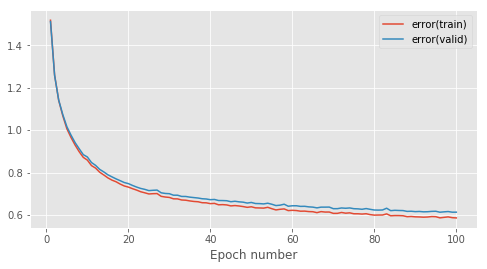

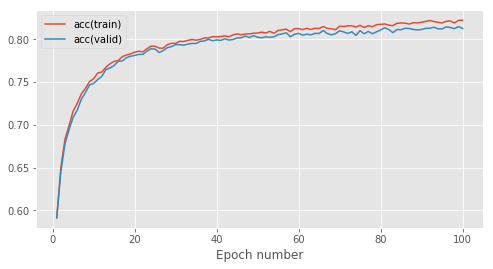

    final error(train) = 5.86e-01
    final error(valid) = 6.13e-01
    final acc(train)   = 8.22e-01
    final acc(valid)   = 8.13e-01
    run time per epoch = 5.47


Epoch 1: 3.9s to complete
    error(train)=1.46e+00, acc(train)=5.95e-01, error(valid)=1.46e+00, acc(valid)=5.93e-01


Epoch 2: 4.0s to complete
    error(train)=1.21e+00, acc(train)=6.60e-01, error(valid)=1.22e+00, acc(valid)=6.55e-01


Epoch 3: 3.9s to complete
    error(train)=1.08e+00, acc(train)=6.91e-01, error(valid)=1.10e+00, acc(valid)=6.84e-01


Epoch 4: 4.0s to complete
    error(train)=9.89e-01, acc(train)=7.18e-01, error(valid)=1.00e+00, acc(valid)=7.13e-01


Epoch 5: 3.8s to complete
    error(train)=9.21e-01, acc(train)=7.34e-01, error(valid)=9.37e-01, acc(valid)=7.29e-01


Epoch 6: 3.7s to complete
    error(train)=8.66e-01, acc(train)=7.47e-01, error(valid)=8.82e-01, acc(valid)=7.41e-01


Epoch 7: 4.4s to complete
    error(train)=8.21e-01, acc(train)=7.58e-01, error(valid)=8.42e-01, acc(valid)=7.52e-01


Epoch 8: 4.5s to complete
    error(train)=7.87e-01, acc(train)=7.66e-01, error(valid)=8.05e-01, acc(valid)=7.62e-01


Epoch 9: 4.3s to complete
    error(train)=7.53e-01, acc(train)=7.76e-01, error(valid)=7.75e-01, acc(valid)=7.69e-01


Epoch 10: 4.6s to complete
    error(train)=7.23e-01, acc(train)=7.83e-01, error(valid)=7.47e-01, acc(valid)=7.80e-01


Epoch 11: 4.6s to complete
    error(train)=7.05e-01, acc(train)=7.88e-01, error(valid)=7.30e-01, acc(valid)=7.79e-01


Epoch 12: 4.0s to complete
    error(train)=6.84e-01, acc(train)=7.93e-01, error(valid)=7.11e-01, acc(valid)=7.85e-01


Epoch 13: 4.0s to complete
    error(train)=6.67e-01, acc(train)=7.97e-01, error(valid)=6.94e-01, acc(valid)=7.90e-01


Epoch 14: 3.9s to complete
    error(train)=6.52e-01, acc(train)=8.00e-01, error(valid)=6.82e-01, acc(valid)=7.93e-01


Epoch 15: 3.9s to complete
    error(train)=6.40e-01, acc(train)=8.03e-01, error(valid)=6.71e-01, acc(valid)=7.93e-01


Epoch 16: 3.9s to complete
    error(train)=6.24e-01, acc(train)=8.08e-01, error(valid)=6.57e-01, acc(valid)=8.01e-01


Epoch 17: 3.9s to complete
    error(train)=6.10e-01, acc(train)=8.13e-01, error(valid)=6.43e-01, acc(valid)=8.03e-01


Epoch 18: 3.9s to complete
    error(train)=5.97e-01, acc(train)=8.17e-01, error(valid)=6.32e-01, acc(valid)=8.07e-01


Epoch 19: 4.0s to complete
    error(train)=5.90e-01, acc(train)=8.19e-01, error(valid)=6.27e-01, acc(valid)=8.06e-01


Epoch 20: 4.0s to complete
    error(train)=5.79e-01, acc(train)=8.21e-01, error(valid)=6.17e-01, acc(valid)=8.12e-01


Epoch 21: 4.0s to complete
    error(train)=5.71e-01, acc(train)=8.22e-01, error(valid)=6.11e-01, acc(valid)=8.12e-01


Epoch 22: 4.0s to complete
    error(train)=5.65e-01, acc(train)=8.25e-01, error(valid)=6.05e-01, acc(valid)=8.13e-01


Epoch 23: 4.3s to complete
    error(train)=5.63e-01, acc(train)=8.24e-01, error(valid)=6.06e-01, acc(valid)=8.12e-01


Epoch 24: 4.0s to complete
    error(train)=5.50e-01, acc(train)=8.27e-01, error(valid)=5.94e-01, acc(valid)=8.15e-01


Epoch 25: 4.1s to complete
    error(train)=5.42e-01, acc(train)=8.31e-01, error(valid)=5.87e-01, acc(valid)=8.17e-01


Epoch 26: 4.1s to complete
    error(train)=5.37e-01, acc(train)=8.32e-01, error(valid)=5.82e-01, acc(valid)=8.19e-01


Epoch 27: 4.0s to complete
    error(train)=5.34e-01, acc(train)=8.32e-01, error(valid)=5.81e-01, acc(valid)=8.20e-01


Epoch 28: 4.1s to complete
    error(train)=5.29e-01, acc(train)=8.33e-01, error(valid)=5.79e-01, acc(valid)=8.17e-01


Epoch 29: 4.8s to complete
    error(train)=5.24e-01, acc(train)=8.33e-01, error(valid)=5.73e-01, acc(valid)=8.21e-01


Epoch 30: 4.2s to complete
    error(train)=5.18e-01, acc(train)=8.37e-01, error(valid)=5.68e-01, acc(valid)=8.24e-01


Epoch 31: 4.1s to complete
    error(train)=5.14e-01, acc(train)=8.37e-01, error(valid)=5.67e-01, acc(valid)=8.21e-01


Epoch 32: 4.3s to complete
    error(train)=5.09e-01, acc(train)=8.38e-01, error(valid)=5.62e-01, acc(valid)=8.22e-01


Epoch 33: 4.9s to complete
    error(train)=5.04e-01, acc(train)=8.40e-01, error(valid)=5.58e-01, acc(valid)=8.24e-01


Epoch 34: 5.9s to complete
    error(train)=5.00e-01, acc(train)=8.42e-01, error(valid)=5.55e-01, acc(valid)=8.27e-01


Epoch 35: 4.5s to complete
    error(train)=4.96e-01, acc(train)=8.42e-01, error(valid)=5.53e-01, acc(valid)=8.24e-01


Epoch 36: 4.1s to complete
    error(train)=4.91e-01, acc(train)=8.44e-01, error(valid)=5.50e-01, acc(valid)=8.25e-01


Epoch 37: 3.9s to complete
    error(train)=4.89e-01, acc(train)=8.43e-01, error(valid)=5.48e-01, acc(valid)=8.24e-01


Epoch 38: 4.1s to complete
    error(train)=4.84e-01, acc(train)=8.45e-01, error(valid)=5.44e-01, acc(valid)=8.27e-01


Epoch 39: 4.2s to complete
    error(train)=4.83e-01, acc(train)=8.45e-01, error(valid)=5.43e-01, acc(valid)=8.27e-01


Epoch 40: 4.4s to complete
    error(train)=4.80e-01, acc(train)=8.46e-01, error(valid)=5.43e-01, acc(valid)=8.27e-01


Epoch 41: 3.9s to complete
    error(train)=4.76e-01, acc(train)=8.47e-01, error(valid)=5.39e-01, acc(valid)=8.27e-01


Epoch 42: 3.9s to complete
    error(train)=4.75e-01, acc(train)=8.48e-01, error(valid)=5.39e-01, acc(valid)=8.28e-01


Epoch 43: 4.0s to complete
    error(train)=4.71e-01, acc(train)=8.48e-01, error(valid)=5.33e-01, acc(valid)=8.30e-01


Epoch 44: 4.0s to complete
    error(train)=4.68e-01, acc(train)=8.49e-01, error(valid)=5.33e-01, acc(valid)=8.28e-01


Epoch 45: 4.1s to complete
    error(train)=4.64e-01, acc(train)=8.50e-01, error(valid)=5.32e-01, acc(valid)=8.29e-01


Epoch 46: 4.0s to complete
    error(train)=4.64e-01, acc(train)=8.50e-01, error(valid)=5.33e-01, acc(valid)=8.30e-01


Epoch 47: 4.2s to complete
    error(train)=4.63e-01, acc(train)=8.49e-01, error(valid)=5.30e-01, acc(valid)=8.29e-01


Epoch 48: 4.1s to complete
    error(train)=4.58e-01, acc(train)=8.52e-01, error(valid)=5.27e-01, acc(valid)=8.28e-01


Epoch 49: 4.1s to complete
    error(train)=4.56e-01, acc(train)=8.52e-01, error(valid)=5.24e-01, acc(valid)=8.31e-01


Epoch 50: 4.0s to complete
    error(train)=4.53e-01, acc(train)=8.52e-01, error(valid)=5.23e-01, acc(valid)=8.32e-01


Epoch 51: 4.0s to complete
    error(train)=4.54e-01, acc(train)=8.53e-01, error(valid)=5.25e-01, acc(valid)=8.31e-01


Epoch 52: 4.1s to complete
    error(train)=4.50e-01, acc(train)=8.53e-01, error(valid)=5.22e-01, acc(valid)=8.32e-01


Epoch 53: 4.1s to complete
    error(train)=4.47e-01, acc(train)=8.54e-01, error(valid)=5.19e-01, acc(valid)=8.32e-01


Epoch 54: 5.0s to complete
    error(train)=4.47e-01, acc(train)=8.56e-01, error(valid)=5.18e-01, acc(valid)=8.32e-01


Epoch 55: 4.9s to complete
    error(train)=4.41e-01, acc(train)=8.56e-01, error(valid)=5.14e-01, acc(valid)=8.36e-01


Epoch 56: 4.4s to complete
    error(train)=4.42e-01, acc(train)=8.57e-01, error(valid)=5.16e-01, acc(valid)=8.35e-01


Epoch 57: 4.3s to complete
    error(train)=4.42e-01, acc(train)=8.56e-01, error(valid)=5.17e-01, acc(valid)=8.32e-01


Epoch 58: 4.1s to complete
    error(train)=4.38e-01, acc(train)=8.57e-01, error(valid)=5.15e-01, acc(valid)=8.34e-01


Epoch 59: 4.0s to complete
    error(train)=4.37e-01, acc(train)=8.57e-01, error(valid)=5.14e-01, acc(valid)=8.33e-01


Epoch 60: 4.1s to complete
    error(train)=4.34e-01, acc(train)=8.58e-01, error(valid)=5.12e-01, acc(valid)=8.33e-01


Epoch 61: 4.1s to complete
    error(train)=4.33e-01, acc(train)=8.59e-01, error(valid)=5.10e-01, acc(valid)=8.36e-01


Epoch 62: 3.9s to complete
    error(train)=4.30e-01, acc(train)=8.59e-01, error(valid)=5.09e-01, acc(valid)=8.34e-01


Epoch 63: 4.0s to complete
    error(train)=4.33e-01, acc(train)=8.57e-01, error(valid)=5.15e-01, acc(valid)=8.33e-01


Epoch 64: 4.2s to complete
    error(train)=4.25e-01, acc(train)=8.61e-01, error(valid)=5.06e-01, acc(valid)=8.37e-01


Epoch 65: 4.1s to complete
    error(train)=4.24e-01, acc(train)=8.62e-01, error(valid)=5.05e-01, acc(valid)=8.36e-01


Epoch 66: 4.0s to complete
    error(train)=4.24e-01, acc(train)=8.61e-01, error(valid)=5.07e-01, acc(valid)=8.37e-01


Epoch 67: 4.1s to complete
    error(train)=4.23e-01, acc(train)=8.63e-01, error(valid)=5.04e-01, acc(valid)=8.37e-01


Epoch 68: 3.9s to complete
    error(train)=4.22e-01, acc(train)=8.61e-01, error(valid)=5.06e-01, acc(valid)=8.34e-01


Epoch 69: 4.9s to complete
    error(train)=4.22e-01, acc(train)=8.62e-01, error(valid)=5.04e-01, acc(valid)=8.39e-01


Epoch 70: 4.1s to complete
    error(train)=4.18e-01, acc(train)=8.63e-01, error(valid)=5.02e-01, acc(valid)=8.38e-01


Epoch 71: 4.2s to complete
    error(train)=4.16e-01, acc(train)=8.63e-01, error(valid)=5.00e-01, acc(valid)=8.39e-01


Epoch 72: 4.1s to complete
    error(train)=4.21e-01, acc(train)=8.61e-01, error(valid)=5.06e-01, acc(valid)=8.36e-01


Epoch 73: 4.0s to complete
    error(train)=4.16e-01, acc(train)=8.64e-01, error(valid)=5.03e-01, acc(valid)=8.36e-01


Epoch 74: 4.2s to complete
    error(train)=4.13e-01, acc(train)=8.64e-01, error(valid)=5.01e-01, acc(valid)=8.37e-01


Epoch 75: 3.9s to complete
    error(train)=4.13e-01, acc(train)=8.65e-01, error(valid)=4.99e-01, acc(valid)=8.37e-01


Epoch 76: 4.1s to complete
    error(train)=4.09e-01, acc(train)=8.65e-01, error(valid)=4.96e-01, acc(valid)=8.38e-01


Epoch 77: 4.8s to complete
    error(train)=4.10e-01, acc(train)=8.65e-01, error(valid)=4.96e-01, acc(valid)=8.38e-01


Epoch 78: 5.7s to complete
    error(train)=4.09e-01, acc(train)=8.66e-01, error(valid)=4.97e-01, acc(valid)=8.38e-01


Epoch 79: 4.3s to complete
    error(train)=4.06e-01, acc(train)=8.67e-01, error(valid)=4.94e-01, acc(valid)=8.40e-01


Epoch 80: 4.1s to complete
    error(train)=4.09e-01, acc(train)=8.65e-01, error(valid)=5.00e-01, acc(valid)=8.37e-01


Epoch 81: 4.7s to complete
    error(train)=4.05e-01, acc(train)=8.66e-01, error(valid)=4.94e-01, acc(valid)=8.38e-01


Epoch 82: 4.0s to complete
    error(train)=4.03e-01, acc(train)=8.67e-01, error(valid)=4.94e-01, acc(valid)=8.40e-01


Epoch 83: 3.9s to complete
    error(train)=4.04e-01, acc(train)=8.68e-01, error(valid)=4.93e-01, acc(valid)=8.40e-01


Epoch 84: 4.2s to complete
    error(train)=4.00e-01, acc(train)=8.68e-01, error(valid)=4.91e-01, acc(valid)=8.39e-01


Epoch 85: 4.0s to complete
    error(train)=3.97e-01, acc(train)=8.69e-01, error(valid)=4.90e-01, acc(valid)=8.39e-01


Epoch 86: 4.1s to complete
    error(train)=3.99e-01, acc(train)=8.68e-01, error(valid)=4.90e-01, acc(valid)=8.39e-01


Epoch 87: 4.1s to complete
    error(train)=3.96e-01, acc(train)=8.70e-01, error(valid)=4.89e-01, acc(valid)=8.38e-01


Epoch 88: 3.9s to complete
    error(train)=3.97e-01, acc(train)=8.68e-01, error(valid)=4.89e-01, acc(valid)=8.40e-01


Epoch 89: 4.1s to complete
    error(train)=3.97e-01, acc(train)=8.68e-01, error(valid)=4.91e-01, acc(valid)=8.40e-01


Epoch 90: 4.6s to complete
    error(train)=3.96e-01, acc(train)=8.68e-01, error(valid)=4.91e-01, acc(valid)=8.39e-01


Epoch 91: 4.0s to complete
    error(train)=3.91e-01, acc(train)=8.71e-01, error(valid)=4.87e-01, acc(valid)=8.39e-01


Epoch 92: 4.7s to complete
    error(train)=3.95e-01, acc(train)=8.70e-01, error(valid)=4.91e-01, acc(valid)=8.38e-01


Epoch 93: 4.2s to complete
    error(train)=3.90e-01, acc(train)=8.71e-01, error(valid)=4.85e-01, acc(valid)=8.42e-01


Epoch 94: 4.0s to complete
    error(train)=3.90e-01, acc(train)=8.71e-01, error(valid)=4.85e-01, acc(valid)=8.41e-01


Epoch 95: 4.2s to complete
    error(train)=3.92e-01, acc(train)=8.70e-01, error(valid)=4.89e-01, acc(valid)=8.39e-01


Epoch 96: 4.1s to complete
    error(train)=3.89e-01, acc(train)=8.71e-01, error(valid)=4.86e-01, acc(valid)=8.41e-01


Epoch 97: 4.6s to complete
    error(train)=3.87e-01, acc(train)=8.72e-01, error(valid)=4.85e-01, acc(valid)=8.41e-01


Epoch 98: 5.2s to complete
    error(train)=3.87e-01, acc(train)=8.73e-01, error(valid)=4.85e-01, acc(valid)=8.40e-01


Epoch 99: 4.2s to complete
    error(train)=3.86e-01, acc(train)=8.71e-01, error(valid)=4.86e-01, acc(valid)=8.41e-01


Epoch 100: 4.0s to complete
    error(train)=3.84e-01, acc(train)=8.73e-01, error(valid)=4.81e-01, acc(valid)=8.40e-01


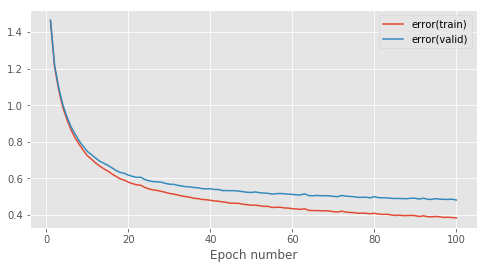

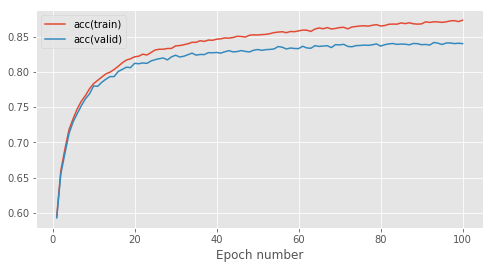

    final error(train) = 3.84e-01
    final error(valid) = 4.81e-01
    final acc(train)   = 8.73e-01
    final acc(valid)   = 8.40e-01
    run time per epoch = 5.46


Epoch 1: 3.8s to complete
    error(train)=1.50e+00, acc(train)=5.90e-01, error(valid)=1.50e+00, acc(valid)=5.85e-01


Epoch 2: 4.0s to complete
    error(train)=1.23e+00, acc(train)=6.59e-01, error(valid)=1.23e+00, acc(valid)=6.55e-01


Epoch 3: 3.8s to complete
    error(train)=1.09e+00, acc(train)=6.93e-01, error(valid)=1.10e+00, acc(valid)=6.88e-01


Epoch 4: 3.9s to complete
    error(train)=9.92e-01, acc(train)=7.17e-01, error(valid)=1.01e+00, acc(valid)=7.10e-01


Epoch 5: 3.9s to complete
    error(train)=9.23e-01, acc(train)=7.31e-01, error(valid)=9.39e-01, acc(valid)=7.25e-01


Epoch 6: 3.9s to complete
    error(train)=8.65e-01, acc(train)=7.45e-01, error(valid)=8.84e-01, acc(valid)=7.37e-01


Epoch 7: 3.9s to complete
    error(train)=8.22e-01, acc(train)=7.59e-01, error(valid)=8.43e-01, acc(valid)=7.49e-01


Epoch 8: 3.9s to complete
    error(train)=7.79e-01, acc(train)=7.69e-01, error(valid)=8.03e-01, acc(valid)=7.61e-01


Epoch 9: 3.9s to complete
    error(train)=7.49e-01, acc(train)=7.74e-01, error(valid)=7.75e-01, acc(valid)=7.67e-01


Epoch 10: 3.8s to complete
    error(train)=7.23e-01, acc(train)=7.83e-01, error(valid)=7.51e-01, acc(valid)=7.73e-01


Epoch 11: 4.0s to complete
    error(train)=6.98e-01, acc(train)=7.89e-01, error(valid)=7.29e-01, acc(valid)=7.80e-01


Epoch 12: 3.9s to complete
    error(train)=6.79e-01, acc(train)=7.93e-01, error(valid)=7.11e-01, acc(valid)=7.86e-01


Epoch 13: 4.1s to complete
    error(train)=6.64e-01, acc(train)=7.97e-01, error(valid)=6.99e-01, acc(valid)=7.88e-01


Epoch 14: 4.6s to complete
    error(train)=6.47e-01, acc(train)=8.01e-01, error(valid)=6.82e-01, acc(valid)=7.91e-01


Epoch 15: 3.8s to complete
    error(train)=6.33e-01, acc(train)=8.05e-01, error(valid)=6.69e-01, acc(valid)=7.95e-01


Epoch 16: 4.2s to complete
    error(train)=6.21e-01, acc(train)=8.09e-01, error(valid)=6.59e-01, acc(valid)=7.96e-01


Epoch 17: 4.0s to complete
    error(train)=6.08e-01, acc(train)=8.11e-01, error(valid)=6.50e-01, acc(valid)=7.98e-01


Epoch 18: 4.7s to complete
    error(train)=5.95e-01, acc(train)=8.16e-01, error(valid)=6.37e-01, acc(valid)=8.04e-01


Epoch 19: 4.6s to complete
    error(train)=5.87e-01, acc(train)=8.18e-01, error(valid)=6.32e-01, acc(valid)=8.04e-01


Epoch 20: 4.5s to complete
    error(train)=5.81e-01, acc(train)=8.18e-01, error(valid)=6.27e-01, acc(valid)=8.03e-01


Epoch 21: 4.2s to complete
    error(train)=5.67e-01, acc(train)=8.23e-01, error(valid)=6.15e-01, acc(valid)=8.08e-01


Epoch 22: 5.0s to complete
    error(train)=5.56e-01, acc(train)=8.25e-01, error(valid)=6.05e-01, acc(valid)=8.10e-01


Epoch 23: 4.0s to complete
    error(train)=5.47e-01, acc(train)=8.28e-01, error(valid)=5.96e-01, acc(valid)=8.14e-01


Epoch 24: 4.0s to complete
    error(train)=5.44e-01, acc(train)=8.29e-01, error(valid)=5.98e-01, acc(valid)=8.11e-01


Epoch 25: 4.0s to complete
    error(train)=5.35e-01, acc(train)=8.32e-01, error(valid)=5.88e-01, acc(valid)=8.15e-01


Epoch 26: 4.0s to complete
    error(train)=5.30e-01, acc(train)=8.33e-01, error(valid)=5.85e-01, acc(valid)=8.14e-01


Epoch 27: 4.0s to complete
    error(train)=5.27e-01, acc(train)=8.31e-01, error(valid)=5.83e-01, acc(valid)=8.11e-01


Epoch 28: 4.0s to complete
    error(train)=5.15e-01, acc(train)=8.37e-01, error(valid)=5.73e-01, acc(valid)=8.19e-01


Epoch 29: 4.1s to complete
    error(train)=5.07e-01, acc(train)=8.40e-01, error(valid)=5.65e-01, acc(valid)=8.21e-01


Epoch 30: 4.1s to complete
    error(train)=5.03e-01, acc(train)=8.41e-01, error(valid)=5.63e-01, acc(valid)=8.20e-01


Epoch 31: 4.0s to complete
    error(train)=5.01e-01, acc(train)=8.40e-01, error(valid)=5.64e-01, acc(valid)=8.17e-01


Epoch 32: 4.1s to complete
    error(train)=4.96e-01, acc(train)=8.42e-01, error(valid)=5.59e-01, acc(valid)=8.23e-01


Epoch 33: 3.9s to complete
    error(train)=4.87e-01, acc(train)=8.45e-01, error(valid)=5.51e-01, acc(valid)=8.23e-01


Epoch 34: 4.1s to complete
    error(train)=4.86e-01, acc(train)=8.45e-01, error(valid)=5.53e-01, acc(valid)=8.25e-01


Epoch 35: 4.0s to complete
    error(train)=4.82e-01, acc(train)=8.46e-01, error(valid)=5.50e-01, acc(valid)=8.24e-01


Epoch 36: 3.9s to complete
    error(train)=4.76e-01, acc(train)=8.47e-01, error(valid)=5.43e-01, acc(valid)=8.23e-01


Epoch 37: 4.0s to complete
    error(train)=4.73e-01, acc(train)=8.47e-01, error(valid)=5.44e-01, acc(valid)=8.22e-01


Epoch 38: 3.9s to complete
    error(train)=4.68e-01, acc(train)=8.49e-01, error(valid)=5.40e-01, acc(valid)=8.26e-01


Epoch 39: 4.0s to complete
    error(train)=4.65e-01, acc(train)=8.50e-01, error(valid)=5.38e-01, acc(valid)=8.24e-01


Epoch 40: 4.5s to complete
    error(train)=4.64e-01, acc(train)=8.49e-01, error(valid)=5.40e-01, acc(valid)=8.24e-01


Epoch 41: 4.1s to complete
    error(train)=4.57e-01, acc(train)=8.52e-01, error(valid)=5.32e-01, acc(valid)=8.28e-01


Epoch 42: 4.2s to complete
    error(train)=4.51e-01, acc(train)=8.54e-01, error(valid)=5.28e-01, acc(valid)=8.29e-01


Epoch 43: 4.7s to complete
    error(train)=4.52e-01, acc(train)=8.55e-01, error(valid)=5.29e-01, acc(valid)=8.28e-01


Epoch 44: 4.2s to complete
    error(train)=4.51e-01, acc(train)=8.53e-01, error(valid)=5.31e-01, acc(valid)=8.27e-01


Epoch 45: 4.3s to complete
    error(train)=4.47e-01, acc(train)=8.56e-01, error(valid)=5.29e-01, acc(valid)=8.28e-01


Epoch 46: 4.1s to complete
    error(train)=4.44e-01, acc(train)=8.55e-01, error(valid)=5.25e-01, acc(valid)=8.30e-01


Epoch 47: 4.1s to complete
    error(train)=4.41e-01, acc(train)=8.56e-01, error(valid)=5.24e-01, acc(valid)=8.30e-01


Epoch 48: 4.6s to complete
    error(train)=4.38e-01, acc(train)=8.57e-01, error(valid)=5.22e-01, acc(valid)=8.33e-01


Epoch 49: 4.5s to complete
    error(train)=4.35e-01, acc(train)=8.58e-01, error(valid)=5.18e-01, acc(valid)=8.30e-01


Epoch 50: 4.0s to complete
    error(train)=4.31e-01, acc(train)=8.59e-01, error(valid)=5.18e-01, acc(valid)=8.31e-01


Epoch 51: 4.2s to complete
    error(train)=4.30e-01, acc(train)=8.60e-01, error(valid)=5.15e-01, acc(valid)=8.34e-01


Epoch 52: 4.0s to complete
    error(train)=4.24e-01, acc(train)=8.62e-01, error(valid)=5.11e-01, acc(valid)=8.34e-01


Epoch 53: 4.2s to complete
    error(train)=4.24e-01, acc(train)=8.62e-01, error(valid)=5.14e-01, acc(valid)=8.33e-01


Epoch 54: 4.1s to complete
    error(train)=4.21e-01, acc(train)=8.62e-01, error(valid)=5.12e-01, acc(valid)=8.32e-01


Epoch 55: 4.0s to complete
    error(train)=4.19e-01, acc(train)=8.62e-01, error(valid)=5.12e-01, acc(valid)=8.32e-01


Epoch 56: 3.8s to complete
    error(train)=4.21e-01, acc(train)=8.62e-01, error(valid)=5.15e-01, acc(valid)=8.32e-01


Epoch 57: 4.0s to complete
    error(train)=4.14e-01, acc(train)=8.63e-01, error(valid)=5.07e-01, acc(valid)=8.33e-01


Epoch 58: 4.0s to complete
    error(train)=4.11e-01, acc(train)=8.65e-01, error(valid)=5.05e-01, acc(valid)=8.36e-01


Epoch 59: 4.0s to complete
    error(train)=4.10e-01, acc(train)=8.65e-01, error(valid)=5.06e-01, acc(valid)=8.34e-01


Epoch 60: 4.0s to complete
    error(train)=4.08e-01, acc(train)=8.66e-01, error(valid)=5.06e-01, acc(valid)=8.35e-01


Epoch 61: 3.9s to complete
    error(train)=4.10e-01, acc(train)=8.65e-01, error(valid)=5.08e-01, acc(valid)=8.35e-01


Epoch 62: 3.9s to complete
    error(train)=4.05e-01, acc(train)=8.66e-01, error(valid)=5.04e-01, acc(valid)=8.33e-01


Epoch 63: 4.0s to complete
    error(train)=4.01e-01, acc(train)=8.68e-01, error(valid)=5.01e-01, acc(valid)=8.37e-01


Epoch 64: 3.9s to complete
    error(train)=3.99e-01, acc(train)=8.70e-01, error(valid)=5.01e-01, acc(valid)=8.36e-01


Epoch 65: 4.2s to complete
    error(train)=4.00e-01, acc(train)=8.67e-01, error(valid)=5.02e-01, acc(valid)=8.35e-01


Epoch 66: 4.7s to complete
    error(train)=3.99e-01, acc(train)=8.67e-01, error(valid)=5.02e-01, acc(valid)=8.37e-01


Epoch 67: 4.5s to complete
    error(train)=3.99e-01, acc(train)=8.68e-01, error(valid)=5.04e-01, acc(valid)=8.35e-01


Epoch 68: 4.3s to complete
    error(train)=3.91e-01, acc(train)=8.71e-01, error(valid)=4.97e-01, acc(valid)=8.36e-01


Epoch 69: 4.1s to complete
    error(train)=3.97e-01, acc(train)=8.68e-01, error(valid)=5.03e-01, acc(valid)=8.36e-01


Epoch 70: 4.2s to complete
    error(train)=3.89e-01, acc(train)=8.71e-01, error(valid)=4.96e-01, acc(valid)=8.39e-01


Epoch 71: 4.2s to complete
    error(train)=3.90e-01, acc(train)=8.70e-01, error(valid)=4.98e-01, acc(valid)=8.36e-01


Epoch 72: 4.2s to complete
    error(train)=3.85e-01, acc(train)=8.73e-01, error(valid)=4.94e-01, acc(valid)=8.39e-01


Epoch 73: 4.0s to complete
    error(train)=3.86e-01, acc(train)=8.71e-01, error(valid)=4.97e-01, acc(valid)=8.37e-01


Epoch 74: 4.0s to complete
    error(train)=3.83e-01, acc(train)=8.72e-01, error(valid)=4.94e-01, acc(valid)=8.38e-01


Epoch 75: 3.9s to complete
    error(train)=3.81e-01, acc(train)=8.74e-01, error(valid)=4.94e-01, acc(valid)=8.37e-01


Epoch 76: 3.9s to complete
    error(train)=3.80e-01, acc(train)=8.74e-01, error(valid)=4.95e-01, acc(valid)=8.40e-01


Epoch 77: 4.2s to complete
    error(train)=3.76e-01, acc(train)=8.75e-01, error(valid)=4.90e-01, acc(valid)=8.39e-01


Epoch 78: 4.0s to complete
    error(train)=3.78e-01, acc(train)=8.73e-01, error(valid)=4.91e-01, acc(valid)=8.39e-01


Epoch 79: 4.0s to complete
    error(train)=3.75e-01, acc(train)=8.75e-01, error(valid)=4.91e-01, acc(valid)=8.39e-01


Epoch 80: 4.0s to complete
    error(train)=3.78e-01, acc(train)=8.74e-01, error(valid)=4.95e-01, acc(valid)=8.38e-01


Epoch 81: 4.1s to complete
    error(train)=3.72e-01, acc(train)=8.76e-01, error(valid)=4.89e-01, acc(valid)=8.40e-01


Epoch 82: 4.1s to complete
    error(train)=3.71e-01, acc(train)=8.77e-01, error(valid)=4.91e-01, acc(valid)=8.40e-01


Epoch 83: 4.1s to complete
    error(train)=3.69e-01, acc(train)=8.76e-01, error(valid)=4.88e-01, acc(valid)=8.41e-01


Epoch 84: 4.1s to complete
    error(train)=3.70e-01, acc(train)=8.76e-01, error(valid)=4.91e-01, acc(valid)=8.39e-01


Epoch 85: 4.7s to complete
    error(train)=3.69e-01, acc(train)=8.77e-01, error(valid)=4.91e-01, acc(valid)=8.40e-01


Epoch 86: 4.4s to complete
    error(train)=3.66e-01, acc(train)=8.78e-01, error(valid)=4.86e-01, acc(valid)=8.39e-01


Epoch 87: 4.5s to complete
    error(train)=3.64e-01, acc(train)=8.78e-01, error(valid)=4.89e-01, acc(valid)=8.39e-01


Epoch 88: 4.8s to complete
    error(train)=3.64e-01, acc(train)=8.77e-01, error(valid)=4.87e-01, acc(valid)=8.40e-01


Epoch 89: 4.3s to complete
    error(train)=3.62e-01, acc(train)=8.78e-01, error(valid)=4.88e-01, acc(valid)=8.41e-01


Epoch 90: 4.6s to complete
    error(train)=3.62e-01, acc(train)=8.78e-01, error(valid)=4.89e-01, acc(valid)=8.42e-01


Epoch 91: 4.2s to complete
    error(train)=3.62e-01, acc(train)=8.78e-01, error(valid)=4.87e-01, acc(valid)=8.40e-01


Epoch 92: 4.4s to complete
    error(train)=3.57e-01, acc(train)=8.81e-01, error(valid)=4.83e-01, acc(valid)=8.41e-01


Epoch 93: 4.4s to complete
    error(train)=3.59e-01, acc(train)=8.80e-01, error(valid)=4.85e-01, acc(valid)=8.40e-01


Epoch 94: 4.1s to complete
    error(train)=3.58e-01, acc(train)=8.79e-01, error(valid)=4.86e-01, acc(valid)=8.39e-01


Epoch 95: 3.9s to complete
    error(train)=3.59e-01, acc(train)=8.79e-01, error(valid)=4.89e-01, acc(valid)=8.40e-01


Epoch 96: 4.0s to complete
    error(train)=3.53e-01, acc(train)=8.81e-01, error(valid)=4.81e-01, acc(valid)=8.44e-01


Epoch 97: 4.4s to complete
    error(train)=3.51e-01, acc(train)=8.82e-01, error(valid)=4.82e-01, acc(valid)=8.42e-01


Epoch 98: 4.3s to complete
    error(train)=3.55e-01, acc(train)=8.80e-01, error(valid)=4.87e-01, acc(valid)=8.40e-01


Epoch 99: 3.9s to complete
    error(train)=3.52e-01, acc(train)=8.82e-01, error(valid)=4.86e-01, acc(valid)=8.41e-01


Epoch 100: 4.0s to complete
    error(train)=3.49e-01, acc(train)=8.83e-01, error(valid)=4.82e-01, acc(valid)=8.42e-01


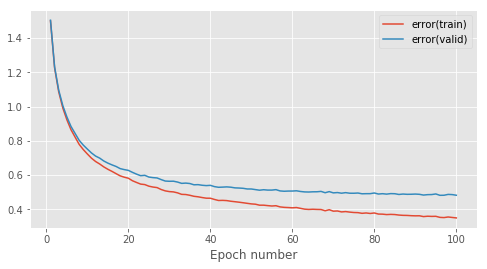

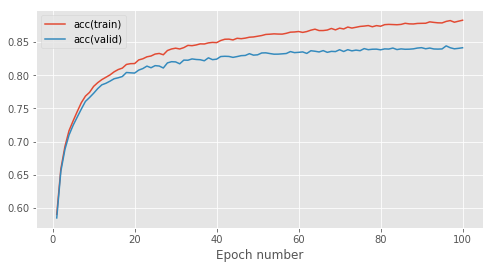

    final error(train) = 3.49e-01
    final error(valid) = 4.82e-01
    final acc(train)   = 8.83e-01
    final acc(valid)   = 8.42e-01
    run time per epoch = 5.38


In [19]:
decay_rates = [
    0.001,
    0.0005,
    0.0001,
    0.00005,
    0.00001,
    5e-6
]

decay_rates = np.asarray(decay_rates)

num_epochs = 100
# decay_rates *= ((batch_size * 1.0 / (train_data.num_batches * num_epochs)) ** 0.5)
# print(decay_rates)


decay_models = OrderedDict()
decay_stats = OrderedDict()
final_train_errors = []
final_valid_errors = []
final_train_accs = []
final_valid_accs = []

for weight_decay in decay_rates:
    layers = [AffineLayer(input_dim, hidden_dim, weights_init, biases_init),
              ReluLayer(),
              AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
              ReluLayer(),
              AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
              ReluLayer(),
              AffineLayer(hidden_dim, output_dim, weights_init, biases_init)]

    model = MultipleLayerModel(layers)
    learning_rule = AdamLearningRuleWithWeightDecay(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-8, weight_decay=weight_decay)

    stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
            model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
    plt.show()
    
    decay_models[weight_decay] = model
    decay_stats[weight_decay] = stats
    final_train_errors.append(stats[-1, 0])
    final_valid_errors.append(stats[-1, 2])
    final_train_accs.append(stats[-1, 1])
    final_valid_accs.append(stats[-1, -1])
    
    print('    final error(train) = {0:.2e}'.format(stats[-1, 0]))
    print('    final error(valid) = {0:.2e}'.format(stats[-1, 2]))
    print('    final acc(train)   = {0:.2e}'.format(stats[-1, 1]))
    print('    final acc(valid)   = {0:.2e}'.format(stats[-1, -1]))
    print('    run time per epoch = {0:.2f}'.format(run_time * 1. / num_epochs))

In [25]:
labels = [
    0.001,
    0.0005,
    0.0001,
    0.00005,
    0.00001,
    5e-6
]

print('|     methods     | final train error| final train acc |final valid error| final valid acc |')
print('|---------------- |------------------|-----------------|------------------|-----------------|')
for i, k in enumerate(labels):
    print('|{0:.7f}           | {1:3f}        |  {2:3f}      |  {3:3f}        |  {4:3f}      | '
          .format(k, 
                  final_train_errors[i], final_train_accs[i] * 100,
                  final_valid_errors[i], final_valid_accs[i] * 100))

|     methods     | final train error| final train acc |final valid error| final valid acc |
|---------------- |------------------|-----------------|------------------|-----------------|
|0.0010000           | 2.368954        |  36.361000      |  2.367785        |  35.791139      | 
|0.0005000           | 1.668218        |  57.585000      |  1.670147        |  57.158228      | 
|0.0001000           | 0.755029        |  78.135000      |  0.765540        |  77.936709      | 
|0.0000500           | 0.585805        |  82.232000      |  0.612896        |  81.272152      | 
|0.0000100           | 0.383633        |  87.321000      |  0.481358        |  84.006329      | 
|0.0000050           | 0.349479        |  88.300000      |  0.481893        |  84.151899      | 


[3.16227766e-05 1.58113883e-05 3.16227766e-06 1.58113883e-06
 3.16227766e-07 1.58113883e-07]


Epoch 1: 3.9s to complete
    error(train)=1.45e+00, acc(train)=6.00e-01, error(valid)=1.45e+00, acc(valid)=5.96e-01


Epoch 2: 3.8s to complete
    error(train)=1.22e+00, acc(train)=6.62e-01, error(valid)=1.22e+00, acc(valid)=6.59e-01


Epoch 3: 3.8s to complete
    error(train)=1.10e+00, acc(train)=6.91e-01, error(valid)=1.10e+00, acc(valid)=6.92e-01


Epoch 4: 3.8s to complete
    error(train)=1.02e+00, acc(train)=7.11e-01, error(valid)=1.03e+00, acc(valid)=7.08e-01


Epoch 5: 3.9s to complete
    error(train)=9.64e-01, acc(train)=7.26e-01, error(valid)=9.71e-01, acc(valid)=7.23e-01


Epoch 6: 3.9s to complete
    error(train)=9.21e-01, acc(train)=7.35e-01, error(valid)=9.29e-01, acc(valid)=7.31e-01


Epoch 7: 4.0s to complete
    error(train)=8.81e-01, acc(train)=7.46e-01, error(valid)=8.91e-01, acc(valid)=7.40e-01


Epoch 8: 4.0s to complete
    error(train)=8.43e-01, acc(train)=7.57e-01, error(valid)=8.54e-01, acc(valid)=7.53e-01


Epoch 9: 4.2s to complete
    error(train)=8.18e-01, acc(train)=7.63e-01, error(valid)=8.31e-01, acc(valid)=7.59e-01


Epoch 10: 4.6s to complete
    error(train)=7.93e-01, acc(train)=7.68e-01, error(valid)=8.07e-01, acc(valid)=7.63e-01


Epoch 11: 4.5s to complete
    error(train)=7.70e-01, acc(train)=7.74e-01, error(valid)=7.84e-01, acc(valid)=7.68e-01


Epoch 12: 4.0s to complete
    error(train)=7.50e-01, acc(train)=7.79e-01, error(valid)=7.66e-01, acc(valid)=7.74e-01


Epoch 13: 4.4s to complete
    error(train)=7.35e-01, acc(train)=7.83e-01, error(valid)=7.55e-01, acc(valid)=7.77e-01


Epoch 14: 4.0s to complete
    error(train)=7.23e-01, acc(train)=7.85e-01, error(valid)=7.41e-01, acc(valid)=7.78e-01


Epoch 15: 4.2s to complete
    error(train)=7.08e-01, acc(train)=7.89e-01, error(valid)=7.27e-01, acc(valid)=7.82e-01


Epoch 16: 3.8s to complete
    error(train)=6.96e-01, acc(train)=7.94e-01, error(valid)=7.15e-01, acc(valid)=7.86e-01


Epoch 17: 3.7s to complete
    error(train)=6.85e-01, acc(train)=7.96e-01, error(valid)=7.06e-01, acc(valid)=7.87e-01


Epoch 18: 4.1s to complete
    error(train)=6.79e-01, acc(train)=7.96e-01, error(valid)=7.02e-01, acc(valid)=7.86e-01


Epoch 19: 3.8s to complete
    error(train)=6.64e-01, acc(train)=8.01e-01, error(valid)=6.86e-01, acc(valid)=7.93e-01


Epoch 20: 3.9s to complete
    error(train)=6.59e-01, acc(train)=8.02e-01, error(valid)=6.82e-01, acc(valid)=7.94e-01


Epoch 21: 3.8s to complete
    error(train)=6.51e-01, acc(train)=8.04e-01, error(valid)=6.75e-01, acc(valid)=7.95e-01


Epoch 22: 3.9s to complete
    error(train)=6.46e-01, acc(train)=8.05e-01, error(valid)=6.71e-01, acc(valid)=7.97e-01


Epoch 23: 3.8s to complete
    error(train)=6.39e-01, acc(train)=8.09e-01, error(valid)=6.65e-01, acc(valid)=7.99e-01


Epoch 24: 3.8s to complete
    error(train)=6.35e-01, acc(train)=8.09e-01, error(valid)=6.62e-01, acc(valid)=8.01e-01


Epoch 25: 3.9s to complete
    error(train)=6.29e-01, acc(train)=8.10e-01, error(valid)=6.57e-01, acc(valid)=7.98e-01


Epoch 26: 3.8s to complete
    error(train)=6.21e-01, acc(train)=8.13e-01, error(valid)=6.47e-01, acc(valid)=8.05e-01


Epoch 27: 4.2s to complete
    error(train)=6.18e-01, acc(train)=8.13e-01, error(valid)=6.46e-01, acc(valid)=8.05e-01


Epoch 28: 4.3s to complete
    error(train)=6.15e-01, acc(train)=8.13e-01, error(valid)=6.42e-01, acc(valid)=8.06e-01


Epoch 29: 3.8s to complete
    error(train)=6.12e-01, acc(train)=8.14e-01, error(valid)=6.38e-01, acc(valid)=8.05e-01


Epoch 30: 3.7s to complete
    error(train)=6.05e-01, acc(train)=8.17e-01, error(valid)=6.33e-01, acc(valid)=8.08e-01


Epoch 31: 4.0s to complete
    error(train)=6.09e-01, acc(train)=8.13e-01, error(valid)=6.37e-01, acc(valid)=8.04e-01


Epoch 32: 4.4s to complete
    error(train)=6.00e-01, acc(train)=8.17e-01, error(valid)=6.29e-01, acc(valid)=8.08e-01


Epoch 33: 4.5s to complete
    error(train)=6.01e-01, acc(train)=8.17e-01, error(valid)=6.30e-01, acc(valid)=8.06e-01


Epoch 34: 4.2s to complete
    error(train)=5.93e-01, acc(train)=8.18e-01, error(valid)=6.22e-01, acc(valid)=8.07e-01


Epoch 35: 4.1s to complete
    error(train)=5.92e-01, acc(train)=8.19e-01, error(valid)=6.23e-01, acc(valid)=8.09e-01


Epoch 36: 3.9s to complete
    error(train)=5.88e-01, acc(train)=8.19e-01, error(valid)=6.19e-01, acc(valid)=8.09e-01


Epoch 37: 4.0s to complete
    error(train)=5.89e-01, acc(train)=8.21e-01, error(valid)=6.20e-01, acc(valid)=8.11e-01


Epoch 38: 4.0s to complete
    error(train)=5.86e-01, acc(train)=8.19e-01, error(valid)=6.17e-01, acc(valid)=8.06e-01


Epoch 39: 3.9s to complete
    error(train)=5.81e-01, acc(train)=8.22e-01, error(valid)=6.12e-01, acc(valid)=8.11e-01


Epoch 40: 3.9s to complete
    error(train)=5.78e-01, acc(train)=8.22e-01, error(valid)=6.09e-01, acc(valid)=8.13e-01


Epoch 41: 3.9s to complete
    error(train)=5.77e-01, acc(train)=8.23e-01, error(valid)=6.09e-01, acc(valid)=8.15e-01


Epoch 42: 4.8s to complete
    error(train)=5.73e-01, acc(train)=8.23e-01, error(valid)=6.06e-01, acc(valid)=8.13e-01


Epoch 43: 4.4s to complete
    error(train)=5.71e-01, acc(train)=8.26e-01, error(valid)=6.03e-01, acc(valid)=8.13e-01


Epoch 44: 3.8s to complete
    error(train)=5.67e-01, acc(train)=8.26e-01, error(valid)=5.99e-01, acc(valid)=8.17e-01


Epoch 45: 3.9s to complete
    error(train)=5.62e-01, acc(train)=8.27e-01, error(valid)=5.95e-01, acc(valid)=8.17e-01


Epoch 46: 3.9s to complete
    error(train)=5.66e-01, acc(train)=8.25e-01, error(valid)=5.99e-01, acc(valid)=8.16e-01


Epoch 47: 4.0s to complete
    error(train)=5.66e-01, acc(train)=8.27e-01, error(valid)=6.00e-01, acc(valid)=8.16e-01


Epoch 48: 4.4s to complete
    error(train)=5.60e-01, acc(train)=8.26e-01, error(valid)=5.93e-01, acc(valid)=8.17e-01


Epoch 49: 3.7s to complete
    error(train)=5.55e-01, acc(train)=8.29e-01, error(valid)=5.89e-01, acc(valid)=8.21e-01


Epoch 50: 3.8s to complete
    error(train)=5.56e-01, acc(train)=8.28e-01, error(valid)=5.90e-01, acc(valid)=8.18e-01


Epoch 51: 3.8s to complete
    error(train)=5.55e-01, acc(train)=8.29e-01, error(valid)=5.91e-01, acc(valid)=8.19e-01


Epoch 52: 3.9s to complete
    error(train)=5.51e-01, acc(train)=8.30e-01, error(valid)=5.85e-01, acc(valid)=8.19e-01


Epoch 53: 3.8s to complete
    error(train)=5.48e-01, acc(train)=8.32e-01, error(valid)=5.82e-01, acc(valid)=8.22e-01


Epoch 54: 3.8s to complete
    error(train)=5.47e-01, acc(train)=8.30e-01, error(valid)=5.82e-01, acc(valid)=8.20e-01


Epoch 55: 4.3s to complete
    error(train)=5.44e-01, acc(train)=8.31e-01, error(valid)=5.79e-01, acc(valid)=8.21e-01


Epoch 56: 4.3s to complete
    error(train)=5.46e-01, acc(train)=8.30e-01, error(valid)=5.82e-01, acc(valid)=8.20e-01


Epoch 57: 4.1s to complete
    error(train)=5.42e-01, acc(train)=8.32e-01, error(valid)=5.76e-01, acc(valid)=8.22e-01


Epoch 58: 4.2s to complete
    error(train)=5.44e-01, acc(train)=8.30e-01, error(valid)=5.81e-01, acc(valid)=8.18e-01


Epoch 59: 4.1s to complete
    error(train)=5.40e-01, acc(train)=8.33e-01, error(valid)=5.78e-01, acc(valid)=8.22e-01


Epoch 60: 5.1s to complete
    error(train)=5.38e-01, acc(train)=8.34e-01, error(valid)=5.73e-01, acc(valid)=8.23e-01


Epoch 61: 3.9s to complete
    error(train)=5.41e-01, acc(train)=8.33e-01, error(valid)=5.79e-01, acc(valid)=8.22e-01


Epoch 62: 3.8s to complete
    error(train)=5.39e-01, acc(train)=8.31e-01, error(valid)=5.74e-01, acc(valid)=8.21e-01


Epoch 63: 3.9s to complete
    error(train)=5.37e-01, acc(train)=8.34e-01, error(valid)=5.72e-01, acc(valid)=8.21e-01


Epoch 64: 4.1s to complete
    error(train)=5.34e-01, acc(train)=8.33e-01, error(valid)=5.72e-01, acc(valid)=8.21e-01


Epoch 65: 3.8s to complete
    error(train)=5.32e-01, acc(train)=8.36e-01, error(valid)=5.69e-01, acc(valid)=8.26e-01


Epoch 66: 3.9s to complete
    error(train)=5.29e-01, acc(train)=8.37e-01, error(valid)=5.66e-01, acc(valid)=8.27e-01


Epoch 67: 3.8s to complete
    error(train)=5.29e-01, acc(train)=8.36e-01, error(valid)=5.65e-01, acc(valid)=8.25e-01


Epoch 68: 3.8s to complete
    error(train)=5.30e-01, acc(train)=8.34e-01, error(valid)=5.68e-01, acc(valid)=8.25e-01


Epoch 69: 3.9s to complete
    error(train)=5.28e-01, acc(train)=8.36e-01, error(valid)=5.65e-01, acc(valid)=8.26e-01


Epoch 70: 4.1s to complete
    error(train)=5.25e-01, acc(train)=8.37e-01, error(valid)=5.63e-01, acc(valid)=8.26e-01


Epoch 71: 3.7s to complete
    error(train)=5.25e-01, acc(train)=8.36e-01, error(valid)=5.60e-01, acc(valid)=8.25e-01


Epoch 72: 3.7s to complete
    error(train)=5.22e-01, acc(train)=8.37e-01, error(valid)=5.59e-01, acc(valid)=8.26e-01


Epoch 73: 4.6s to complete
    error(train)=5.21e-01, acc(train)=8.37e-01, error(valid)=5.59e-01, acc(valid)=8.25e-01


Epoch 74: 3.8s to complete
    error(train)=5.21e-01, acc(train)=8.38e-01, error(valid)=5.60e-01, acc(valid)=8.28e-01


Epoch 75: 3.8s to complete
    error(train)=5.20e-01, acc(train)=8.38e-01, error(valid)=5.58e-01, acc(valid)=8.27e-01


Epoch 76: 3.8s to complete
    error(train)=5.17e-01, acc(train)=8.39e-01, error(valid)=5.55e-01, acc(valid)=8.29e-01


Epoch 77: 4.2s to complete
    error(train)=5.16e-01, acc(train)=8.40e-01, error(valid)=5.55e-01, acc(valid)=8.27e-01


Epoch 78: 4.1s to complete
    error(train)=5.19e-01, acc(train)=8.38e-01, error(valid)=5.58e-01, acc(valid)=8.26e-01


Epoch 79: 4.3s to complete
    error(train)=5.14e-01, acc(train)=8.40e-01, error(valid)=5.52e-01, acc(valid)=8.30e-01


Epoch 80: 3.9s to complete
    error(train)=5.16e-01, acc(train)=8.39e-01, error(valid)=5.54e-01, acc(valid)=8.27e-01


Epoch 81: 3.9s to complete
    error(train)=5.12e-01, acc(train)=8.40e-01, error(valid)=5.50e-01, acc(valid)=8.28e-01


Epoch 82: 4.0s to complete
    error(train)=5.13e-01, acc(train)=8.41e-01, error(valid)=5.50e-01, acc(valid)=8.31e-01


Epoch 83: 3.8s to complete
    error(train)=5.14e-01, acc(train)=8.38e-01, error(valid)=5.54e-01, acc(valid)=8.27e-01


Epoch 84: 4.0s to complete
    error(train)=5.10e-01, acc(train)=8.42e-01, error(valid)=5.51e-01, acc(valid)=8.30e-01


Epoch 85: 3.7s to complete
    error(train)=5.11e-01, acc(train)=8.40e-01, error(valid)=5.51e-01, acc(valid)=8.27e-01


Epoch 86: 3.9s to complete
    error(train)=5.12e-01, acc(train)=8.40e-01, error(valid)=5.53e-01, acc(valid)=8.28e-01


Epoch 87: 3.8s to complete
    error(train)=5.10e-01, acc(train)=8.40e-01, error(valid)=5.50e-01, acc(valid)=8.26e-01


Epoch 88: 4.6s to complete
    error(train)=5.08e-01, acc(train)=8.42e-01, error(valid)=5.47e-01, acc(valid)=8.28e-01


Epoch 89: 3.8s to complete
    error(train)=5.08e-01, acc(train)=8.39e-01, error(valid)=5.47e-01, acc(valid)=8.26e-01


Epoch 90: 3.9s to complete
    error(train)=5.04e-01, acc(train)=8.42e-01, error(valid)=5.44e-01, acc(valid)=8.29e-01


Epoch 91: 3.8s to complete
    error(train)=5.03e-01, acc(train)=8.43e-01, error(valid)=5.44e-01, acc(valid)=8.28e-01


Epoch 92: 3.8s to complete
    error(train)=5.05e-01, acc(train)=8.43e-01, error(valid)=5.46e-01, acc(valid)=8.29e-01


Epoch 93: 3.9s to complete
    error(train)=5.03e-01, acc(train)=8.44e-01, error(valid)=5.43e-01, acc(valid)=8.32e-01


Epoch 94: 3.9s to complete
    error(train)=5.05e-01, acc(train)=8.42e-01, error(valid)=5.46e-01, acc(valid)=8.29e-01


Epoch 95: 3.9s to complete
    error(train)=5.04e-01, acc(train)=8.41e-01, error(valid)=5.45e-01, acc(valid)=8.28e-01


Epoch 96: 3.8s to complete
    error(train)=4.97e-01, acc(train)=8.46e-01, error(valid)=5.37e-01, acc(valid)=8.33e-01


Epoch 97: 4.6s to complete
    error(train)=4.99e-01, acc(train)=8.44e-01, error(valid)=5.40e-01, acc(valid)=8.31e-01


Epoch 98: 3.9s to complete
    error(train)=5.00e-01, acc(train)=8.44e-01, error(valid)=5.42e-01, acc(valid)=8.30e-01


Epoch 99: 3.9s to complete
    error(train)=4.97e-01, acc(train)=8.44e-01, error(valid)=5.38e-01, acc(valid)=8.31e-01


Epoch 100: 4.5s to complete
    error(train)=4.95e-01, acc(train)=8.46e-01, error(valid)=5.36e-01, acc(valid)=8.33e-01


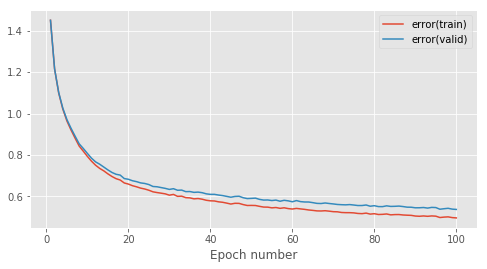

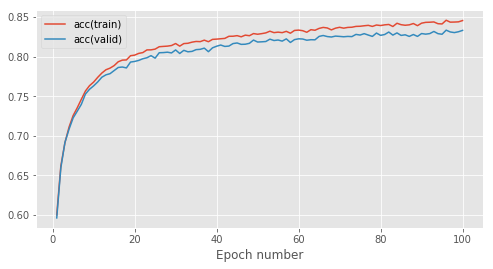

    final error(train) = 4.95e-01
    final error(valid) = 5.36e-01
    final acc(train)   = 8.46e-01
    final acc(valid)   = 8.33e-01
    run time per epoch = 5.26


Epoch 1: 4.3s to complete
    error(train)=1.45e+00, acc(train)=6.01e-01, error(valid)=1.45e+00, acc(valid)=6.00e-01


Epoch 2: 4.9s to complete
    error(train)=1.21e+00, acc(train)=6.62e-01, error(valid)=1.21e+00, acc(valid)=6.60e-01


Epoch 3: 4.5s to complete
    error(train)=1.09e+00, acc(train)=6.92e-01, error(valid)=1.10e+00, acc(valid)=6.87e-01


Epoch 4: 3.9s to complete
    error(train)=1.01e+00, acc(train)=7.11e-01, error(valid)=1.02e+00, acc(valid)=7.06e-01


Epoch 5: 3.9s to complete
    error(train)=9.46e-01, acc(train)=7.29e-01, error(valid)=9.58e-01, acc(valid)=7.24e-01


Epoch 6: 3.8s to complete
    error(train)=8.91e-01, acc(train)=7.43e-01, error(valid)=9.06e-01, acc(valid)=7.36e-01


Epoch 7: 3.7s to complete
    error(train)=8.50e-01, acc(train)=7.51e-01, error(valid)=8.66e-01, acc(valid)=7.43e-01


Epoch 8: 3.8s to complete
    error(train)=8.15e-01, acc(train)=7.61e-01, error(valid)=8.34e-01, acc(valid)=7.54e-01


Epoch 9: 4.0s to complete
    error(train)=7.83e-01, acc(train)=7.69e-01, error(valid)=8.02e-01, acc(valid)=7.62e-01


Epoch 10: 5.1s to complete
    error(train)=7.57e-01, acc(train)=7.77e-01, error(valid)=7.78e-01, acc(valid)=7.73e-01


Epoch 11: 4.1s to complete
    error(train)=7.32e-01, acc(train)=7.83e-01, error(valid)=7.54e-01, acc(valid)=7.77e-01


Epoch 12: 3.9s to complete
    error(train)=7.12e-01, acc(train)=7.87e-01, error(valid)=7.36e-01, acc(valid)=7.80e-01


Epoch 13: 4.1s to complete
    error(train)=6.97e-01, acc(train)=7.91e-01, error(valid)=7.22e-01, acc(valid)=7.81e-01


Epoch 14: 3.9s to complete
    error(train)=6.76e-01, acc(train)=7.98e-01, error(valid)=7.03e-01, acc(valid)=7.87e-01


Epoch 15: 3.9s to complete
    error(train)=6.63e-01, acc(train)=8.00e-01, error(valid)=6.91e-01, acc(valid)=7.91e-01


Epoch 16: 3.8s to complete
    error(train)=6.49e-01, acc(train)=8.04e-01, error(valid)=6.80e-01, acc(valid)=7.95e-01


Epoch 17: 3.8s to complete
    error(train)=6.38e-01, acc(train)=8.06e-01, error(valid)=6.70e-01, acc(valid)=7.93e-01


Epoch 18: 4.7s to complete
    error(train)=6.26e-01, acc(train)=8.09e-01, error(valid)=6.59e-01, acc(valid)=7.98e-01


Epoch 19: 3.8s to complete
    error(train)=6.21e-01, acc(train)=8.09e-01, error(valid)=6.54e-01, acc(valid)=7.98e-01


Epoch 20: 5.1s to complete
    error(train)=6.06e-01, acc(train)=8.14e-01, error(valid)=6.42e-01, acc(valid)=7.99e-01


Epoch 21: 4.7s to complete
    error(train)=5.99e-01, acc(train)=8.17e-01, error(valid)=6.35e-01, acc(valid)=8.04e-01


Epoch 22: 4.2s to complete
    error(train)=5.92e-01, acc(train)=8.17e-01, error(valid)=6.30e-01, acc(valid)=8.03e-01


Epoch 23: 4.1s to complete
    error(train)=5.81e-01, acc(train)=8.21e-01, error(valid)=6.19e-01, acc(valid)=8.08e-01


Epoch 24: 3.8s to complete
    error(train)=5.77e-01, acc(train)=8.23e-01, error(valid)=6.17e-01, acc(valid)=8.12e-01


Epoch 25: 3.8s to complete
    error(train)=5.70e-01, acc(train)=8.24e-01, error(valid)=6.12e-01, acc(valid)=8.08e-01


Epoch 26: 3.9s to complete
    error(train)=5.67e-01, acc(train)=8.24e-01, error(valid)=6.08e-01, acc(valid)=8.10e-01


Epoch 27: 3.7s to complete
    error(train)=5.57e-01, acc(train)=8.26e-01, error(valid)=6.01e-01, acc(valid)=8.13e-01


Epoch 28: 4.0s to complete
    error(train)=5.53e-01, acc(train)=8.28e-01, error(valid)=5.96e-01, acc(valid)=8.16e-01


Epoch 29: 3.8s to complete
    error(train)=5.49e-01, acc(train)=8.30e-01, error(valid)=5.94e-01, acc(valid)=8.14e-01


Epoch 30: 3.9s to complete
    error(train)=5.43e-01, acc(train)=8.31e-01, error(valid)=5.88e-01, acc(valid)=8.15e-01


Epoch 31: 3.9s to complete
    error(train)=5.39e-01, acc(train)=8.31e-01, error(valid)=5.85e-01, acc(valid)=8.15e-01


Epoch 32: 3.8s to complete
    error(train)=5.33e-01, acc(train)=8.32e-01, error(valid)=5.79e-01, acc(valid)=8.16e-01


Epoch 33: 4.4s to complete
    error(train)=5.32e-01, acc(train)=8.34e-01, error(valid)=5.77e-01, acc(valid)=8.21e-01


Epoch 34: 4.3s to complete
    error(train)=5.28e-01, acc(train)=8.34e-01, error(valid)=5.76e-01, acc(valid)=8.19e-01


Epoch 35: 4.6s to complete
    error(train)=5.22e-01, acc(train)=8.37e-01, error(valid)=5.69e-01, acc(valid)=8.21e-01


Epoch 36: 4.1s to complete
    error(train)=5.20e-01, acc(train)=8.36e-01, error(valid)=5.70e-01, acc(valid)=8.22e-01


Epoch 37: 4.0s to complete
    error(train)=5.15e-01, acc(train)=8.38e-01, error(valid)=5.65e-01, acc(valid)=8.20e-01


Epoch 38: 4.0s to complete
    error(train)=5.11e-01, acc(train)=8.40e-01, error(valid)=5.62e-01, acc(valid)=8.22e-01


Epoch 39: 3.8s to complete
    error(train)=5.08e-01, acc(train)=8.40e-01, error(valid)=5.58e-01, acc(valid)=8.23e-01


Epoch 40: 3.7s to complete
    error(train)=5.12e-01, acc(train)=8.37e-01, error(valid)=5.66e-01, acc(valid)=8.21e-01


Epoch 41: 3.8s to complete
    error(train)=5.05e-01, acc(train)=8.42e-01, error(valid)=5.57e-01, acc(valid)=8.25e-01


Epoch 42: 3.9s to complete
    error(train)=5.00e-01, acc(train)=8.42e-01, error(valid)=5.52e-01, acc(valid)=8.23e-01


Epoch 43: 4.4s to complete
    error(train)=5.01e-01, acc(train)=8.42e-01, error(valid)=5.55e-01, acc(valid)=8.24e-01


Epoch 44: 4.5s to complete
    error(train)=5.00e-01, acc(train)=8.41e-01, error(valid)=5.52e-01, acc(valid)=8.23e-01


Epoch 45: 4.2s to complete
    error(train)=4.91e-01, acc(train)=8.44e-01, error(valid)=5.45e-01, acc(valid)=8.26e-01


Epoch 46: 4.7s to complete
    error(train)=4.91e-01, acc(train)=8.44e-01, error(valid)=5.46e-01, acc(valid)=8.28e-01


Epoch 47: 3.8s to complete
    error(train)=4.89e-01, acc(train)=8.45e-01, error(valid)=5.46e-01, acc(valid)=8.27e-01


Epoch 48: 3.8s to complete
    error(train)=4.88e-01, acc(train)=8.46e-01, error(valid)=5.42e-01, acc(valid)=8.28e-01


Epoch 49: 3.8s to complete
    error(train)=4.84e-01, acc(train)=8.47e-01, error(valid)=5.38e-01, acc(valid)=8.31e-01


Epoch 50: 3.9s to complete
    error(train)=4.84e-01, acc(train)=8.46e-01, error(valid)=5.40e-01, acc(valid)=8.30e-01


Epoch 51: 4.0s to complete
    error(train)=4.80e-01, acc(train)=8.46e-01, error(valid)=5.38e-01, acc(valid)=8.28e-01


Epoch 52: 4.0s to complete
    error(train)=4.78e-01, acc(train)=8.49e-01, error(valid)=5.35e-01, acc(valid)=8.30e-01


Epoch 53: 3.9s to complete
    error(train)=4.74e-01, acc(train)=8.51e-01, error(valid)=5.29e-01, acc(valid)=8.32e-01


Epoch 54: 3.8s to complete
    error(train)=4.73e-01, acc(train)=8.50e-01, error(valid)=5.31e-01, acc(valid)=8.30e-01


Epoch 55: 4.3s to complete
    error(train)=4.77e-01, acc(train)=8.47e-01, error(valid)=5.33e-01, acc(valid)=8.31e-01


Epoch 56: 3.8s to complete
    error(train)=4.71e-01, acc(train)=8.50e-01, error(valid)=5.29e-01, acc(valid)=8.35e-01


Epoch 57: 3.9s to complete
    error(train)=4.70e-01, acc(train)=8.51e-01, error(valid)=5.30e-01, acc(valid)=8.31e-01


Epoch 58: 3.9s to complete
    error(train)=4.68e-01, acc(train)=8.50e-01, error(valid)=5.25e-01, acc(valid)=8.32e-01


Epoch 59: 3.9s to complete
    error(train)=4.67e-01, acc(train)=8.50e-01, error(valid)=5.27e-01, acc(valid)=8.33e-01


Epoch 60: 3.7s to complete
    error(train)=4.63e-01, acc(train)=8.52e-01, error(valid)=5.24e-01, acc(valid)=8.34e-01


Epoch 61: 3.9s to complete
    error(train)=4.60e-01, acc(train)=8.53e-01, error(valid)=5.21e-01, acc(valid)=8.33e-01


Epoch 62: 3.8s to complete
    error(train)=4.61e-01, acc(train)=8.51e-01, error(valid)=5.21e-01, acc(valid)=8.34e-01


Epoch 63: 4.2s to complete
    error(train)=4.61e-01, acc(train)=8.53e-01, error(valid)=5.23e-01, acc(valid)=8.32e-01


Epoch 64: 4.1s to complete
    error(train)=4.59e-01, acc(train)=8.54e-01, error(valid)=5.19e-01, acc(valid)=8.34e-01


Epoch 65: 4.1s to complete
    error(train)=4.54e-01, acc(train)=8.54e-01, error(valid)=5.17e-01, acc(valid)=8.35e-01


Epoch 66: 3.9s to complete
    error(train)=4.56e-01, acc(train)=8.54e-01, error(valid)=5.18e-01, acc(valid)=8.33e-01


Epoch 67: 4.1s to complete
    error(train)=4.54e-01, acc(train)=8.55e-01, error(valid)=5.16e-01, acc(valid)=8.35e-01


Epoch 68: 3.8s to complete
    error(train)=4.51e-01, acc(train)=8.55e-01, error(valid)=5.14e-01, acc(valid)=8.36e-01


Epoch 69: 3.8s to complete
    error(train)=4.52e-01, acc(train)=8.55e-01, error(valid)=5.17e-01, acc(valid)=8.34e-01


Epoch 70: 3.8s to complete
    error(train)=4.49e-01, acc(train)=8.56e-01, error(valid)=5.12e-01, acc(valid)=8.37e-01


Epoch 71: 3.9s to complete
    error(train)=4.48e-01, acc(train)=8.56e-01, error(valid)=5.12e-01, acc(valid)=8.35e-01


Epoch 72: 3.8s to complete
    error(train)=4.47e-01, acc(train)=8.56e-01, error(valid)=5.12e-01, acc(valid)=8.37e-01


Epoch 73: 3.9s to complete
    error(train)=4.45e-01, acc(train)=8.57e-01, error(valid)=5.11e-01, acc(valid)=8.37e-01


Epoch 74: 3.9s to complete
    error(train)=4.45e-01, acc(train)=8.58e-01, error(valid)=5.11e-01, acc(valid)=8.37e-01


Epoch 75: 3.8s to complete
    error(train)=4.40e-01, acc(train)=8.58e-01, error(valid)=5.05e-01, acc(valid)=8.37e-01


Epoch 76: 3.9s to complete
    error(train)=4.47e-01, acc(train)=8.56e-01, error(valid)=5.11e-01, acc(valid)=8.36e-01


Epoch 77: 4.0s to complete
    error(train)=4.39e-01, acc(train)=8.59e-01, error(valid)=5.04e-01, acc(valid)=8.38e-01


Epoch 78: 4.4s to complete
    error(train)=4.38e-01, acc(train)=8.59e-01, error(valid)=5.04e-01, acc(valid)=8.38e-01


Epoch 79: 4.4s to complete
    error(train)=4.38e-01, acc(train)=8.60e-01, error(valid)=5.04e-01, acc(valid)=8.38e-01


Epoch 80: 4.1s to complete
    error(train)=4.40e-01, acc(train)=8.58e-01, error(valid)=5.08e-01, acc(valid)=8.38e-01


Epoch 81: 3.8s to complete
    error(train)=4.37e-01, acc(train)=8.60e-01, error(valid)=5.04e-01, acc(valid)=8.38e-01


Epoch 82: 4.2s to complete
    error(train)=4.36e-01, acc(train)=8.59e-01, error(valid)=5.04e-01, acc(valid)=8.36e-01


Epoch 83: 3.9s to complete
    error(train)=4.34e-01, acc(train)=8.60e-01, error(valid)=5.02e-01, acc(valid)=8.39e-01


Epoch 84: 3.9s to complete
    error(train)=4.33e-01, acc(train)=8.60e-01, error(valid)=5.03e-01, acc(valid)=8.37e-01


Epoch 85: 4.0s to complete
    error(train)=4.31e-01, acc(train)=8.61e-01, error(valid)=4.99e-01, acc(valid)=8.39e-01


Epoch 86: 3.9s to complete
    error(train)=4.35e-01, acc(train)=8.57e-01, error(valid)=5.06e-01, acc(valid)=8.36e-01


Epoch 87: 4.9s to complete
    error(train)=4.31e-01, acc(train)=8.60e-01, error(valid)=5.00e-01, acc(valid)=8.38e-01


Epoch 88: 4.6s to complete
    error(train)=4.30e-01, acc(train)=8.62e-01, error(valid)=5.00e-01, acc(valid)=8.39e-01


Epoch 89: 5.2s to complete
    error(train)=4.30e-01, acc(train)=8.61e-01, error(valid)=4.99e-01, acc(valid)=8.39e-01


Epoch 90: 4.1s to complete
    error(train)=4.27e-01, acc(train)=8.63e-01, error(valid)=4.98e-01, acc(valid)=8.39e-01


Epoch 91: 3.9s to complete
    error(train)=4.28e-01, acc(train)=8.62e-01, error(valid)=4.96e-01, acc(valid)=8.40e-01


Epoch 92: 3.9s to complete
    error(train)=4.25e-01, acc(train)=8.63e-01, error(valid)=4.96e-01, acc(valid)=8.41e-01


Epoch 93: 4.0s to complete
    error(train)=4.32e-01, acc(train)=8.60e-01, error(valid)=5.03e-01, acc(valid)=8.36e-01


Epoch 94: 3.9s to complete
    error(train)=4.25e-01, acc(train)=8.63e-01, error(valid)=4.95e-01, acc(valid)=8.39e-01


Epoch 95: 3.9s to complete
    error(train)=4.26e-01, acc(train)=8.62e-01, error(valid)=4.98e-01, acc(valid)=8.38e-01


Epoch 96: 4.1s to complete
    error(train)=4.24e-01, acc(train)=8.62e-01, error(valid)=4.96e-01, acc(valid)=8.39e-01


Epoch 97: 4.0s to complete
    error(train)=4.23e-01, acc(train)=8.62e-01, error(valid)=4.95e-01, acc(valid)=8.39e-01


Epoch 98: 4.0s to complete
    error(train)=4.24e-01, acc(train)=8.63e-01, error(valid)=4.97e-01, acc(valid)=8.39e-01


Epoch 99: 4.0s to complete
    error(train)=4.19e-01, acc(train)=8.64e-01, error(valid)=4.92e-01, acc(valid)=8.40e-01


Epoch 100: 3.8s to complete
    error(train)=4.20e-01, acc(train)=8.65e-01, error(valid)=4.93e-01, acc(valid)=8.41e-01


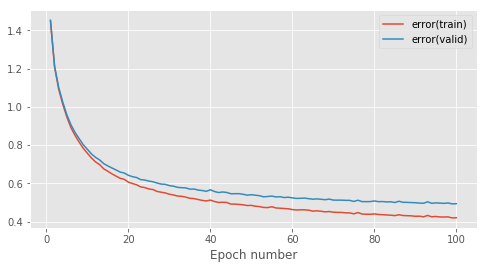

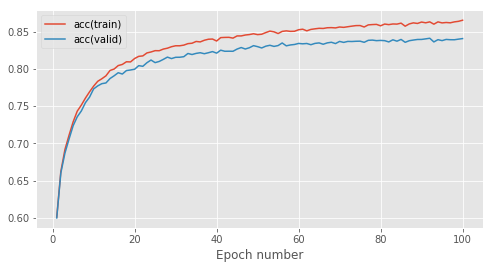

    final error(train) = 4.20e-01
    final error(valid) = 4.93e-01
    final acc(train)   = 8.65e-01
    final acc(valid)   = 8.41e-01
    run time per epoch = 5.32


Epoch 1: 3.9s to complete
    error(train)=1.43e+00, acc(train)=6.07e-01, error(valid)=1.44e+00, acc(valid)=6.05e-01


Epoch 2: 4.0s to complete
    error(train)=1.20e+00, acc(train)=6.63e-01, error(valid)=1.20e+00, acc(valid)=6.58e-01


Epoch 3: 4.0s to complete
    error(train)=1.07e+00, acc(train)=6.95e-01, error(valid)=1.08e+00, acc(valid)=6.90e-01


Epoch 4: 4.4s to complete
    error(train)=9.84e-01, acc(train)=7.18e-01, error(valid)=9.96e-01, acc(valid)=7.12e-01


Epoch 5: 3.9s to complete
    error(train)=9.18e-01, acc(train)=7.33e-01, error(valid)=9.32e-01, acc(valid)=7.29e-01


Epoch 6: 4.0s to complete
    error(train)=8.61e-01, acc(train)=7.49e-01, error(valid)=8.79e-01, acc(valid)=7.42e-01


Epoch 7: 3.9s to complete
    error(train)=8.14e-01, acc(train)=7.60e-01, error(valid)=8.34e-01, acc(valid)=7.53e-01


Epoch 8: 4.1s to complete
    error(train)=7.69e-01, acc(train)=7.72e-01, error(valid)=7.93e-01, acc(valid)=7.67e-01


Epoch 9: 4.6s to complete
    error(train)=7.37e-01, acc(train)=7.80e-01, error(valid)=7.60e-01, acc(valid)=7.75e-01


Epoch 10: 4.7s to complete
    error(train)=7.07e-01, acc(train)=7.88e-01, error(valid)=7.31e-01, acc(valid)=7.81e-01


Epoch 11: 4.7s to complete
    error(train)=6.82e-01, acc(train)=7.93e-01, error(valid)=7.11e-01, acc(valid)=7.85e-01


Epoch 12: 4.3s to complete
    error(train)=6.62e-01, acc(train)=7.97e-01, error(valid)=6.93e-01, acc(valid)=7.90e-01


Epoch 13: 3.8s to complete
    error(train)=6.40e-01, acc(train)=8.04e-01, error(valid)=6.71e-01, acc(valid)=7.95e-01


Epoch 14: 4.0s to complete
    error(train)=6.25e-01, acc(train)=8.08e-01, error(valid)=6.58e-01, acc(valid)=7.97e-01


Epoch 15: 3.8s to complete
    error(train)=6.12e-01, acc(train)=8.11e-01, error(valid)=6.48e-01, acc(valid)=8.01e-01


Epoch 16: 3.9s to complete
    error(train)=5.94e-01, acc(train)=8.16e-01, error(valid)=6.33e-01, acc(valid)=8.04e-01


Epoch 17: 3.9s to complete
    error(train)=5.78e-01, acc(train)=8.21e-01, error(valid)=6.16e-01, acc(valid)=8.10e-01


Epoch 18: 3.9s to complete
    error(train)=5.72e-01, acc(train)=8.21e-01, error(valid)=6.12e-01, acc(valid)=8.10e-01


Epoch 19: 3.9s to complete
    error(train)=5.61e-01, acc(train)=8.25e-01, error(valid)=6.05e-01, acc(valid)=8.12e-01


Epoch 20: 3.8s to complete
    error(train)=5.50e-01, acc(train)=8.27e-01, error(valid)=5.95e-01, acc(valid)=8.14e-01


Epoch 21: 3.9s to complete
    error(train)=5.38e-01, acc(train)=8.31e-01, error(valid)=5.84e-01, acc(valid)=8.17e-01


Epoch 22: 3.8s to complete
    error(train)=5.31e-01, acc(train)=8.33e-01, error(valid)=5.80e-01, acc(valid)=8.18e-01


Epoch 23: 3.8s to complete
    error(train)=5.21e-01, acc(train)=8.35e-01, error(valid)=5.70e-01, acc(valid)=8.21e-01


Epoch 24: 3.7s to complete
    error(train)=5.14e-01, acc(train)=8.37e-01, error(valid)=5.65e-01, acc(valid)=8.20e-01


Epoch 25: 3.8s to complete
    error(train)=5.07e-01, acc(train)=8.37e-01, error(valid)=5.60e-01, acc(valid)=8.20e-01


Epoch 26: 4.2s to complete
    error(train)=5.05e-01, acc(train)=8.39e-01, error(valid)=5.59e-01, acc(valid)=8.20e-01


Epoch 27: 3.8s to complete
    error(train)=4.95e-01, acc(train)=8.41e-01, error(valid)=5.50e-01, acc(valid)=8.24e-01


Epoch 28: 3.9s to complete
    error(train)=4.88e-01, acc(train)=8.42e-01, error(valid)=5.46e-01, acc(valid)=8.22e-01


Epoch 29: 3.9s to complete
    error(train)=4.86e-01, acc(train)=8.44e-01, error(valid)=5.47e-01, acc(valid)=8.23e-01


Epoch 30: 4.0s to complete
    error(train)=4.77e-01, acc(train)=8.46e-01, error(valid)=5.37e-01, acc(valid)=8.28e-01


Epoch 31: 3.8s to complete
    error(train)=4.76e-01, acc(train)=8.45e-01, error(valid)=5.39e-01, acc(valid)=8.24e-01


Epoch 32: 5.1s to complete
    error(train)=4.71e-01, acc(train)=8.46e-01, error(valid)=5.34e-01, acc(valid)=8.26e-01


Epoch 33: 4.3s to complete
    error(train)=4.59e-01, acc(train)=8.51e-01, error(valid)=5.25e-01, acc(valid)=8.31e-01


Epoch 34: 4.5s to complete
    error(train)=4.57e-01, acc(train)=8.52e-01, error(valid)=5.24e-01, acc(valid)=8.32e-01


Epoch 35: 4.7s to complete
    error(train)=4.54e-01, acc(train)=8.53e-01, error(valid)=5.24e-01, acc(valid)=8.30e-01


Epoch 36: 4.0s to complete
    error(train)=4.48e-01, acc(train)=8.53e-01, error(valid)=5.18e-01, acc(valid)=8.32e-01


Epoch 37: 4.0s to complete
    error(train)=4.48e-01, acc(train)=8.53e-01, error(valid)=5.20e-01, acc(valid)=8.28e-01


Epoch 38: 3.9s to complete
    error(train)=4.47e-01, acc(train)=8.54e-01, error(valid)=5.20e-01, acc(valid)=8.31e-01


Epoch 39: 4.0s to complete
    error(train)=4.40e-01, acc(train)=8.57e-01, error(valid)=5.16e-01, acc(valid)=8.33e-01


Epoch 40: 4.0s to complete
    error(train)=4.35e-01, acc(train)=8.57e-01, error(valid)=5.11e-01, acc(valid)=8.34e-01


Epoch 41: 3.9s to complete
    error(train)=4.35e-01, acc(train)=8.57e-01, error(valid)=5.13e-01, acc(valid)=8.33e-01


Epoch 42: 4.0s to complete
    error(train)=4.27e-01, acc(train)=8.61e-01, error(valid)=5.07e-01, acc(valid)=8.35e-01


Epoch 43: 3.8s to complete
    error(train)=4.28e-01, acc(train)=8.59e-01, error(valid)=5.10e-01, acc(valid)=8.35e-01


Epoch 44: 3.8s to complete
    error(train)=4.24e-01, acc(train)=8.60e-01, error(valid)=5.07e-01, acc(valid)=8.36e-01


Epoch 45: 3.9s to complete
    error(train)=4.16e-01, acc(train)=8.63e-01, error(valid)=5.01e-01, acc(valid)=8.37e-01


Epoch 46: 3.8s to complete
    error(train)=4.17e-01, acc(train)=8.62e-01, error(valid)=5.04e-01, acc(valid)=8.36e-01


Epoch 47: 3.8s to complete
    error(train)=4.12e-01, acc(train)=8.65e-01, error(valid)=4.99e-01, acc(valid)=8.37e-01


Epoch 48: 3.9s to complete
    error(train)=4.13e-01, acc(train)=8.63e-01, error(valid)=5.02e-01, acc(valid)=8.37e-01


Epoch 49: 4.1s to complete
    error(train)=4.08e-01, acc(train)=8.65e-01, error(valid)=5.00e-01, acc(valid)=8.36e-01


Epoch 50: 3.9s to complete
    error(train)=4.05e-01, acc(train)=8.66e-01, error(valid)=4.98e-01, acc(valid)=8.36e-01


Epoch 51: 3.9s to complete
    error(train)=4.01e-01, acc(train)=8.68e-01, error(valid)=4.94e-01, acc(valid)=8.41e-01


Epoch 52: 3.8s to complete
    error(train)=4.03e-01, acc(train)=8.66e-01, error(valid)=4.98e-01, acc(valid)=8.38e-01


Epoch 53: 3.8s to complete
    error(train)=3.96e-01, acc(train)=8.70e-01, error(valid)=4.93e-01, acc(valid)=8.40e-01


Epoch 54: 4.6s to complete
    error(train)=3.94e-01, acc(train)=8.69e-01, error(valid)=4.92e-01, acc(valid)=8.40e-01


Epoch 55: 4.0s to complete
    error(train)=3.91e-01, acc(train)=8.71e-01, error(valid)=4.89e-01, acc(valid)=8.41e-01


Epoch 56: 4.8s to complete
    error(train)=3.92e-01, acc(train)=8.69e-01, error(valid)=4.94e-01, acc(valid)=8.40e-01


Epoch 57: 4.3s to complete
    error(train)=3.90e-01, acc(train)=8.69e-01, error(valid)=4.92e-01, acc(valid)=8.41e-01


Epoch 58: 3.9s to complete
    error(train)=3.83e-01, acc(train)=8.72e-01, error(valid)=4.86e-01, acc(valid)=8.42e-01


Epoch 59: 4.2s to complete
    error(train)=3.87e-01, acc(train)=8.71e-01, error(valid)=4.93e-01, acc(valid)=8.40e-01


Epoch 60: 4.1s to complete
    error(train)=3.85e-01, acc(train)=8.71e-01, error(valid)=4.92e-01, acc(valid)=8.39e-01


Epoch 61: 4.1s to complete
    error(train)=3.81e-01, acc(train)=8.72e-01, error(valid)=4.91e-01, acc(valid)=8.40e-01


Epoch 62: 4.0s to complete
    error(train)=3.79e-01, acc(train)=8.73e-01, error(valid)=4.89e-01, acc(valid)=8.41e-01


Epoch 63: 4.1s to complete
    error(train)=3.78e-01, acc(train)=8.72e-01, error(valid)=4.91e-01, acc(valid)=8.40e-01


Epoch 64: 4.2s to complete
    error(train)=3.73e-01, acc(train)=8.76e-01, error(valid)=4.84e-01, acc(valid)=8.43e-01


Epoch 65: 3.9s to complete
    error(train)=3.73e-01, acc(train)=8.75e-01, error(valid)=4.87e-01, acc(valid)=8.40e-01


Epoch 66: 3.9s to complete
    error(train)=3.71e-01, acc(train)=8.76e-01, error(valid)=4.88e-01, acc(valid)=8.41e-01


Epoch 67: 3.8s to complete
    error(train)=3.71e-01, acc(train)=8.75e-01, error(valid)=4.85e-01, acc(valid)=8.42e-01


Epoch 68: 3.9s to complete
    error(train)=3.67e-01, acc(train)=8.76e-01, error(valid)=4.84e-01, acc(valid)=8.41e-01


Epoch 69: 4.0s to complete
    error(train)=3.66e-01, acc(train)=8.77e-01, error(valid)=4.85e-01, acc(valid)=8.42e-01


Epoch 70: 3.9s to complete
    error(train)=3.64e-01, acc(train)=8.78e-01, error(valid)=4.84e-01, acc(valid)=8.42e-01


Epoch 71: 4.0s to complete
    error(train)=3.63e-01, acc(train)=8.76e-01, error(valid)=4.84e-01, acc(valid)=8.42e-01


Epoch 72: 4.3s to complete
    error(train)=3.55e-01, acc(train)=8.81e-01, error(valid)=4.78e-01, acc(valid)=8.45e-01


Epoch 73: 3.9s to complete
    error(train)=3.57e-01, acc(train)=8.80e-01, error(valid)=4.85e-01, acc(valid)=8.41e-01


Epoch 74: 4.1s to complete
    error(train)=3.58e-01, acc(train)=8.79e-01, error(valid)=4.84e-01, acc(valid)=8.43e-01


Epoch 75: 4.0s to complete
    error(train)=3.53e-01, acc(train)=8.81e-01, error(valid)=4.80e-01, acc(valid)=8.46e-01


Epoch 76: 4.0s to complete
    error(train)=3.55e-01, acc(train)=8.80e-01, error(valid)=4.84e-01, acc(valid)=8.40e-01


Epoch 77: 4.1s to complete
    error(train)=3.52e-01, acc(train)=8.82e-01, error(valid)=4.84e-01, acc(valid)=8.44e-01


Epoch 78: 4.4s to complete
    error(train)=3.50e-01, acc(train)=8.82e-01, error(valid)=4.80e-01, acc(valid)=8.40e-01


Epoch 79: 4.2s to complete
    error(train)=3.53e-01, acc(train)=8.80e-01, error(valid)=4.84e-01, acc(valid)=8.41e-01


Epoch 80: 4.1s to complete
    error(train)=3.52e-01, acc(train)=8.79e-01, error(valid)=4.86e-01, acc(valid)=8.39e-01


Epoch 81: 4.2s to complete
    error(train)=3.47e-01, acc(train)=8.82e-01, error(valid)=4.82e-01, acc(valid)=8.43e-01


Epoch 82: 4.0s to complete
    error(train)=3.43e-01, acc(train)=8.85e-01, error(valid)=4.79e-01, acc(valid)=8.46e-01


Epoch 83: 3.9s to complete
    error(train)=3.42e-01, acc(train)=8.84e-01, error(valid)=4.79e-01, acc(valid)=8.45e-01


Epoch 84: 3.7s to complete
    error(train)=3.41e-01, acc(train)=8.85e-01, error(valid)=4.78e-01, acc(valid)=8.44e-01


Epoch 85: 3.9s to complete
    error(train)=3.41e-01, acc(train)=8.84e-01, error(valid)=4.81e-01, acc(valid)=8.44e-01


Epoch 86: 3.8s to complete
    error(train)=3.39e-01, acc(train)=8.84e-01, error(valid)=4.82e-01, acc(valid)=8.44e-01


Epoch 87: 3.8s to complete
    error(train)=3.41e-01, acc(train)=8.83e-01, error(valid)=4.84e-01, acc(valid)=8.42e-01


Epoch 88: 3.7s to complete
    error(train)=3.37e-01, acc(train)=8.85e-01, error(valid)=4.80e-01, acc(valid)=8.43e-01


Epoch 89: 5.1s to complete
    error(train)=3.36e-01, acc(train)=8.85e-01, error(valid)=4.80e-01, acc(valid)=8.44e-01


Epoch 90: 5.2s to complete
    error(train)=3.35e-01, acc(train)=8.85e-01, error(valid)=4.84e-01, acc(valid)=8.40e-01


Epoch 91: 3.9s to complete
    error(train)=3.33e-01, acc(train)=8.87e-01, error(valid)=4.79e-01, acc(valid)=8.44e-01


Epoch 92: 3.8s to complete
    error(train)=3.30e-01, acc(train)=8.89e-01, error(valid)=4.78e-01, acc(valid)=8.44e-01


Epoch 93: 3.9s to complete
    error(train)=3.31e-01, acc(train)=8.88e-01, error(valid)=4.79e-01, acc(valid)=8.44e-01


Epoch 94: 4.0s to complete
    error(train)=3.27e-01, acc(train)=8.89e-01, error(valid)=4.78e-01, acc(valid)=8.45e-01


Epoch 95: 4.3s to complete
    error(train)=3.31e-01, acc(train)=8.87e-01, error(valid)=4.81e-01, acc(valid)=8.43e-01


Epoch 96: 4.4s to complete
    error(train)=3.26e-01, acc(train)=8.88e-01, error(valid)=4.78e-01, acc(valid)=8.44e-01


Epoch 97: 4.2s to complete
    error(train)=3.26e-01, acc(train)=8.88e-01, error(valid)=4.80e-01, acc(valid)=8.43e-01


Epoch 98: 4.2s to complete
    error(train)=3.22e-01, acc(train)=8.90e-01, error(valid)=4.77e-01, acc(valid)=8.46e-01


Epoch 99: 4.5s to complete
    error(train)=3.23e-01, acc(train)=8.89e-01, error(valid)=4.80e-01, acc(valid)=8.43e-01


Epoch 100: 3.8s to complete
    error(train)=3.25e-01, acc(train)=8.89e-01, error(valid)=4.83e-01, acc(valid)=8.42e-01


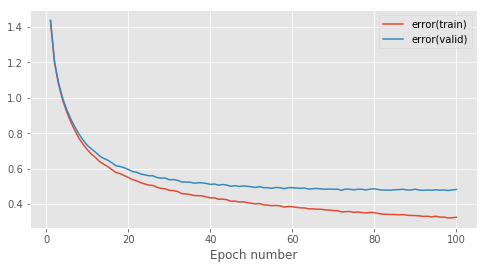

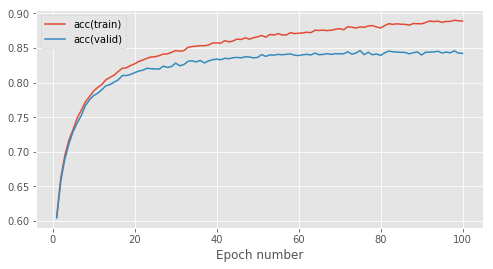

    final error(train) = 3.25e-01
    final error(valid) = 4.83e-01
    final acc(train)   = 8.89e-01
    final acc(valid)   = 8.42e-01
    run time per epoch = 5.34


Epoch 1: 3.8s to complete
    error(train)=1.46e+00, acc(train)=5.97e-01, error(valid)=1.46e+00, acc(valid)=5.94e-01


Epoch 2: 3.7s to complete
    error(train)=1.17e+00, acc(train)=6.70e-01, error(valid)=1.19e+00, acc(valid)=6.60e-01


Epoch 3: 3.7s to complete
    error(train)=1.04e+00, acc(train)=7.05e-01, error(valid)=1.05e+00, acc(valid)=6.99e-01


Epoch 4: 3.9s to complete
    error(train)=9.49e-01, acc(train)=7.26e-01, error(valid)=9.67e-01, acc(valid)=7.17e-01


Epoch 5: 3.9s to complete
    error(train)=8.87e-01, acc(train)=7.40e-01, error(valid)=9.07e-01, acc(valid)=7.32e-01


Epoch 6: 3.9s to complete
    error(train)=8.33e-01, acc(train)=7.54e-01, error(valid)=8.56e-01, acc(valid)=7.46e-01


Epoch 7: 3.8s to complete
    error(train)=7.92e-01, acc(train)=7.65e-01, error(valid)=8.16e-01, acc(valid)=7.59e-01


Epoch 8: 3.8s to complete
    error(train)=7.54e-01, acc(train)=7.75e-01, error(valid)=7.81e-01, acc(valid)=7.66e-01


Epoch 9: 3.9s to complete
    error(train)=7.27e-01, acc(train)=7.82e-01, error(valid)=7.55e-01, acc(valid)=7.73e-01


Epoch 10: 3.9s to complete
    error(train)=7.05e-01, acc(train)=7.87e-01, error(valid)=7.35e-01, acc(valid)=7.77e-01


Epoch 11: 3.9s to complete
    error(train)=6.79e-01, acc(train)=7.94e-01, error(valid)=7.11e-01, acc(valid)=7.82e-01


Epoch 12: 3.9s to complete
    error(train)=6.64e-01, acc(train)=7.98e-01, error(valid)=6.98e-01, acc(valid)=7.87e-01


Epoch 13: 3.9s to complete
    error(train)=6.46e-01, acc(train)=8.02e-01, error(valid)=6.81e-01, acc(valid)=7.89e-01


Epoch 14: 4.1s to complete
    error(train)=6.29e-01, acc(train)=8.06e-01, error(valid)=6.69e-01, acc(valid)=7.91e-01


Epoch 15: 3.9s to complete
    error(train)=6.16e-01, acc(train)=8.09e-01, error(valid)=6.56e-01, acc(valid)=7.98e-01


Epoch 16: 4.0s to complete
    error(train)=6.03e-01, acc(train)=8.14e-01, error(valid)=6.45e-01, acc(valid)=8.00e-01


Epoch 17: 4.0s to complete
    error(train)=5.92e-01, acc(train)=8.16e-01, error(valid)=6.37e-01, acc(valid)=8.02e-01


Epoch 18: 3.9s to complete
    error(train)=5.79e-01, acc(train)=8.18e-01, error(valid)=6.26e-01, acc(valid)=8.03e-01


Epoch 19: 4.1s to complete
    error(train)=5.74e-01, acc(train)=8.19e-01, error(valid)=6.23e-01, acc(valid)=8.05e-01


Epoch 20: 3.9s to complete
    error(train)=5.62e-01, acc(train)=8.24e-01, error(valid)=6.13e-01, acc(valid)=8.08e-01


Epoch 21: 4.0s to complete
    error(train)=5.53e-01, acc(train)=8.27e-01, error(valid)=6.05e-01, acc(valid)=8.09e-01


Epoch 22: 4.9s to complete
    error(train)=5.42e-01, acc(train)=8.29e-01, error(valid)=5.98e-01, acc(valid)=8.11e-01


Epoch 23: 4.5s to complete
    error(train)=5.36e-01, acc(train)=8.31e-01, error(valid)=5.90e-01, acc(valid)=8.14e-01


Epoch 24: 4.2s to complete
    error(train)=5.27e-01, acc(train)=8.32e-01, error(valid)=5.85e-01, acc(valid)=8.16e-01


Epoch 25: 4.2s to complete
    error(train)=5.23e-01, acc(train)=8.34e-01, error(valid)=5.81e-01, acc(valid)=8.18e-01


Epoch 26: 4.1s to complete
    error(train)=5.11e-01, acc(train)=8.37e-01, error(valid)=5.73e-01, acc(valid)=8.17e-01


Epoch 27: 4.0s to complete
    error(train)=5.04e-01, acc(train)=8.40e-01, error(valid)=5.69e-01, acc(valid)=8.20e-01


Epoch 28: 3.9s to complete
    error(train)=5.00e-01, acc(train)=8.41e-01, error(valid)=5.68e-01, acc(valid)=8.20e-01


Epoch 29: 4.0s to complete
    error(train)=4.99e-01, acc(train)=8.38e-01, error(valid)=5.68e-01, acc(valid)=8.17e-01


Epoch 30: 3.9s to complete
    error(train)=4.92e-01, acc(train)=8.42e-01, error(valid)=5.63e-01, acc(valid)=8.19e-01


Epoch 31: 3.9s to complete
    error(train)=4.83e-01, acc(train)=8.45e-01, error(valid)=5.54e-01, acc(valid)=8.24e-01


Epoch 32: 4.2s to complete
    error(train)=4.78e-01, acc(train)=8.45e-01, error(valid)=5.53e-01, acc(valid)=8.22e-01


Epoch 33: 5.1s to complete
    error(train)=4.75e-01, acc(train)=8.45e-01, error(valid)=5.51e-01, acc(valid)=8.22e-01


Epoch 34: 4.0s to complete
    error(train)=4.67e-01, acc(train)=8.50e-01, error(valid)=5.44e-01, acc(valid)=8.25e-01


Epoch 35: 4.0s to complete
    error(train)=4.65e-01, acc(train)=8.50e-01, error(valid)=5.43e-01, acc(valid)=8.26e-01


Epoch 36: 4.0s to complete
    error(train)=4.55e-01, acc(train)=8.53e-01, error(valid)=5.37e-01, acc(valid)=8.26e-01


Epoch 37: 4.1s to complete
    error(train)=4.58e-01, acc(train)=8.51e-01, error(valid)=5.41e-01, acc(valid)=8.26e-01


Epoch 38: 4.7s to complete
    error(train)=4.51e-01, acc(train)=8.53e-01, error(valid)=5.34e-01, acc(valid)=8.28e-01


Epoch 39: 4.6s to complete
    error(train)=4.50e-01, acc(train)=8.53e-01, error(valid)=5.36e-01, acc(valid)=8.26e-01


Epoch 40: 4.2s to complete
    error(train)=4.46e-01, acc(train)=8.55e-01, error(valid)=5.34e-01, acc(valid)=8.25e-01


Epoch 41: 3.9s to complete
    error(train)=4.39e-01, acc(train)=8.57e-01, error(valid)=5.26e-01, acc(valid)=8.30e-01


Epoch 42: 3.9s to complete
    error(train)=4.36e-01, acc(train)=8.57e-01, error(valid)=5.27e-01, acc(valid)=8.29e-01


Epoch 43: 4.1s to complete
    error(train)=4.33e-01, acc(train)=8.58e-01, error(valid)=5.25e-01, acc(valid)=8.27e-01


Epoch 44: 4.8s to complete
    error(train)=4.32e-01, acc(train)=8.57e-01, error(valid)=5.27e-01, acc(valid)=8.29e-01


Epoch 45: 4.0s to complete
    error(train)=4.25e-01, acc(train)=8.61e-01, error(valid)=5.18e-01, acc(valid)=8.32e-01


Epoch 46: 4.1s to complete
    error(train)=4.25e-01, acc(train)=8.61e-01, error(valid)=5.21e-01, acc(valid)=8.30e-01


Epoch 47: 4.2s to complete
    error(train)=4.22e-01, acc(train)=8.61e-01, error(valid)=5.22e-01, acc(valid)=8.30e-01


Epoch 48: 4.8s to complete
    error(train)=4.16e-01, acc(train)=8.63e-01, error(valid)=5.17e-01, acc(valid)=8.32e-01


Epoch 49: 4.4s to complete
    error(train)=4.16e-01, acc(train)=8.61e-01, error(valid)=5.18e-01, acc(valid)=8.33e-01


Epoch 50: 3.8s to complete
    error(train)=4.08e-01, acc(train)=8.66e-01, error(valid)=5.13e-01, acc(valid)=8.32e-01


Epoch 51: 3.9s to complete
    error(train)=4.12e-01, acc(train)=8.64e-01, error(valid)=5.19e-01, acc(valid)=8.31e-01


Epoch 52: 3.8s to complete
    error(train)=4.08e-01, acc(train)=8.64e-01, error(valid)=5.14e-01, acc(valid)=8.32e-01


Epoch 53: 3.9s to complete
    error(train)=4.03e-01, acc(train)=8.67e-01, error(valid)=5.12e-01, acc(valid)=8.34e-01


Epoch 54: 3.9s to complete
    error(train)=4.03e-01, acc(train)=8.66e-01, error(valid)=5.13e-01, acc(valid)=8.32e-01


Epoch 55: 3.8s to complete
    error(train)=3.97e-01, acc(train)=8.68e-01, error(valid)=5.11e-01, acc(valid)=8.32e-01


Epoch 56: 3.9s to complete
    error(train)=4.00e-01, acc(train)=8.67e-01, error(valid)=5.15e-01, acc(valid)=8.31e-01


Epoch 57: 3.9s to complete
    error(train)=3.93e-01, acc(train)=8.69e-01, error(valid)=5.09e-01, acc(valid)=8.34e-01


Epoch 58: 3.7s to complete
    error(train)=3.92e-01, acc(train)=8.69e-01, error(valid)=5.11e-01, acc(valid)=8.35e-01


Epoch 59: 3.8s to complete
    error(train)=3.88e-01, acc(train)=8.71e-01, error(valid)=5.08e-01, acc(valid)=8.34e-01


Epoch 60: 4.1s to complete
    error(train)=3.90e-01, acc(train)=8.70e-01, error(valid)=5.12e-01, acc(valid)=8.34e-01


Epoch 61: 3.9s to complete
    error(train)=3.86e-01, acc(train)=8.70e-01, error(valid)=5.11e-01, acc(valid)=8.35e-01


Epoch 62: 3.8s to complete
    error(train)=3.82e-01, acc(train)=8.72e-01, error(valid)=5.06e-01, acc(valid)=8.34e-01


Epoch 63: 3.8s to complete
    error(train)=3.79e-01, acc(train)=8.73e-01, error(valid)=5.06e-01, acc(valid)=8.36e-01


Epoch 64: 3.9s to complete
    error(train)=3.76e-01, acc(train)=8.74e-01, error(valid)=5.04e-01, acc(valid)=8.35e-01


Epoch 65: 4.0s to complete
    error(train)=3.75e-01, acc(train)=8.75e-01, error(valid)=5.03e-01, acc(valid)=8.36e-01


Epoch 66: 4.6s to complete
    error(train)=3.73e-01, acc(train)=8.74e-01, error(valid)=5.04e-01, acc(valid)=8.38e-01


Epoch 67: 3.9s to complete
    error(train)=3.74e-01, acc(train)=8.74e-01, error(valid)=5.07e-01, acc(valid)=8.36e-01


Epoch 68: 4.0s to complete
    error(train)=3.69e-01, acc(train)=8.76e-01, error(valid)=5.04e-01, acc(valid)=8.36e-01


Epoch 69: 4.0s to complete
    error(train)=3.69e-01, acc(train)=8.76e-01, error(valid)=5.05e-01, acc(valid)=8.35e-01


Epoch 70: 4.4s to complete
    error(train)=3.66e-01, acc(train)=8.77e-01, error(valid)=5.02e-01, acc(valid)=8.35e-01


Epoch 71: 4.1s to complete
    error(train)=3.64e-01, acc(train)=8.77e-01, error(valid)=5.03e-01, acc(valid)=8.37e-01


Epoch 72: 4.9s to complete
    error(train)=3.64e-01, acc(train)=8.77e-01, error(valid)=5.04e-01, acc(valid)=8.36e-01


Epoch 73: 4.5s to complete
    error(train)=3.60e-01, acc(train)=8.78e-01, error(valid)=5.03e-01, acc(valid)=8.35e-01


Epoch 74: 4.9s to complete
    error(train)=3.58e-01, acc(train)=8.79e-01, error(valid)=5.02e-01, acc(valid)=8.37e-01


Epoch 75: 4.4s to complete
    error(train)=3.57e-01, acc(train)=8.80e-01, error(valid)=5.01e-01, acc(valid)=8.37e-01


Epoch 76: 4.5s to complete
    error(train)=3.56e-01, acc(train)=8.80e-01, error(valid)=5.04e-01, acc(valid)=8.38e-01


Epoch 77: 4.5s to complete
    error(train)=3.53e-01, acc(train)=8.80e-01, error(valid)=5.02e-01, acc(valid)=8.37e-01


Epoch 78: 3.8s to complete
    error(train)=3.53e-01, acc(train)=8.81e-01, error(valid)=5.04e-01, acc(valid)=8.37e-01


Epoch 79: 3.8s to complete
    error(train)=3.48e-01, acc(train)=8.83e-01, error(valid)=4.99e-01, acc(valid)=8.37e-01


Epoch 80: 3.9s to complete
    error(train)=3.52e-01, acc(train)=8.80e-01, error(valid)=5.07e-01, acc(valid)=8.35e-01


Epoch 81: 3.9s to complete
    error(train)=3.48e-01, acc(train)=8.82e-01, error(valid)=5.04e-01, acc(valid)=8.38e-01


Epoch 82: 3.9s to complete
    error(train)=3.42e-01, acc(train)=8.85e-01, error(valid)=5.01e-01, acc(valid)=8.37e-01


Epoch 83: 3.9s to complete
    error(train)=3.45e-01, acc(train)=8.84e-01, error(valid)=5.04e-01, acc(valid)=8.36e-01


Epoch 84: 3.9s to complete
    error(train)=3.42e-01, acc(train)=8.84e-01, error(valid)=5.03e-01, acc(valid)=8.36e-01


Epoch 85: 3.9s to complete
    error(train)=3.38e-01, acc(train)=8.85e-01, error(valid)=5.01e-01, acc(valid)=8.38e-01


Epoch 86: 3.9s to complete
    error(train)=3.38e-01, acc(train)=8.85e-01, error(valid)=5.02e-01, acc(valid)=8.38e-01


Epoch 87: 3.8s to complete
    error(train)=3.39e-01, acc(train)=8.84e-01, error(valid)=5.06e-01, acc(valid)=8.36e-01


Epoch 88: 3.9s to complete
    error(train)=3.34e-01, acc(train)=8.87e-01, error(valid)=5.01e-01, acc(valid)=8.36e-01


Epoch 89: 4.5s to complete
    error(train)=3.35e-01, acc(train)=8.86e-01, error(valid)=5.02e-01, acc(valid)=8.37e-01


Epoch 90: 3.8s to complete
    error(train)=3.35e-01, acc(train)=8.86e-01, error(valid)=5.04e-01, acc(valid)=8.38e-01


Epoch 91: 4.7s to complete
    error(train)=3.34e-01, acc(train)=8.86e-01, error(valid)=5.04e-01, acc(valid)=8.36e-01


Epoch 92: 4.1s to complete
    error(train)=3.30e-01, acc(train)=8.88e-01, error(valid)=5.04e-01, acc(valid)=8.39e-01


Epoch 93: 5.2s to complete
    error(train)=3.29e-01, acc(train)=8.87e-01, error(valid)=5.05e-01, acc(valid)=8.38e-01


Epoch 94: 4.7s to complete
    error(train)=3.28e-01, acc(train)=8.87e-01, error(valid)=5.06e-01, acc(valid)=8.37e-01


Epoch 95: 3.9s to complete
    error(train)=3.23e-01, acc(train)=8.90e-01, error(valid)=5.01e-01, acc(valid)=8.40e-01


Epoch 96: 4.0s to complete
    error(train)=3.24e-01, acc(train)=8.89e-01, error(valid)=5.05e-01, acc(valid)=8.38e-01


Epoch 97: 4.1s to complete
    error(train)=3.21e-01, acc(train)=8.90e-01, error(valid)=5.02e-01, acc(valid)=8.39e-01


Epoch 98: 3.9s to complete
    error(train)=3.20e-01, acc(train)=8.90e-01, error(valid)=5.03e-01, acc(valid)=8.37e-01


Epoch 99: 4.0s to complete
    error(train)=3.24e-01, acc(train)=8.88e-01, error(valid)=5.09e-01, acc(valid)=8.36e-01


Epoch 100: 4.0s to complete
    error(train)=3.19e-01, acc(train)=8.92e-01, error(valid)=5.03e-01, acc(valid)=8.39e-01


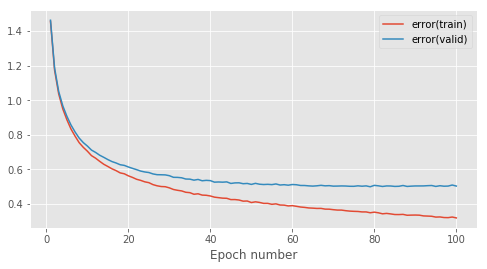

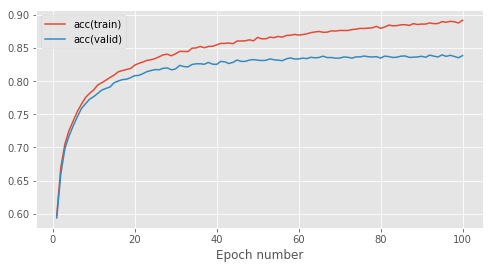

    final error(train) = 3.19e-01
    final error(valid) = 5.03e-01
    final acc(train)   = 8.92e-01
    final acc(valid)   = 8.39e-01
    run time per epoch = 5.36


Epoch 1: 3.8s to complete
    error(train)=1.43e+00, acc(train)=6.03e-01, error(valid)=1.43e+00, acc(valid)=6.02e-01


Epoch 2: 3.8s to complete
    error(train)=1.18e+00, acc(train)=6.65e-01, error(valid)=1.18e+00, acc(valid)=6.61e-01


Epoch 3: 3.9s to complete
    error(train)=1.05e+00, acc(train)=6.98e-01, error(valid)=1.07e+00, acc(valid)=6.94e-01


Epoch 4: 3.9s to complete
    error(train)=9.65e-01, acc(train)=7.22e-01, error(valid)=9.81e-01, acc(valid)=7.16e-01


Epoch 5: 3.9s to complete
    error(train)=9.02e-01, acc(train)=7.37e-01, error(valid)=9.22e-01, acc(valid)=7.31e-01


Epoch 6: 3.8s to complete
    error(train)=8.52e-01, acc(train)=7.50e-01, error(valid)=8.74e-01, acc(valid)=7.45e-01


Epoch 7: 3.8s to complete
    error(train)=8.08e-01, acc(train)=7.60e-01, error(valid)=8.32e-01, acc(valid)=7.54e-01


Epoch 8: 3.7s to complete
    error(train)=7.69e-01, acc(train)=7.72e-01, error(valid)=7.95e-01, acc(valid)=7.63e-01


Epoch 9: 3.8s to complete
    error(train)=7.44e-01, acc(train)=7.77e-01, error(valid)=7.71e-01, acc(valid)=7.70e-01


Epoch 10: 3.8s to complete
    error(train)=7.20e-01, acc(train)=7.83e-01, error(valid)=7.52e-01, acc(valid)=7.74e-01


Epoch 11: 3.8s to complete
    error(train)=6.96e-01, acc(train)=7.86e-01, error(valid)=7.28e-01, acc(valid)=7.77e-01


Epoch 12: 3.9s to complete
    error(train)=6.71e-01, acc(train)=7.95e-01, error(valid)=7.06e-01, acc(valid)=7.86e-01


Epoch 13: 3.7s to complete
    error(train)=6.54e-01, acc(train)=7.98e-01, error(valid)=6.89e-01, acc(valid)=7.89e-01


Epoch 14: 3.8s to complete
    error(train)=6.33e-01, acc(train)=8.05e-01, error(valid)=6.71e-01, acc(valid)=7.96e-01


Epoch 15: 3.7s to complete
    error(train)=6.19e-01, acc(train)=8.09e-01, error(valid)=6.59e-01, acc(valid)=7.99e-01


Epoch 16: 4.1s to complete
    error(train)=6.07e-01, acc(train)=8.11e-01, error(valid)=6.51e-01, acc(valid)=8.00e-01


Epoch 17: 4.7s to complete
    error(train)=6.01e-01, acc(train)=8.12e-01, error(valid)=6.45e-01, acc(valid)=8.00e-01


Epoch 18: 4.1s to complete
    error(train)=5.89e-01, acc(train)=8.17e-01, error(valid)=6.33e-01, acc(valid)=8.05e-01


Epoch 19: 2.3s to complete
    error(train)=5.71e-01, acc(train)=8.21e-01, error(valid)=6.18e-01, acc(valid)=8.08e-01


Epoch 20: 2.0s to complete
    error(train)=5.60e-01, acc(train)=8.23e-01, error(valid)=6.12e-01, acc(valid)=8.10e-01


Epoch 21: 2.2s to complete
    error(train)=5.55e-01, acc(train)=8.24e-01, error(valid)=6.11e-01, acc(valid)=8.08e-01


Epoch 22: 2.1s to complete
    error(train)=5.42e-01, acc(train)=8.28e-01, error(valid)=5.98e-01, acc(valid)=8.14e-01


Epoch 23: 2.2s to complete
    error(train)=5.36e-01, acc(train)=8.30e-01, error(valid)=5.94e-01, acc(valid)=8.14e-01


Epoch 24: 2.2s to complete
    error(train)=5.28e-01, acc(train)=8.32e-01, error(valid)=5.88e-01, acc(valid)=8.15e-01


Epoch 25: 2.1s to complete
    error(train)=5.20e-01, acc(train)=8.34e-01, error(valid)=5.82e-01, acc(valid)=8.17e-01


Epoch 26: 2.1s to complete
    error(train)=5.13e-01, acc(train)=8.35e-01, error(valid)=5.76e-01, acc(valid)=8.19e-01


Epoch 27: 2.1s to complete
    error(train)=5.07e-01, acc(train)=8.36e-01, error(valid)=5.72e-01, acc(valid)=8.18e-01


Epoch 28: 2.1s to complete
    error(train)=5.02e-01, acc(train)=8.39e-01, error(valid)=5.70e-01, acc(valid)=8.17e-01


Epoch 29: 2.0s to complete
    error(train)=4.92e-01, acc(train)=8.41e-01, error(valid)=5.60e-01, acc(valid)=8.23e-01


Epoch 30: 2.0s to complete
    error(train)=4.90e-01, acc(train)=8.42e-01, error(valid)=5.63e-01, acc(valid)=8.22e-01


Epoch 31: 2.1s to complete
    error(train)=4.86e-01, acc(train)=8.42e-01, error(valid)=5.61e-01, acc(valid)=8.24e-01


Epoch 32: 2.1s to complete
    error(train)=4.82e-01, acc(train)=8.44e-01, error(valid)=5.59e-01, acc(valid)=8.21e-01


Epoch 33: 2.1s to complete
    error(train)=4.70e-01, acc(train)=8.47e-01, error(valid)=5.49e-01, acc(valid)=8.25e-01


Epoch 34: 2.2s to complete
    error(train)=4.69e-01, acc(train)=8.48e-01, error(valid)=5.49e-01, acc(valid)=8.24e-01


Epoch 35: 2.1s to complete
    error(train)=4.60e-01, acc(train)=8.51e-01, error(valid)=5.43e-01, acc(valid)=8.26e-01


Epoch 36: 2.1s to complete
    error(train)=4.56e-01, acc(train)=8.51e-01, error(valid)=5.39e-01, acc(valid)=8.27e-01


Epoch 37: 2.1s to complete
    error(train)=4.56e-01, acc(train)=8.51e-01, error(valid)=5.42e-01, acc(valid)=8.26e-01


Epoch 38: 2.0s to complete
    error(train)=4.49e-01, acc(train)=8.53e-01, error(valid)=5.37e-01, acc(valid)=8.29e-01


Epoch 39: 2.0s to complete
    error(train)=4.42e-01, acc(train)=8.55e-01, error(valid)=5.32e-01, acc(valid)=8.29e-01


Epoch 40: 2.1s to complete
    error(train)=4.45e-01, acc(train)=8.52e-01, error(valid)=5.35e-01, acc(valid)=8.27e-01


Epoch 41: 2.0s to complete
    error(train)=4.35e-01, acc(train)=8.57e-01, error(valid)=5.29e-01, acc(valid)=8.30e-01


Epoch 42: 2.0s to complete
    error(train)=4.30e-01, acc(train)=8.59e-01, error(valid)=5.26e-01, acc(valid)=8.28e-01


Epoch 43: 2.0s to complete
    error(train)=4.29e-01, acc(train)=8.58e-01, error(valid)=5.26e-01, acc(valid)=8.30e-01


Epoch 44: 2.0s to complete
    error(train)=4.27e-01, acc(train)=8.59e-01, error(valid)=5.26e-01, acc(valid)=8.31e-01


Epoch 45: 2.1s to complete
    error(train)=4.24e-01, acc(train)=8.60e-01, error(valid)=5.26e-01, acc(valid)=8.28e-01


Epoch 46: 2.2s to complete
    error(train)=4.19e-01, acc(train)=8.62e-01, error(valid)=5.23e-01, acc(valid)=8.31e-01


Epoch 47: 2.2s to complete
    error(train)=4.16e-01, acc(train)=8.63e-01, error(valid)=5.19e-01, acc(valid)=8.33e-01


Epoch 48: 2.2s to complete
    error(train)=4.15e-01, acc(train)=8.61e-01, error(valid)=5.21e-01, acc(valid)=8.30e-01


Epoch 49: 2.0s to complete
    error(train)=4.10e-01, acc(train)=8.64e-01, error(valid)=5.19e-01, acc(valid)=8.31e-01


Epoch 50: 2.0s to complete
    error(train)=4.08e-01, acc(train)=8.64e-01, error(valid)=5.19e-01, acc(valid)=8.32e-01


Epoch 51: 2.2s to complete
    error(train)=4.05e-01, acc(train)=8.66e-01, error(valid)=5.17e-01, acc(valid)=8.34e-01


Epoch 52: 2.0s to complete
    error(train)=4.02e-01, acc(train)=8.65e-01, error(valid)=5.16e-01, acc(valid)=8.31e-01


Epoch 53: 2.3s to complete
    error(train)=3.96e-01, acc(train)=8.68e-01, error(valid)=5.13e-01, acc(valid)=8.35e-01


Epoch 54: 2.1s to complete
    error(train)=3.94e-01, acc(train)=8.68e-01, error(valid)=5.11e-01, acc(valid)=8.35e-01


Epoch 55: 2.1s to complete
    error(train)=3.95e-01, acc(train)=8.68e-01, error(valid)=5.17e-01, acc(valid)=8.33e-01


Epoch 56: 2.1s to complete
    error(train)=3.93e-01, acc(train)=8.68e-01, error(valid)=5.17e-01, acc(valid)=8.29e-01


Epoch 57: 2.3s to complete
    error(train)=3.91e-01, acc(train)=8.70e-01, error(valid)=5.14e-01, acc(valid)=8.34e-01


Epoch 58: 2.1s to complete
    error(train)=3.90e-01, acc(train)=8.70e-01, error(valid)=5.13e-01, acc(valid)=8.35e-01


Epoch 59: 2.0s to complete
    error(train)=3.89e-01, acc(train)=8.68e-01, error(valid)=5.16e-01, acc(valid)=8.32e-01


Epoch 60: 2.1s to complete
    error(train)=3.82e-01, acc(train)=8.72e-01, error(valid)=5.11e-01, acc(valid)=8.36e-01


Epoch 61: 2.2s to complete
    error(train)=3.77e-01, acc(train)=8.73e-01, error(valid)=5.08e-01, acc(valid)=8.36e-01


Epoch 62: 2.0s to complete
    error(train)=3.79e-01, acc(train)=8.71e-01, error(valid)=5.11e-01, acc(valid)=8.32e-01


Epoch 63: 2.4s to complete
    error(train)=3.75e-01, acc(train)=8.74e-01, error(valid)=5.11e-01, acc(valid)=8.34e-01


Epoch 64: 2.1s to complete
    error(train)=3.78e-01, acc(train)=8.73e-01, error(valid)=5.13e-01, acc(valid)=8.37e-01


Epoch 65: 2.2s to complete
    error(train)=3.70e-01, acc(train)=8.75e-01, error(valid)=5.08e-01, acc(valid)=8.35e-01


Epoch 66: 2.1s to complete
    error(train)=3.66e-01, acc(train)=8.76e-01, error(valid)=5.06e-01, acc(valid)=8.38e-01


Epoch 67: 2.1s to complete
    error(train)=3.68e-01, acc(train)=8.75e-01, error(valid)=5.12e-01, acc(valid)=8.35e-01


Epoch 68: 2.2s to complete
    error(train)=3.61e-01, acc(train)=8.77e-01, error(valid)=5.07e-01, acc(valid)=8.36e-01


Epoch 69: 2.3s to complete
    error(train)=3.67e-01, acc(train)=8.75e-01, error(valid)=5.11e-01, acc(valid)=8.36e-01


Epoch 70: 2.1s to complete
    error(train)=3.56e-01, acc(train)=8.78e-01, error(valid)=5.05e-01, acc(valid)=8.38e-01


Epoch 71: 2.0s to complete
    error(train)=3.57e-01, acc(train)=8.79e-01, error(valid)=5.06e-01, acc(valid)=8.36e-01


Epoch 72: 2.1s to complete
    error(train)=3.53e-01, acc(train)=8.80e-01, error(valid)=5.04e-01, acc(valid)=8.37e-01


Epoch 73: 2.1s to complete
    error(train)=3.53e-01, acc(train)=8.78e-01, error(valid)=5.04e-01, acc(valid)=8.39e-01


Epoch 74: 2.2s to complete
    error(train)=3.49e-01, acc(train)=8.82e-01, error(valid)=5.02e-01, acc(valid)=8.37e-01


Epoch 75: 2.3s to complete
    error(train)=3.51e-01, acc(train)=8.81e-01, error(valid)=5.07e-01, acc(valid)=8.35e-01


Epoch 76: 2.2s to complete
    error(train)=3.48e-01, acc(train)=8.81e-01, error(valid)=5.09e-01, acc(valid)=8.35e-01


Epoch 77: 2.1s to complete
    error(train)=3.45e-01, acc(train)=8.82e-01, error(valid)=5.03e-01, acc(valid)=8.38e-01


Epoch 78: 2.0s to complete
    error(train)=3.45e-01, acc(train)=8.82e-01, error(valid)=5.06e-01, acc(valid)=8.36e-01


Epoch 79: 2.1s to complete
    error(train)=3.42e-01, acc(train)=8.83e-01, error(valid)=5.05e-01, acc(valid)=8.38e-01


Epoch 80: 2.0s to complete
    error(train)=3.42e-01, acc(train)=8.83e-01, error(valid)=5.07e-01, acc(valid)=8.39e-01


Epoch 81: 2.1s to complete
    error(train)=3.39e-01, acc(train)=8.85e-01, error(valid)=5.04e-01, acc(valid)=8.39e-01


Epoch 82: 2.1s to complete
    error(train)=3.43e-01, acc(train)=8.82e-01, error(valid)=5.13e-01, acc(valid)=8.35e-01


Epoch 83: 2.1s to complete
    error(train)=3.34e-01, acc(train)=8.86e-01, error(valid)=5.03e-01, acc(valid)=8.39e-01


Epoch 84: 2.1s to complete
    error(train)=3.41e-01, acc(train)=8.82e-01, error(valid)=5.14e-01, acc(valid)=8.36e-01


Epoch 85: 2.2s to complete
    error(train)=3.31e-01, acc(train)=8.87e-01, error(valid)=5.03e-01, acc(valid)=8.39e-01


Epoch 86: 2.2s to complete
    error(train)=3.30e-01, acc(train)=8.87e-01, error(valid)=5.06e-01, acc(valid)=8.39e-01


Epoch 87: 2.1s to complete
    error(train)=3.28e-01, acc(train)=8.87e-01, error(valid)=5.06e-01, acc(valid)=8.41e-01


Epoch 88: 2.1s to complete
    error(train)=3.24e-01, acc(train)=8.88e-01, error(valid)=5.03e-01, acc(valid)=8.38e-01


Epoch 89: 2.0s to complete
    error(train)=3.30e-01, acc(train)=8.85e-01, error(valid)=5.12e-01, acc(valid)=8.36e-01


Epoch 90: 2.1s to complete
    error(train)=3.21e-01, acc(train)=8.89e-01, error(valid)=5.03e-01, acc(valid)=8.39e-01


Epoch 91: 2.1s to complete
    error(train)=3.21e-01, acc(train)=8.89e-01, error(valid)=5.04e-01, acc(valid)=8.40e-01


Epoch 92: 2.0s to complete
    error(train)=3.21e-01, acc(train)=8.89e-01, error(valid)=5.07e-01, acc(valid)=8.39e-01


Epoch 93: 2.1s to complete
    error(train)=3.24e-01, acc(train)=8.87e-01, error(valid)=5.12e-01, acc(valid)=8.39e-01


Epoch 94: 2.1s to complete
    error(train)=3.18e-01, acc(train)=8.89e-01, error(valid)=5.09e-01, acc(valid)=8.38e-01


Epoch 95: 2.0s to complete
    error(train)=3.19e-01, acc(train)=8.89e-01, error(valid)=5.09e-01, acc(valid)=8.37e-01


Epoch 96: 2.2s to complete
    error(train)=3.14e-01, acc(train)=8.91e-01, error(valid)=5.08e-01, acc(valid)=8.39e-01


Epoch 97: 2.1s to complete
    error(train)=3.11e-01, acc(train)=8.92e-01, error(valid)=5.07e-01, acc(valid)=8.39e-01


Epoch 98: 2.2s to complete
    error(train)=3.13e-01, acc(train)=8.91e-01, error(valid)=5.12e-01, acc(valid)=8.38e-01


Epoch 99: 2.3s to complete
    error(train)=3.11e-01, acc(train)=8.92e-01, error(valid)=5.07e-01, acc(valid)=8.41e-01


Epoch 100: 2.1s to complete
    error(train)=3.08e-01, acc(train)=8.94e-01, error(valid)=5.09e-01, acc(valid)=8.39e-01


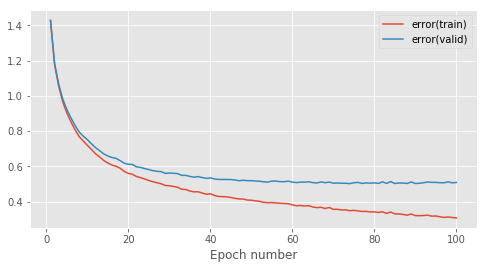

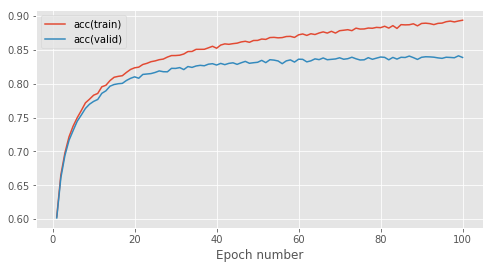

    final error(train) = 3.08e-01
    final error(valid) = 5.09e-01
    final acc(train)   = 8.94e-01
    final acc(valid)   = 8.39e-01
    run time per epoch = 3.26


Epoch 1: 2.1s to complete
    error(train)=1.44e+00, acc(train)=6.00e-01, error(valid)=1.44e+00, acc(valid)=5.99e-01


Epoch 2: 2.1s to complete
    error(train)=1.18e+00, acc(train)=6.66e-01, error(valid)=1.19e+00, acc(valid)=6.62e-01


Epoch 3: 2.0s to complete
    error(train)=1.06e+00, acc(train)=6.99e-01, error(valid)=1.07e+00, acc(valid)=6.95e-01


Epoch 4: 2.2s to complete
    error(train)=9.70e-01, acc(train)=7.20e-01, error(valid)=9.85e-01, acc(valid)=7.15e-01


Epoch 5: 2.1s to complete
    error(train)=8.98e-01, acc(train)=7.38e-01, error(valid)=9.16e-01, acc(valid)=7.35e-01


Epoch 6: 2.4s to complete
    error(train)=8.45e-01, acc(train)=7.51e-01, error(valid)=8.65e-01, acc(valid)=7.47e-01


Epoch 7: 2.1s to complete
    error(train)=8.02e-01, acc(train)=7.60e-01, error(valid)=8.25e-01, acc(valid)=7.56e-01


Epoch 8: 2.0s to complete
    error(train)=7.60e-01, acc(train)=7.71e-01, error(valid)=7.84e-01, acc(valid)=7.65e-01


Epoch 9: 2.2s to complete
    error(train)=7.27e-01, acc(train)=7.81e-01, error(valid)=7.55e-01, acc(valid)=7.73e-01


Epoch 10: 2.1s to complete
    error(train)=7.04e-01, acc(train)=7.86e-01, error(valid)=7.34e-01, acc(valid)=7.77e-01


Epoch 11: 2.0s to complete
    error(train)=6.82e-01, acc(train)=7.92e-01, error(valid)=7.16e-01, acc(valid)=7.81e-01


Epoch 12: 2.0s to complete
    error(train)=6.60e-01, acc(train)=7.99e-01, error(valid)=6.95e-01, acc(valid)=7.90e-01


Epoch 13: 2.3s to complete
    error(train)=6.43e-01, acc(train)=8.03e-01, error(valid)=6.80e-01, acc(valid)=7.94e-01


Epoch 14: 2.0s to complete
    error(train)=6.28e-01, acc(train)=8.07e-01, error(valid)=6.66e-01, acc(valid)=7.96e-01


Epoch 15: 2.0s to complete
    error(train)=6.14e-01, acc(train)=8.12e-01, error(valid)=6.55e-01, acc(valid)=7.99e-01


Epoch 16: 2.0s to complete
    error(train)=5.97e-01, acc(train)=8.16e-01, error(valid)=6.39e-01, acc(valid)=8.04e-01


Epoch 17: 2.0s to complete
    error(train)=5.84e-01, acc(train)=8.20e-01, error(valid)=6.30e-01, acc(valid)=8.06e-01


Epoch 18: 2.2s to complete
    error(train)=5.75e-01, acc(train)=8.21e-01, error(valid)=6.23e-01, acc(valid)=8.04e-01


Epoch 19: 2.1s to complete
    error(train)=5.67e-01, acc(train)=8.23e-01, error(valid)=6.15e-01, acc(valid)=8.07e-01


Epoch 20: 2.1s to complete
    error(train)=5.55e-01, acc(train)=8.26e-01, error(valid)=6.07e-01, acc(valid)=8.10e-01


Epoch 21: 2.1s to complete
    error(train)=5.52e-01, acc(train)=8.26e-01, error(valid)=6.06e-01, acc(valid)=8.07e-01


Epoch 22: 2.3s to complete
    error(train)=5.38e-01, acc(train)=8.30e-01, error(valid)=5.94e-01, acc(valid)=8.10e-01


Epoch 23: 2.1s to complete
    error(train)=5.30e-01, acc(train)=8.33e-01, error(valid)=5.88e-01, acc(valid)=8.14e-01


Epoch 24: 2.9s to complete
    error(train)=5.23e-01, acc(train)=8.35e-01, error(valid)=5.81e-01, acc(valid)=8.15e-01


Epoch 25: 3.9s to complete
    error(train)=5.15e-01, acc(train)=8.36e-01, error(valid)=5.76e-01, acc(valid)=8.15e-01


Epoch 26: 3.8s to complete
    error(train)=5.09e-01, acc(train)=8.36e-01, error(valid)=5.73e-01, acc(valid)=8.16e-01


Epoch 27: 3.7s to complete
    error(train)=5.01e-01, acc(train)=8.39e-01, error(valid)=5.67e-01, acc(valid)=8.17e-01


Epoch 28: 4.0s to complete
    error(train)=4.96e-01, acc(train)=8.41e-01, error(valid)=5.65e-01, acc(valid)=8.20e-01


Epoch 29: 3.8s to complete
    error(train)=4.87e-01, acc(train)=8.44e-01, error(valid)=5.57e-01, acc(valid)=8.20e-01


Epoch 30: 3.8s to complete
    error(train)=4.88e-01, acc(train)=8.43e-01, error(valid)=5.61e-01, acc(valid)=8.19e-01


Epoch 31: 4.0s to complete
    error(train)=4.76e-01, acc(train)=8.47e-01, error(valid)=5.51e-01, acc(valid)=8.23e-01


Epoch 32: 3.8s to complete
    error(train)=4.80e-01, acc(train)=8.45e-01, error(valid)=5.58e-01, acc(valid)=8.21e-01


Epoch 33: 3.8s to complete
    error(train)=4.71e-01, acc(train)=8.47e-01, error(valid)=5.50e-01, acc(valid)=8.22e-01


Epoch 34: 3.8s to complete
    error(train)=4.69e-01, acc(train)=8.46e-01, error(valid)=5.51e-01, acc(valid)=8.23e-01


Epoch 35: 3.7s to complete
    error(train)=4.57e-01, acc(train)=8.51e-01, error(valid)=5.41e-01, acc(valid)=8.24e-01


Epoch 36: 4.5s to complete
    error(train)=4.58e-01, acc(train)=8.50e-01, error(valid)=5.43e-01, acc(valid)=8.26e-01


Epoch 37: 4.2s to complete
    error(train)=4.52e-01, acc(train)=8.52e-01, error(valid)=5.39e-01, acc(valid)=8.27e-01


Epoch 38: 4.6s to complete
    error(train)=4.51e-01, acc(train)=8.52e-01, error(valid)=5.39e-01, acc(valid)=8.24e-01


Epoch 39: 4.2s to complete
    error(train)=4.44e-01, acc(train)=8.52e-01, error(valid)=5.34e-01, acc(valid)=8.25e-01


Epoch 40: 4.1s to complete
    error(train)=4.35e-01, acc(train)=8.57e-01, error(valid)=5.29e-01, acc(valid)=8.30e-01


Epoch 41: 3.9s to complete
    error(train)=4.34e-01, acc(train)=8.57e-01, error(valid)=5.29e-01, acc(valid)=8.30e-01


Epoch 42: 4.0s to complete
    error(train)=4.32e-01, acc(train)=8.58e-01, error(valid)=5.32e-01, acc(valid)=8.29e-01


Epoch 43: 4.0s to complete
    error(train)=4.29e-01, acc(train)=8.58e-01, error(valid)=5.28e-01, acc(valid)=8.31e-01


Epoch 44: 3.9s to complete
    error(train)=4.26e-01, acc(train)=8.59e-01, error(valid)=5.27e-01, acc(valid)=8.28e-01


Epoch 45: 3.9s to complete
    error(train)=4.18e-01, acc(train)=8.62e-01, error(valid)=5.20e-01, acc(valid)=8.32e-01


Epoch 46: 3.9s to complete
    error(train)=4.18e-01, acc(train)=8.62e-01, error(valid)=5.24e-01, acc(valid)=8.33e-01


Epoch 47: 3.9s to complete
    error(train)=4.15e-01, acc(train)=8.62e-01, error(valid)=5.22e-01, acc(valid)=8.31e-01


Epoch 48: 4.0s to complete
    error(train)=4.14e-01, acc(train)=8.63e-01, error(valid)=5.22e-01, acc(valid)=8.32e-01


Epoch 49: 4.0s to complete
    error(train)=4.06e-01, acc(train)=8.65e-01, error(valid)=5.18e-01, acc(valid)=8.32e-01


Epoch 50: 3.8s to complete
    error(train)=4.05e-01, acc(train)=8.65e-01, error(valid)=5.20e-01, acc(valid)=8.30e-01


Epoch 51: 3.9s to complete
    error(train)=4.00e-01, acc(train)=8.67e-01, error(valid)=5.16e-01, acc(valid)=8.32e-01


Epoch 52: 3.9s to complete
    error(train)=3.98e-01, acc(train)=8.68e-01, error(valid)=5.17e-01, acc(valid)=8.32e-01


Epoch 53: 4.0s to complete
    error(train)=3.95e-01, acc(train)=8.67e-01, error(valid)=5.14e-01, acc(valid)=8.30e-01


Epoch 54: 4.4s to complete
    error(train)=3.95e-01, acc(train)=8.69e-01, error(valid)=5.16e-01, acc(valid)=8.32e-01


Epoch 55: 4.3s to complete
    error(train)=3.93e-01, acc(train)=8.68e-01, error(valid)=5.17e-01, acc(valid)=8.32e-01


Epoch 56: 3.8s to complete
    error(train)=3.94e-01, acc(train)=8.66e-01, error(valid)=5.18e-01, acc(valid)=8.31e-01


Epoch 57: 3.8s to complete
    error(train)=3.88e-01, acc(train)=8.70e-01, error(valid)=5.16e-01, acc(valid)=8.31e-01


Epoch 58: 3.8s to complete
    error(train)=3.84e-01, acc(train)=8.71e-01, error(valid)=5.16e-01, acc(valid)=8.30e-01


Epoch 59: 3.7s to complete
    error(train)=3.82e-01, acc(train)=8.71e-01, error(valid)=5.16e-01, acc(valid)=8.31e-01


Epoch 60: 3.8s to complete
    error(train)=3.80e-01, acc(train)=8.72e-01, error(valid)=5.14e-01, acc(valid)=8.33e-01


Epoch 61: 4.0s to complete
    error(train)=3.75e-01, acc(train)=8.74e-01, error(valid)=5.12e-01, acc(valid)=8.35e-01


Epoch 62: 4.2s to complete
    error(train)=3.77e-01, acc(train)=8.72e-01, error(valid)=5.15e-01, acc(valid)=8.34e-01


Epoch 63: 3.9s to complete
    error(train)=3.73e-01, acc(train)=8.74e-01, error(valid)=5.14e-01, acc(valid)=8.32e-01


Epoch 64: 3.8s to complete
    error(train)=3.72e-01, acc(train)=8.74e-01, error(valid)=5.17e-01, acc(valid)=8.31e-01


Epoch 65: 3.8s to complete
    error(train)=3.68e-01, acc(train)=8.76e-01, error(valid)=5.15e-01, acc(valid)=8.34e-01


Epoch 66: 3.9s to complete
    error(train)=3.63e-01, acc(train)=8.78e-01, error(valid)=5.10e-01, acc(valid)=8.35e-01


Epoch 67: 3.7s to complete
    error(train)=3.67e-01, acc(train)=8.76e-01, error(valid)=5.15e-01, acc(valid)=8.31e-01


Epoch 68: 4.4s to complete
    error(train)=3.65e-01, acc(train)=8.76e-01, error(valid)=5.17e-01, acc(valid)=8.33e-01


Epoch 69: 4.0s to complete
    error(train)=3.61e-01, acc(train)=8.78e-01, error(valid)=5.15e-01, acc(valid)=8.33e-01


Epoch 70: 3.8s to complete
    error(train)=3.60e-01, acc(train)=8.77e-01, error(valid)=5.17e-01, acc(valid)=8.32e-01


Epoch 71: 3.8s to complete
    error(train)=3.57e-01, acc(train)=8.80e-01, error(valid)=5.13e-01, acc(valid)=8.35e-01


Epoch 72: 5.7s to complete
    error(train)=3.53e-01, acc(train)=8.81e-01, error(valid)=5.12e-01, acc(valid)=8.36e-01


Epoch 73: 4.7s to complete
    error(train)=3.51e-01, acc(train)=8.81e-01, error(valid)=5.11e-01, acc(valid)=8.36e-01


Epoch 74: 4.2s to complete
    error(train)=3.52e-01, acc(train)=8.80e-01, error(valid)=5.15e-01, acc(valid)=8.34e-01


Epoch 75: 3.8s to complete
    error(train)=3.49e-01, acc(train)=8.82e-01, error(valid)=5.16e-01, acc(valid)=8.35e-01


Epoch 76: 3.9s to complete
    error(train)=3.46e-01, acc(train)=8.84e-01, error(valid)=5.15e-01, acc(valid)=8.36e-01


Epoch 77: 3.9s to complete
    error(train)=3.46e-01, acc(train)=8.81e-01, error(valid)=5.16e-01, acc(valid)=8.32e-01


Epoch 78: 4.2s to complete
    error(train)=3.42e-01, acc(train)=8.84e-01, error(valid)=5.15e-01, acc(valid)=8.34e-01


Epoch 79: 4.2s to complete
    error(train)=3.43e-01, acc(train)=8.83e-01, error(valid)=5.15e-01, acc(valid)=8.35e-01


Epoch 80: 3.9s to complete
    error(train)=3.44e-01, acc(train)=8.82e-01, error(valid)=5.17e-01, acc(valid)=8.33e-01


Epoch 81: 3.9s to complete
    error(train)=3.36e-01, acc(train)=8.85e-01, error(valid)=5.13e-01, acc(valid)=8.34e-01


Epoch 82: 4.3s to complete
    error(train)=3.32e-01, acc(train)=8.87e-01, error(valid)=5.09e-01, acc(valid)=8.36e-01


Epoch 83: 5.2s to complete
    error(train)=3.37e-01, acc(train)=8.85e-01, error(valid)=5.17e-01, acc(valid)=8.32e-01


Epoch 84: 4.4s to complete
    error(train)=3.35e-01, acc(train)=8.85e-01, error(valid)=5.18e-01, acc(valid)=8.33e-01


Epoch 85: 4.1s to complete
    error(train)=3.30e-01, acc(train)=8.88e-01, error(valid)=5.14e-01, acc(valid)=8.37e-01


Epoch 86: 3.8s to complete
    error(train)=3.29e-01, acc(train)=8.88e-01, error(valid)=5.12e-01, acc(valid)=8.35e-01


Epoch 87: 4.0s to complete
    error(train)=3.28e-01, acc(train)=8.87e-01, error(valid)=5.15e-01, acc(valid)=8.34e-01


Epoch 88: 4.0s to complete
    error(train)=3.30e-01, acc(train)=8.86e-01, error(valid)=5.21e-01, acc(valid)=8.33e-01


Epoch 89: 3.9s to complete
    error(train)=3.21e-01, acc(train)=8.91e-01, error(valid)=5.12e-01, acc(valid)=8.35e-01


Epoch 90: 3.8s to complete
    error(train)=3.22e-01, acc(train)=8.90e-01, error(valid)=5.14e-01, acc(valid)=8.32e-01


Epoch 91: 3.8s to complete
    error(train)=3.22e-01, acc(train)=8.88e-01, error(valid)=5.16e-01, acc(valid)=8.35e-01


Epoch 92: 4.0s to complete
    error(train)=3.22e-01, acc(train)=8.90e-01, error(valid)=5.18e-01, acc(valid)=8.34e-01


Epoch 93: 3.7s to complete
    error(train)=3.21e-01, acc(train)=8.89e-01, error(valid)=5.19e-01, acc(valid)=8.33e-01


Epoch 94: 3.9s to complete
    error(train)=3.17e-01, acc(train)=8.91e-01, error(valid)=5.18e-01, acc(valid)=8.36e-01


Epoch 95: 4.0s to complete
    error(train)=3.19e-01, acc(train)=8.90e-01, error(valid)=5.23e-01, acc(valid)=8.33e-01


Epoch 96: 3.8s to complete
    error(train)=3.15e-01, acc(train)=8.92e-01, error(valid)=5.18e-01, acc(valid)=8.36e-01


Epoch 97: 4.2s to complete
    error(train)=3.11e-01, acc(train)=8.93e-01, error(valid)=5.17e-01, acc(valid)=8.35e-01


Epoch 98: 4.4s to complete
    error(train)=3.13e-01, acc(train)=8.92e-01, error(valid)=5.22e-01, acc(valid)=8.32e-01


Epoch 99: 3.8s to complete
    error(train)=3.13e-01, acc(train)=8.92e-01, error(valid)=5.22e-01, acc(valid)=8.33e-01


Epoch 100: 3.7s to complete
    error(train)=3.10e-01, acc(train)=8.92e-01, error(valid)=5.20e-01, acc(valid)=8.34e-01


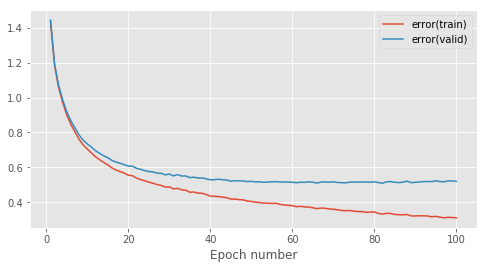

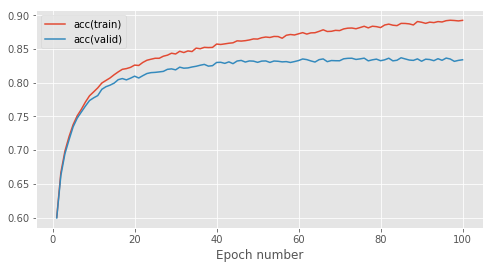

    final error(train) = 3.10e-01
    final error(valid) = 5.20e-01
    final acc(train)   = 8.92e-01
    final acc(valid)   = 8.34e-01
    run time per epoch = 4.71


In [26]:
decay_rates = [
    0.001,
    0.0005,
    0.0001,
    0.00005,
    0.00001,
    5e-6
]

decay_rates = np.asarray(decay_rates)

num_epochs = 100
decay_rates_norm = decay_rates * ((batch_size * 1.0 / (train_data.num_batches * num_epochs)) ** 0.5)
print(decay_rates_norm)


decay_models_norm = OrderedDict()
decay_stats_norm = OrderedDict()
final_train_errors = []
final_valid_errors = []
final_train_accs = []
final_valid_accs = []

for weight_decay in decay_rates_norm:
    layers = [AffineLayer(input_dim, hidden_dim, weights_init, biases_init),
              ReluLayer(),
              AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
              ReluLayer(),
              AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
              ReluLayer(),
              AffineLayer(hidden_dim, output_dim, weights_init, biases_init)]

    model = MultipleLayerModel(layers)
    learning_rule = AdamLearningRuleWithWeightDecay(learning_rate=0.0001, beta_1=0.5, beta_2=0.999, epsilon=1e-8, weight_decay=weight_decay)

    stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
            model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
    plt.show()
    
    decay_models_norm[weight_decay] = model
    decay_stats_norm[weight_decay] = stats
    final_train_errors.append(stats[-1, 0])
    final_valid_errors.append(stats[-1, 2])
    final_train_accs.append(stats[-1, 1])
    final_valid_accs.append(stats[-1, -1])
    
    print('    final error(train) = {0:.2e}'.format(stats[-1, 0]))
    print('    final error(valid) = {0:.2e}'.format(stats[-1, 2]))
    print('    final acc(train)   = {0:.2e}'.format(stats[-1, 1]))
    print('    final acc(valid)   = {0:.2e}'.format(stats[-1, -1]))
    print('    run time per epoch = {0:.2f}'.format(run_time * 1. / num_epochs))

In [28]:
labels = [
    0.001,
    0.0005,
    0.0001,
    0.00005,
    0.00001,
    5e-6
]

print('|     methods     | final train error| final train acc |final valid error| final valid acc |')
print('|---------------- |------------------|-----------------|------------------|-----------------|')
for i, k in enumerate(labels):
    print('|{0:.7f}           | {1:3f}        |  {2:3f}      |  {3:3f}        |  {4:3f}      | '
          .format(k, 
                  final_train_errors[i], final_train_accs[i] * 100,
                  final_valid_errors[i], final_valid_accs[i] * 100))

|     methods     | final train error| final train acc |final valid error| final valid acc |
|---------------- |------------------|-----------------|------------------|-----------------|
|0.0010000           | 0.495353        |  84.559000      |  0.536342        |  83.316456      | 
|0.0005000           | 0.419823        |  86.512000      |  0.493334        |  84.050633      | 
|0.0001000           | 0.325392        |  88.887000      |  0.482574        |  84.227848      | 
|0.0000500           | 0.318510        |  89.215000      |  0.502949        |  83.873418      | 
|0.0000100           | 0.307985        |  89.360000      |  0.508793        |  83.867089      | 
|0.0000050           | 0.310096        |  89.236000      |  0.519782        |  83.392405      | 


In [47]:
l2_model = list(penalties_models.values())[2]
l2_stats = list(penalties_stats.values())[2]

In [54]:
nwd_model = list(decay_models_norm.values())[2]
nwd_stats = list(decay_stats_norm.values())[2]

In [59]:
models = [l2_model, wd_model, nwd_model]
stats = [l2_stats, wd_stats, nwd_stats]

In [61]:
test_accs = []
for model in models:
    acc = evaluation_acc(test_data, model)
    test_accs.append(acc)

In [62]:
test_accs

[0.8310126582278481, 0.8314556962025317, 0.8341139240506329]

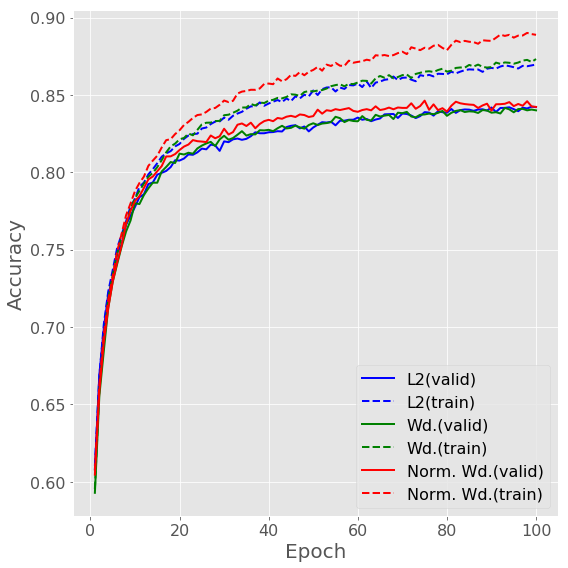

In [81]:
plt.figure(figsize=(8,8))
labels = ['L2', 'Wd.', 'Norm. Wd.']
cs = ['b', 'g', 'r']

for k, stat, c in zip(labels,  stats, cs):
    # valid
    plt.plot(np.arange(1, stat.shape[0]), stat[1:, -1], label=k + '(valid)', linewidth=2, c=c)
    # train
    plt.plot(np.arange(1, stat.shape[0]), stat[1:, 1], label=k+ '(train)', linewidth=2, c=c, linestyle='--')
    
plt.legend(loc=4, fontsize=16)
plt.ylabel('Accuracy', fontsize=20)
plt.xlabel('Epoch', fontsize=20)
plt.tick_params(axis='both', labelsize=16)
plt.tight_layout()
plt.savefig('./5_1.pdf')
plt.show()

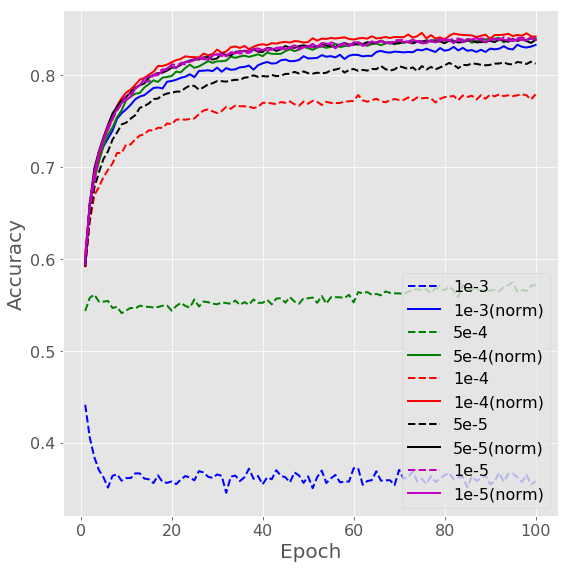

In [82]:
plt.figure(figsize=(8,8))
labels = [ '1e-3','5e-4','1e-4',
    '5e-5',
    '1e-5',
    '5e-6']
cs = ['b', 'g', 'r', 'k', 'm']

for k, stat, stat_n, c in zip(labels, list(decay_stats.values()), list(decay_stats_norm.values()), cs):
    # non norm
    plt.plot(np.arange(1, stat.shape[0]), stat[1:, -1], label=k, linewidth=2, c=c, linestyle='--')
    # norm
    plt.plot(np.arange(1, stat_n.shape[0]), stat_n[1:, -1], label=k + '(norm)', linewidth=2, c=c)
    
plt.legend(loc=4, fontsize=16)
# plt.ylim((0, 95))
plt.ylabel('Accuracy', fontsize=20)
plt.xlabel('Epoch', fontsize=20)
plt.tick_params(axis='both', labelsize=16)
plt.tight_layout()
plt.savefig('5_2.pdf')
plt.show()

In [72]:
stat

0.001

In [ ]:
fig, ax1 = plt.subplots(figsize=(8, 8))


for k, model, stat, c in zip(labels, models, stats, cs):
    ax1.plot(np.arange(1, stat.shape[0]), stat[1:, -1], label=k, linewidth=2, c=c)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')


ax2 = ax1.twinx()
for k, model, stat, c in zip(labels, models, stats, cs):
    ax2.plot(np.arange(1, stat.shape[0]), stat[1:, -2], label=k, linewidth=2, c=c)
ax2.set_ylabel('Error', color='r')
ax2.tick_params('y', colors='r')

ax1.legend(loc=0)
fig.tight_layout()
plt.show()

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def train_model_and_plot_stats(
        model, error, learning_rule, scheduler, train_data, valid_data, num_epochs, stats_interval, notebook=True):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, notebook=notebook)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval, scheduler=scheduler)

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2, optimiser

In [87]:
weight_decay

1.5811388300841896e-07

### fixing learning rate

In [89]:
weight_decay = decay_rates_norm[2]
weight_decay

3.162277660168379e-06

Epoch 1: 2.0s to complete
    error(train)=1.43e+00, acc(train)=6.01e-01, error(valid)=1.43e+00, acc(valid)=5.99e-01


Epoch 2: 2.0s to complete
    error(train)=1.19e+00, acc(train)=6.64e-01, error(valid)=1.19e+00, acc(valid)=6.60e-01


Epoch 3: 2.0s to complete
    error(train)=1.06e+00, acc(train)=6.97e-01, error(valid)=1.07e+00, acc(valid)=6.94e-01


Epoch 4: 2.1s to complete
    error(train)=9.79e-01, acc(train)=7.17e-01, error(valid)=9.92e-01, acc(valid)=7.14e-01


Epoch 5: 2.0s to complete
    error(train)=9.11e-01, acc(train)=7.35e-01, error(valid)=9.26e-01, acc(valid)=7.33e-01


Epoch 6: 2.0s to complete
    error(train)=8.48e-01, acc(train)=7.52e-01, error(valid)=8.67e-01, acc(valid)=7.47e-01


Epoch 7: 2.0s to complete
    error(train)=8.04e-01, acc(train)=7.63e-01, error(valid)=8.24e-01, acc(valid)=7.56e-01


Epoch 8: 2.1s to complete
    error(train)=7.61e-01, acc(train)=7.75e-01, error(valid)=7.86e-01, acc(valid)=7.70e-01


Epoch 9: 2.0s to complete
    error(train)=7.32e-01, acc(train)=7.82e-01, error(valid)=7.57e-01, acc(valid)=7.75e-01


Epoch 10: 2.2s to complete
    error(train)=7.01e-01, acc(train)=7.89e-01, error(valid)=7.30e-01, acc(valid)=7.80e-01


Epoch 11: 2.2s to complete
    error(train)=6.81e-01, acc(train)=7.94e-01, error(valid)=7.13e-01, acc(valid)=7.83e-01


Epoch 12: 2.1s to complete
    error(train)=6.64e-01, acc(train)=7.97e-01, error(valid)=6.98e-01, acc(valid)=7.88e-01


Epoch 13: 2.2s to complete
    error(train)=6.49e-01, acc(train)=7.98e-01, error(valid)=6.86e-01, acc(valid)=7.86e-01


Epoch 14: 2.1s to complete
    error(train)=6.27e-01, acc(train)=8.07e-01, error(valid)=6.64e-01, acc(valid)=7.96e-01


Epoch 15: 2.1s to complete
    error(train)=6.09e-01, acc(train)=8.14e-01, error(valid)=6.49e-01, acc(valid)=7.99e-01


Epoch 16: 2.1s to complete
    error(train)=5.97e-01, acc(train)=8.16e-01, error(valid)=6.38e-01, acc(valid)=8.01e-01


Epoch 17: 2.0s to complete
    error(train)=5.84e-01, acc(train)=8.19e-01, error(valid)=6.27e-01, acc(valid)=8.04e-01


Epoch 18: 2.1s to complete
    error(train)=5.76e-01, acc(train)=8.20e-01, error(valid)=6.21e-01, acc(valid)=8.06e-01


Epoch 19: 2.0s to complete
    error(train)=5.64e-01, acc(train)=8.24e-01, error(valid)=6.12e-01, acc(valid)=8.10e-01


Epoch 20: 2.0s to complete
    error(train)=5.54e-01, acc(train)=8.27e-01, error(valid)=6.03e-01, acc(valid)=8.10e-01


Epoch 21: 2.1s to complete
    error(train)=5.45e-01, acc(train)=8.29e-01, error(valid)=5.97e-01, acc(valid)=8.13e-01


Epoch 22: 2.0s to complete
    error(train)=5.41e-01, acc(train)=8.29e-01, error(valid)=5.95e-01, acc(valid)=8.11e-01


Epoch 23: 2.2s to complete
    error(train)=5.30e-01, acc(train)=8.33e-01, error(valid)=5.86e-01, acc(valid)=8.15e-01


Epoch 24: 2.1s to complete
    error(train)=5.20e-01, acc(train)=8.35e-01, error(valid)=5.76e-01, acc(valid)=8.15e-01


Epoch 25: 2.1s to complete
    error(train)=5.12e-01, acc(train)=8.37e-01, error(valid)=5.71e-01, acc(valid)=8.16e-01


Epoch 26: 2.1s to complete
    error(train)=5.09e-01, acc(train)=8.37e-01, error(valid)=5.69e-01, acc(valid)=8.18e-01


Epoch 27: 2.3s to complete
    error(train)=5.05e-01, acc(train)=8.37e-01, error(valid)=5.68e-01, acc(valid)=8.16e-01


Epoch 28: 2.0s to complete
    error(train)=5.01e-01, acc(train)=8.40e-01, error(valid)=5.66e-01, acc(valid)=8.18e-01


Epoch 29: 2.0s to complete
    error(train)=4.94e-01, acc(train)=8.42e-01, error(valid)=5.59e-01, acc(valid)=8.20e-01


Epoch 30: 2.1s to complete
    error(train)=4.87e-01, acc(train)=8.43e-01, error(valid)=5.56e-01, acc(valid)=8.17e-01


Epoch 31: 2.1s to complete
    error(train)=4.80e-01, acc(train)=8.45e-01, error(valid)=5.48e-01, acc(valid)=8.23e-01


Epoch 32: 2.1s to complete
    error(train)=4.76e-01, acc(train)=8.47e-01, error(valid)=5.46e-01, acc(valid)=8.22e-01


Epoch 33: 2.0s to complete
    error(train)=4.72e-01, acc(train)=8.47e-01, error(valid)=5.44e-01, acc(valid)=8.24e-01


Epoch 34: 2.2s to complete
    error(train)=4.69e-01, acc(train)=8.47e-01, error(valid)=5.43e-01, acc(valid)=8.23e-01


Epoch 35: 2.1s to complete
    error(train)=4.63e-01, acc(train)=8.51e-01, error(valid)=5.38e-01, acc(valid)=8.25e-01


Epoch 36: 2.0s to complete
    error(train)=4.58e-01, acc(train)=8.51e-01, error(valid)=5.35e-01, acc(valid)=8.27e-01


Epoch 37: 2.1s to complete
    error(train)=4.55e-01, acc(train)=8.52e-01, error(valid)=5.32e-01, acc(valid)=8.26e-01


Epoch 38: 2.1s to complete
    error(train)=4.53e-01, acc(train)=8.52e-01, error(valid)=5.32e-01, acc(valid)=8.26e-01


Epoch 39: 2.0s to complete
    error(train)=4.48e-01, acc(train)=8.54e-01, error(valid)=5.31e-01, acc(valid)=8.28e-01


Epoch 40: 2.1s to complete
    error(train)=4.44e-01, acc(train)=8.55e-01, error(valid)=5.27e-01, acc(valid)=8.29e-01


Epoch 41: 2.1s to complete
    error(train)=4.43e-01, acc(train)=8.55e-01, error(valid)=5.26e-01, acc(valid)=8.28e-01


Epoch 42: 2.1s to complete
    error(train)=4.35e-01, acc(train)=8.58e-01, error(valid)=5.22e-01, acc(valid)=8.29e-01


Epoch 43: 2.1s to complete
    error(train)=4.32e-01, acc(train)=8.58e-01, error(valid)=5.22e-01, acc(valid)=8.30e-01


Epoch 44: 2.1s to complete
    error(train)=4.27e-01, acc(train)=8.60e-01, error(valid)=5.17e-01, acc(valid)=8.29e-01


Epoch 45: 2.0s to complete
    error(train)=4.25e-01, acc(train)=8.60e-01, error(valid)=5.17e-01, acc(valid)=8.31e-01


Epoch 46: 2.0s to complete
    error(train)=4.25e-01, acc(train)=8.60e-01, error(valid)=5.18e-01, acc(valid)=8.29e-01


Epoch 47: 2.1s to complete
    error(train)=4.25e-01, acc(train)=8.59e-01, error(valid)=5.20e-01, acc(valid)=8.27e-01


Epoch 48: 2.1s to complete
    error(train)=4.17e-01, acc(train)=8.62e-01, error(valid)=5.12e-01, acc(valid)=8.31e-01


Epoch 49: 2.1s to complete
    error(train)=4.16e-01, acc(train)=8.62e-01, error(valid)=5.12e-01, acc(valid)=8.32e-01


Epoch 50: 2.1s to complete
    error(train)=4.14e-01, acc(train)=8.63e-01, error(valid)=5.11e-01, acc(valid)=8.29e-01


Epoch 51: 2.1s to complete
    error(train)=4.11e-01, acc(train)=8.63e-01, error(valid)=5.08e-01, acc(valid)=8.32e-01


Epoch 52: 2.0s to complete
    error(train)=4.05e-01, acc(train)=8.66e-01, error(valid)=5.06e-01, acc(valid)=8.35e-01


Epoch 53: 2.1s to complete
    error(train)=4.05e-01, acc(train)=8.65e-01, error(valid)=5.06e-01, acc(valid)=8.32e-01


Epoch 54: 2.1s to complete
    error(train)=4.04e-01, acc(train)=8.66e-01, error(valid)=5.06e-01, acc(valid)=8.33e-01


Epoch 55: 2.0s to complete
    error(train)=4.06e-01, acc(train)=8.65e-01, error(valid)=5.11e-01, acc(valid)=8.31e-01


Epoch 56: 2.1s to complete
    error(train)=4.00e-01, acc(train)=8.66e-01, error(valid)=5.08e-01, acc(valid)=8.33e-01


Epoch 57: 2.1s to complete
    error(train)=3.94e-01, acc(train)=8.69e-01, error(valid)=5.01e-01, acc(valid)=8.35e-01


Epoch 58: 2.1s to complete
    error(train)=3.93e-01, acc(train)=8.68e-01, error(valid)=5.03e-01, acc(valid)=8.33e-01


Epoch 59: 2.1s to complete
    error(train)=3.89e-01, acc(train)=8.71e-01, error(valid)=4.99e-01, acc(valid)=8.36e-01


Epoch 60: 2.1s to complete
    error(train)=3.88e-01, acc(train)=8.71e-01, error(valid)=4.99e-01, acc(valid)=8.35e-01


Epoch 61: 2.1s to complete
    error(train)=3.88e-01, acc(train)=8.69e-01, error(valid)=5.02e-01, acc(valid)=8.32e-01


Epoch 62: 2.0s to complete
    error(train)=3.88e-01, acc(train)=8.70e-01, error(valid)=5.01e-01, acc(valid)=8.35e-01


Epoch 63: 2.1s to complete
    error(train)=3.83e-01, acc(train)=8.72e-01, error(valid)=4.98e-01, acc(valid)=8.34e-01


Epoch 64: 2.1s to complete
    error(train)=3.82e-01, acc(train)=8.73e-01, error(valid)=4.98e-01, acc(valid)=8.36e-01


Epoch 65: 2.0s to complete
    error(train)=3.83e-01, acc(train)=8.71e-01, error(valid)=5.02e-01, acc(valid)=8.35e-01


Epoch 66: 2.1s to complete
    error(train)=3.78e-01, acc(train)=8.75e-01, error(valid)=4.98e-01, acc(valid)=8.38e-01


Epoch 67: 2.1s to complete
    error(train)=3.73e-01, acc(train)=8.75e-01, error(valid)=4.96e-01, acc(valid)=8.37e-01


Epoch 68: 2.1s to complete
    error(train)=3.73e-01, acc(train)=8.76e-01, error(valid)=4.95e-01, acc(valid)=8.38e-01


Epoch 69: 2.1s to complete
    error(train)=3.72e-01, acc(train)=8.75e-01, error(valid)=4.95e-01, acc(valid)=8.37e-01


Epoch 70: 2.1s to complete
    error(train)=3.71e-01, acc(train)=8.76e-01, error(valid)=4.96e-01, acc(valid)=8.36e-01


Epoch 71: 2.2s to complete
    error(train)=3.67e-01, acc(train)=8.77e-01, error(valid)=4.93e-01, acc(valid)=8.36e-01


Epoch 72: 2.2s to complete
    error(train)=3.67e-01, acc(train)=8.76e-01, error(valid)=4.96e-01, acc(valid)=8.36e-01


Epoch 73: 2.1s to complete
    error(train)=3.63e-01, acc(train)=8.78e-01, error(valid)=4.93e-01, acc(valid)=8.37e-01


Epoch 74: 2.0s to complete
    error(train)=3.61e-01, acc(train)=8.79e-01, error(valid)=4.91e-01, acc(valid)=8.39e-01


Epoch 75: 2.1s to complete
    error(train)=3.63e-01, acc(train)=8.79e-01, error(valid)=4.92e-01, acc(valid)=8.38e-01


Epoch 76: 2.1s to complete
    error(train)=3.60e-01, acc(train)=8.79e-01, error(valid)=4.91e-01, acc(valid)=8.36e-01


Epoch 77: 2.1s to complete
    error(train)=3.58e-01, acc(train)=8.78e-01, error(valid)=4.92e-01, acc(valid)=8.37e-01


Epoch 78: 2.1s to complete
    error(train)=3.53e-01, acc(train)=8.82e-01, error(valid)=4.88e-01, acc(valid)=8.38e-01


Epoch 79: 2.3s to complete
    error(train)=3.58e-01, acc(train)=8.79e-01, error(valid)=4.95e-01, acc(valid)=8.37e-01


Epoch 80: 2.0s to complete
    error(train)=3.54e-01, acc(train)=8.80e-01, error(valid)=4.92e-01, acc(valid)=8.37e-01


Epoch 81: 2.2s to complete
    error(train)=3.52e-01, acc(train)=8.81e-01, error(valid)=4.90e-01, acc(valid)=8.39e-01


Epoch 82: 2.2s to complete
    error(train)=3.52e-01, acc(train)=8.80e-01, error(valid)=4.91e-01, acc(valid)=8.37e-01


Epoch 83: 2.1s to complete
    error(train)=3.50e-01, acc(train)=8.82e-01, error(valid)=4.91e-01, acc(valid)=8.38e-01


Epoch 84: 2.1s to complete
    error(train)=3.51e-01, acc(train)=8.81e-01, error(valid)=4.93e-01, acc(valid)=8.38e-01


Epoch 85: 2.1s to complete
    error(train)=3.45e-01, acc(train)=8.84e-01, error(valid)=4.88e-01, acc(valid)=8.38e-01


Epoch 86: 2.0s to complete
    error(train)=3.46e-01, acc(train)=8.83e-01, error(valid)=4.90e-01, acc(valid)=8.39e-01


Epoch 87: 2.0s to complete
    error(train)=3.47e-01, acc(train)=8.83e-01, error(valid)=4.93e-01, acc(valid)=8.38e-01


Epoch 88: 2.1s to complete
    error(train)=3.41e-01, acc(train)=8.85e-01, error(valid)=4.87e-01, acc(valid)=8.40e-01


Epoch 89: 2.1s to complete
    error(train)=3.41e-01, acc(train)=8.84e-01, error(valid)=4.89e-01, acc(valid)=8.41e-01


Epoch 90: 2.3s to complete
    error(train)=3.41e-01, acc(train)=8.84e-01, error(valid)=4.91e-01, acc(valid)=8.39e-01


Epoch 91: 2.1s to complete
    error(train)=3.38e-01, acc(train)=8.86e-01, error(valid)=4.89e-01, acc(valid)=8.41e-01


Epoch 92: 2.1s to complete
    error(train)=3.35e-01, acc(train)=8.87e-01, error(valid)=4.87e-01, acc(valid)=8.39e-01


Epoch 93: 2.1s to complete
    error(train)=3.37e-01, acc(train)=8.86e-01, error(valid)=4.91e-01, acc(valid)=8.40e-01


Epoch 94: 2.2s to complete
    error(train)=3.38e-01, acc(train)=8.85e-01, error(valid)=4.92e-01, acc(valid)=8.39e-01


Epoch 95: 2.1s to complete
    error(train)=3.32e-01, acc(train)=8.88e-01, error(valid)=4.86e-01, acc(valid)=8.41e-01


Epoch 96: 2.2s to complete
    error(train)=3.38e-01, acc(train)=8.83e-01, error(valid)=4.93e-01, acc(valid)=8.37e-01


Epoch 97: 2.1s to complete
    error(train)=3.30e-01, acc(train)=8.89e-01, error(valid)=4.86e-01, acc(valid)=8.41e-01


Epoch 98: 2.1s to complete
    error(train)=3.35e-01, acc(train)=8.84e-01, error(valid)=4.94e-01, acc(valid)=8.39e-01


Epoch 99: 2.1s to complete
    error(train)=3.31e-01, acc(train)=8.87e-01, error(valid)=4.90e-01, acc(valid)=8.38e-01


Epoch 100: 2.2s to complete
    error(train)=3.30e-01, acc(train)=8.87e-01, error(valid)=4.91e-01, acc(valid)=8.39e-01


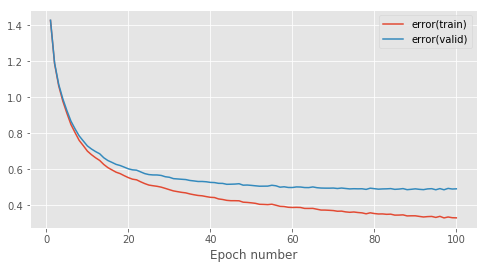

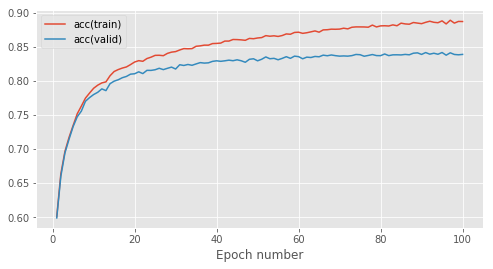

In [90]:
layers = [AffineLayer(input_dim, hidden_dim, weights_init, biases_init),
          ReluLayer(),
              
          AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
              
          ReluLayer(),
              
          AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
              
          ReluLayer(),
              
          AffineLayer(hidden_dim, output_dim, weights_init, biases_init)]

model_1 = MultipleLayerModel(layers)
learning_rule = AdamLearningRuleWithWeightDecay(learning_rate=0.0001, beta_1=0.5, beta_2=0.999, weight_decay=decay_rates_norm[2])

stats_1, keys, run_time, fig_1, ax_1, fig_2, ax_2, _ = train_model_and_plot_stats(
            model_1, error, learning_rule, None, train_data, valid_data, num_epochs, stats_interval, notebook=True)
plt.show()

### cos no restart

Epoch 1: 2.1s to complete
    error(train)=3.85e+00, acc(train)=3.16e-02, error(valid)=3.85e+00, acc(valid)=3.23e-02


Epoch 2: 2.2s to complete
    error(train)=3.83e+00, acc(train)=4.08e-02, error(valid)=3.83e+00, acc(valid)=4.04e-02


Epoch 3: 2.1s to complete
    error(train)=3.81e+00, acc(train)=5.12e-02, error(valid)=3.81e+00, acc(valid)=4.98e-02


Epoch 4: 2.4s to complete
    error(train)=3.78e+00, acc(train)=6.33e-02, error(valid)=3.79e+00, acc(valid)=5.88e-02


Epoch 5: 2.3s to complete
    error(train)=3.75e+00, acc(train)=7.89e-02, error(valid)=3.75e+00, acc(valid)=7.54e-02


Epoch 6: 2.2s to complete
    error(train)=3.70e+00, acc(train)=1.03e-01, error(valid)=3.70e+00, acc(valid)=9.96e-02


Epoch 7: 2.1s to complete
    error(train)=3.61e+00, acc(train)=1.36e-01, error(valid)=3.62e+00, acc(valid)=1.31e-01


Epoch 8: 2.4s to complete
    error(train)=3.47e+00, acc(train)=1.73e-01, error(valid)=3.48e+00, acc(valid)=1.66e-01


Epoch 9: 2.3s to complete
    error(train)=3.26e+00, acc(train)=2.13e-01, error(valid)=3.27e+00, acc(valid)=2.03e-01


Epoch 10: 2.1s to complete
    error(train)=2.96e+00, acc(train)=2.70e-01, error(valid)=2.97e+00, acc(valid)=2.64e-01


Epoch 11: 2.3s to complete
    error(train)=2.62e+00, acc(train)=3.49e-01, error(valid)=2.63e+00, acc(valid)=3.46e-01


Epoch 12: 2.1s to complete
    error(train)=2.31e+00, acc(train)=4.17e-01, error(valid)=2.31e+00, acc(valid)=4.10e-01


Epoch 13: 2.1s to complete
    error(train)=2.05e+00, acc(train)=4.77e-01, error(valid)=2.06e+00, acc(valid)=4.69e-01


Epoch 14: 2.2s to complete
    error(train)=1.85e+00, acc(train)=5.16e-01, error(valid)=1.86e+00, acc(valid)=5.10e-01


Epoch 15: 2.2s to complete
    error(train)=1.70e+00, acc(train)=5.48e-01, error(valid)=1.70e+00, acc(valid)=5.42e-01


Epoch 16: 2.0s to complete
    error(train)=1.57e+00, acc(train)=5.75e-01, error(valid)=1.57e+00, acc(valid)=5.71e-01


Epoch 17: 2.1s to complete
    error(train)=1.47e+00, acc(train)=5.98e-01, error(valid)=1.47e+00, acc(valid)=5.93e-01


Epoch 18: 2.2s to complete
    error(train)=1.39e+00, acc(train)=6.17e-01, error(valid)=1.39e+00, acc(valid)=6.14e-01


Epoch 19: 2.1s to complete
    error(train)=1.32e+00, acc(train)=6.32e-01, error(valid)=1.32e+00, acc(valid)=6.29e-01


Epoch 20: 2.1s to complete
    error(train)=1.26e+00, acc(train)=6.46e-01, error(valid)=1.27e+00, acc(valid)=6.43e-01


Epoch 21: 2.1s to complete
    error(train)=1.21e+00, acc(train)=6.60e-01, error(valid)=1.21e+00, acc(valid)=6.55e-01


Epoch 22: 2.1s to complete
    error(train)=1.16e+00, acc(train)=6.71e-01, error(valid)=1.17e+00, acc(valid)=6.67e-01


Epoch 23: 2.1s to complete
    error(train)=1.12e+00, acc(train)=6.82e-01, error(valid)=1.13e+00, acc(valid)=6.78e-01


Epoch 24: 2.0s to complete
    error(train)=1.08e+00, acc(train)=6.93e-01, error(valid)=1.09e+00, acc(valid)=6.87e-01


Epoch 25: 2.0s to complete
    error(train)=1.04e+00, acc(train)=7.03e-01, error(valid)=1.05e+00, acc(valid)=6.98e-01


Epoch 26: 2.3s to complete
    error(train)=1.00e+00, acc(train)=7.13e-01, error(valid)=1.01e+00, acc(valid)=7.08e-01


Epoch 27: 2.1s to complete
    error(train)=9.69e-01, acc(train)=7.21e-01, error(valid)=9.82e-01, acc(valid)=7.16e-01


Epoch 28: 2.2s to complete
    error(train)=9.36e-01, acc(train)=7.28e-01, error(valid)=9.50e-01, acc(valid)=7.24e-01


Epoch 29: 2.1s to complete
    error(train)=9.03e-01, acc(train)=7.38e-01, error(valid)=9.18e-01, acc(valid)=7.35e-01


Epoch 30: 2.0s to complete
    error(train)=8.77e-01, acc(train)=7.44e-01, error(valid)=8.93e-01, acc(valid)=7.41e-01


Epoch 31: 2.3s to complete
    error(train)=8.48e-01, acc(train)=7.51e-01, error(valid)=8.65e-01, acc(valid)=7.49e-01


Epoch 32: 2.0s to complete
    error(train)=8.25e-01, acc(train)=7.57e-01, error(valid)=8.45e-01, acc(valid)=7.55e-01


Epoch 33: 2.3s to complete
    error(train)=8.05e-01, acc(train)=7.60e-01, error(valid)=8.25e-01, acc(valid)=7.55e-01


Epoch 34: 2.0s to complete
    error(train)=7.77e-01, acc(train)=7.69e-01, error(valid)=8.00e-01, acc(valid)=7.66e-01


Epoch 35: 2.0s to complete
    error(train)=7.59e-01, acc(train)=7.74e-01, error(valid)=7.82e-01, acc(valid)=7.69e-01


Epoch 36: 2.0s to complete
    error(train)=7.37e-01, acc(train)=7.78e-01, error(valid)=7.64e-01, acc(valid)=7.75e-01


Epoch 37: 2.2s to complete
    error(train)=7.19e-01, acc(train)=7.82e-01, error(valid)=7.47e-01, acc(valid)=7.77e-01


Epoch 38: 2.1s to complete
    error(train)=7.00e-01, acc(train)=7.88e-01, error(valid)=7.30e-01, acc(valid)=7.82e-01


Epoch 39: 2.0s to complete
    error(train)=6.83e-01, acc(train)=7.92e-01, error(valid)=7.15e-01, acc(valid)=7.84e-01


Epoch 40: 2.1s to complete
    error(train)=6.69e-01, acc(train)=7.96e-01, error(valid)=7.02e-01, acc(valid)=7.87e-01


Epoch 41: 2.3s to complete
    error(train)=6.54e-01, acc(train)=7.99e-01, error(valid)=6.89e-01, acc(valid)=7.90e-01


Epoch 42: 2.0s to complete
    error(train)=6.45e-01, acc(train)=8.02e-01, error(valid)=6.83e-01, acc(valid)=7.91e-01


Epoch 43: 2.1s to complete
    error(train)=6.28e-01, acc(train)=8.06e-01, error(valid)=6.66e-01, acc(valid)=7.96e-01


Epoch 44: 2.2s to complete
    error(train)=6.15e-01, acc(train)=8.08e-01, error(valid)=6.55e-01, acc(valid)=7.98e-01


Epoch 45: 2.0s to complete
    error(train)=6.02e-01, acc(train)=8.12e-01, error(valid)=6.45e-01, acc(valid)=8.00e-01


Epoch 46: 2.2s to complete
    error(train)=5.93e-01, acc(train)=8.15e-01, error(valid)=6.40e-01, acc(valid)=8.03e-01


Epoch 47: 2.0s to complete
    error(train)=5.78e-01, acc(train)=8.20e-01, error(valid)=6.23e-01, acc(valid)=8.06e-01


Epoch 48: 2.0s to complete
    error(train)=5.67e-01, acc(train)=8.21e-01, error(valid)=6.16e-01, acc(valid)=8.07e-01


Epoch 49: 2.0s to complete
    error(train)=5.60e-01, acc(train)=8.25e-01, error(valid)=6.09e-01, acc(valid)=8.12e-01


Epoch 50: 2.0s to complete
    error(train)=5.49e-01, acc(train)=8.27e-01, error(valid)=5.99e-01, acc(valid)=8.12e-01


Epoch 51: 2.1s to complete
    error(train)=5.44e-01, acc(train)=8.27e-01, error(valid)=5.99e-01, acc(valid)=8.11e-01


Epoch 52: 2.0s to complete
    error(train)=5.41e-01, acc(train)=8.27e-01, error(valid)=5.98e-01, acc(valid)=8.10e-01


Epoch 53: 2.2s to complete
    error(train)=5.28e-01, acc(train)=8.32e-01, error(valid)=5.89e-01, acc(valid)=8.12e-01


Epoch 54: 2.1s to complete
    error(train)=5.19e-01, acc(train)=8.35e-01, error(valid)=5.81e-01, acc(valid)=8.13e-01


Epoch 55: 2.0s to complete
    error(train)=5.21e-01, acc(train)=8.33e-01, error(valid)=5.84e-01, acc(valid)=8.16e-01


Epoch 56: 2.0s to complete
    error(train)=5.03e-01, acc(train)=8.40e-01, error(valid)=5.67e-01, acc(valid)=8.18e-01


Epoch 57: 2.1s to complete
    error(train)=4.97e-01, acc(train)=8.40e-01, error(valid)=5.61e-01, acc(valid)=8.20e-01


Epoch 58: 2.1s to complete
    error(train)=4.93e-01, acc(train)=8.41e-01, error(valid)=5.61e-01, acc(valid)=8.21e-01


Epoch 59: 2.0s to complete
    error(train)=4.81e-01, acc(train)=8.44e-01, error(valid)=5.52e-01, acc(valid)=8.24e-01


Epoch 60: 2.1s to complete
    error(train)=4.77e-01, acc(train)=8.45e-01, error(valid)=5.52e-01, acc(valid)=8.23e-01


Epoch 61: 2.1s to complete
    error(train)=4.73e-01, acc(train)=8.46e-01, error(valid)=5.50e-01, acc(valid)=8.24e-01


Epoch 62: 2.1s to complete
    error(train)=4.63e-01, acc(train)=8.48e-01, error(valid)=5.41e-01, acc(valid)=8.25e-01


Epoch 63: 2.0s to complete
    error(train)=4.67e-01, acc(train)=8.47e-01, error(valid)=5.49e-01, acc(valid)=8.23e-01


Epoch 64: 2.1s to complete
    error(train)=4.57e-01, acc(train)=8.50e-01, error(valid)=5.40e-01, acc(valid)=8.28e-01


Epoch 65: 2.1s to complete
    error(train)=4.53e-01, acc(train)=8.51e-01, error(valid)=5.38e-01, acc(valid)=8.27e-01


Epoch 66: 2.0s to complete
    error(train)=4.44e-01, acc(train)=8.54e-01, error(valid)=5.32e-01, acc(valid)=8.27e-01


Epoch 67: 2.2s to complete
    error(train)=4.39e-01, acc(train)=8.56e-01, error(valid)=5.31e-01, acc(valid)=8.28e-01


Epoch 68: 2.1s to complete
    error(train)=4.34e-01, acc(train)=8.57e-01, error(valid)=5.28e-01, acc(valid)=8.26e-01


Epoch 69: 2.0s to complete
    error(train)=4.37e-01, acc(train)=8.54e-01, error(valid)=5.32e-01, acc(valid)=8.28e-01


Epoch 70: 2.1s to complete
    error(train)=4.23e-01, acc(train)=8.60e-01, error(valid)=5.20e-01, acc(valid)=8.34e-01


Epoch 71: 2.3s to complete
    error(train)=4.19e-01, acc(train)=8.61e-01, error(valid)=5.20e-01, acc(valid)=8.32e-01


Epoch 72: 2.0s to complete
    error(train)=4.19e-01, acc(train)=8.58e-01, error(valid)=5.25e-01, acc(valid)=8.27e-01


Epoch 73: 2.1s to complete
    error(train)=4.07e-01, acc(train)=8.65e-01, error(valid)=5.12e-01, acc(valid)=8.33e-01


Epoch 74: 2.2s to complete
    error(train)=4.14e-01, acc(train)=8.61e-01, error(valid)=5.23e-01, acc(valid)=8.30e-01


Epoch 75: 2.2s to complete
    error(train)=4.09e-01, acc(train)=8.63e-01, error(valid)=5.22e-01, acc(valid)=8.34e-01


Epoch 76: 2.1s to complete
    error(train)=4.02e-01, acc(train)=8.65e-01, error(valid)=5.14e-01, acc(valid)=8.36e-01


Epoch 77: 2.2s to complete
    error(train)=4.03e-01, acc(train)=8.62e-01, error(valid)=5.17e-01, acc(valid)=8.31e-01


Epoch 78: 2.1s to complete
    error(train)=3.88e-01, acc(train)=8.70e-01, error(valid)=5.05e-01, acc(valid)=8.35e-01


Epoch 79: 2.1s to complete
    error(train)=3.90e-01, acc(train)=8.69e-01, error(valid)=5.07e-01, acc(valid)=8.37e-01


Epoch 80: 2.2s to complete
    error(train)=3.86e-01, acc(train)=8.69e-01, error(valid)=5.07e-01, acc(valid)=8.38e-01


Epoch 81: 2.2s to complete
    error(train)=3.87e-01, acc(train)=8.68e-01, error(valid)=5.11e-01, acc(valid)=8.34e-01


Epoch 82: 2.1s to complete
    error(train)=3.83e-01, acc(train)=8.69e-01, error(valid)=5.10e-01, acc(valid)=8.36e-01


Epoch 83: 2.1s to complete
    error(train)=3.74e-01, acc(train)=8.73e-01, error(valid)=5.04e-01, acc(valid)=8.35e-01


Epoch 84: 2.0s to complete
    error(train)=3.74e-01, acc(train)=8.71e-01, error(valid)=5.07e-01, acc(valid)=8.34e-01


Epoch 85: 2.1s to complete
    error(train)=3.73e-01, acc(train)=8.72e-01, error(valid)=5.05e-01, acc(valid)=8.37e-01


Epoch 86: 2.1s to complete
    error(train)=3.70e-01, acc(train)=8.73e-01, error(valid)=5.08e-01, acc(valid)=8.38e-01


Epoch 87: 2.1s to complete
    error(train)=3.71e-01, acc(train)=8.71e-01, error(valid)=5.10e-01, acc(valid)=8.37e-01


Epoch 88: 2.1s to complete
    error(train)=3.55e-01, acc(train)=8.77e-01, error(valid)=4.95e-01, acc(valid)=8.38e-01


Epoch 89: 2.1s to complete
    error(train)=3.55e-01, acc(train)=8.78e-01, error(valid)=4.98e-01, acc(valid)=8.38e-01


Epoch 90: 2.1s to complete
    error(train)=3.63e-01, acc(train)=8.69e-01, error(valid)=5.10e-01, acc(valid)=8.31e-01


Epoch 91: 2.0s to complete
    error(train)=3.58e-01, acc(train)=8.77e-01, error(valid)=5.05e-01, acc(valid)=8.39e-01


Epoch 92: 2.3s to complete
    error(train)=3.52e-01, acc(train)=8.79e-01, error(valid)=5.02e-01, acc(valid)=8.40e-01


Epoch 93: 2.1s to complete
    error(train)=3.48e-01, acc(train)=8.80e-01, error(valid)=5.04e-01, acc(valid)=8.37e-01


Epoch 94: 2.0s to complete
    error(train)=3.42e-01, acc(train)=8.82e-01, error(valid)=4.98e-01, acc(valid)=8.39e-01


Epoch 95: 2.1s to complete
    error(train)=3.35e-01, acc(train)=8.85e-01, error(valid)=4.90e-01, acc(valid)=8.41e-01


Epoch 96: 2.1s to complete
    error(train)=3.46e-01, acc(train)=8.78e-01, error(valid)=5.08e-01, acc(valid)=8.36e-01


Epoch 97: 2.0s to complete
    error(train)=3.30e-01, acc(train)=8.84e-01, error(valid)=4.91e-01, acc(valid)=8.40e-01


Epoch 98: 2.0s to complete
    error(train)=3.28e-01, acc(train)=8.87e-01, error(valid)=4.91e-01, acc(valid)=8.45e-01


Epoch 99: 2.1s to complete
    error(train)=3.30e-01, acc(train)=8.84e-01, error(valid)=4.97e-01, acc(valid)=8.38e-01


Epoch 100: 2.1s to complete
    error(train)=3.25e-01, acc(train)=8.87e-01, error(valid)=4.90e-01, acc(valid)=8.43e-01


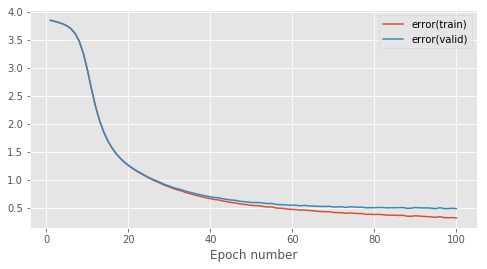

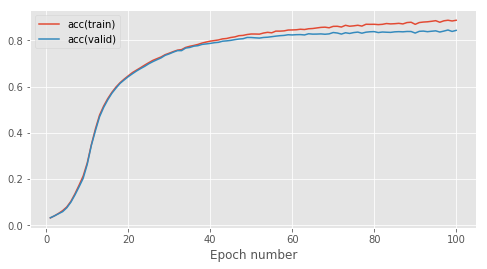

In [91]:
layers = [AffineLayer(input_dim, hidden_dim, weights_init, biases_init),
          ReluLayer(),
              
          AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
              
          ReluLayer(),
              
          AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
              
          ReluLayer(),
              
          AffineLayer(hidden_dim, output_dim, weights_init, biases_init)]

model_2 = MultipleLayerModel(layers)
learning_rule = AdamLearningRuleWithWeightDecay(learning_rate=0.0001, beta_1=0.5, beta_2=0.999, weight_decay=weight_decay)
scheduler = CosineAnnealingWithWarmRestarts(min_learning_rate=0.00025, 
                                        max_learning_rate=0.000001,
                                        total_iters_per_period=100.,
                                        max_learning_rate_discount_factor=1,
                                        period_iteration_expansion_factor=1)

stats_2, keys, run_time, fig_1, ax_1, fig_2, ax_2, _ = train_model_and_plot_stats(
            model_2, error, learning_rule, scheduler, train_data, valid_data, num_epochs, stats_interval, notebook=True)
plt.show()

### cos restart

Epoch 1: 2.2s to complete
    error(train)=3.85e+00, acc(train)=2.59e-02, error(valid)=3.85e+00, acc(valid)=2.54e-02


Epoch 2: 2.1s to complete
    error(train)=3.82e+00, acc(train)=3.61e-02, error(valid)=3.82e+00, acc(valid)=3.70e-02


Epoch 3: 2.2s to complete
    error(train)=3.71e+00, acc(train)=7.31e-02, error(valid)=3.71e+00, acc(valid)=7.35e-02


Epoch 4: 2.1s to complete
    error(train)=3.27e+00, acc(train)=2.07e-01, error(valid)=3.27e+00, acc(valid)=2.08e-01


Epoch 5: 2.1s to complete
    error(train)=2.40e+00, acc(train)=4.15e-01, error(valid)=2.40e+00, acc(valid)=4.10e-01


Epoch 6: 2.2s to complete
    error(train)=1.78e+00, acc(train)=5.33e-01, error(valid)=1.78e+00, acc(valid)=5.26e-01


Epoch 7: 2.0s to complete
    error(train)=1.49e+00, acc(train)=5.93e-01, error(valid)=1.49e+00, acc(valid)=5.89e-01


Epoch 8: 2.2s to complete
    error(train)=1.31e+00, acc(train)=6.35e-01, error(valid)=1.32e+00, acc(valid)=6.32e-01


Epoch 9: 2.1s to complete
    error(train)=1.19e+00, acc(train)=6.65e-01, error(valid)=1.19e+00, acc(valid)=6.62e-01


Epoch 10: 2.1s to complete
    error(train)=1.08e+00, acc(train)=6.91e-01, error(valid)=1.09e+00, acc(valid)=6.87e-01


Epoch 11: 2.0s to complete
    error(train)=9.99e-01, acc(train)=7.12e-01, error(valid)=1.01e+00, acc(valid)=7.09e-01


Epoch 12: 2.1s to complete
    error(train)=9.20e-01, acc(train)=7.32e-01, error(valid)=9.30e-01, acc(valid)=7.28e-01


Epoch 13: 2.2s to complete
    error(train)=8.64e-01, acc(train)=7.45e-01, error(valid)=8.77e-01, acc(valid)=7.42e-01


Epoch 14: 2.2s to complete
    error(train)=8.08e-01, acc(train)=7.60e-01, error(valid)=8.21e-01, acc(valid)=7.55e-01


Epoch 15: 2.1s to complete
    error(train)=7.62e-01, acc(train)=7.72e-01, error(valid)=7.79e-01, acc(valid)=7.67e-01


Epoch 16: 2.1s to complete
    error(train)=7.21e-01, acc(train)=7.81e-01, error(valid)=7.41e-01, acc(valid)=7.75e-01


Epoch 17: 2.2s to complete
    error(train)=6.90e-01, acc(train)=7.90e-01, error(valid)=7.16e-01, acc(valid)=7.81e-01


Epoch 18: 2.1s to complete
    error(train)=6.51e-01, acc(train)=8.00e-01, error(valid)=6.79e-01, acc(valid)=7.93e-01


Epoch 19: 2.1s to complete
    error(train)=6.40e-01, acc(train)=8.02e-01, error(valid)=6.74e-01, acc(valid)=7.89e-01


Epoch 20: 2.1s to complete
    error(train)=6.09e-01, acc(train)=8.10e-01, error(valid)=6.45e-01, acc(valid)=7.99e-01


Epoch 21: 2.1s to complete
    error(train)=5.82e-01, acc(train)=8.17e-01, error(valid)=6.21e-01, acc(valid)=8.05e-01


Epoch 22: 2.0s to complete
    error(train)=5.64e-01, acc(train)=8.21e-01, error(valid)=6.07e-01, acc(valid)=8.07e-01


Epoch 23: 2.1s to complete
    error(train)=5.45e-01, acc(train)=8.26e-01, error(valid)=5.93e-01, acc(valid)=8.12e-01


Epoch 24: 2.2s to complete
    error(train)=5.46e-01, acc(train)=8.25e-01, error(valid)=5.98e-01, acc(valid)=8.08e-01


Epoch 25: 2.1s to complete
    error(train)=5.17e-01, acc(train)=8.34e-01, error(valid)=5.73e-01, acc(valid)=8.16e-01


Epoch 26: 2.1s to complete
    error(train)=5.02e-01, acc(train)=8.40e-01, error(valid)=5.58e-01, acc(valid)=8.23e-01


Epoch 27: 2.1s to complete
    error(train)=4.92e-01, acc(train)=8.42e-01, error(valid)=5.50e-01, acc(valid)=8.24e-01


Epoch 28: 2.1s to complete
    error(train)=4.88e-01, acc(train)=8.44e-01, error(valid)=5.48e-01, acc(valid)=8.25e-01


Epoch 29: 2.1s to complete
    error(train)=4.82e-01, acc(train)=8.45e-01, error(valid)=5.42e-01, acc(valid)=8.27e-01


Epoch 30: 2.1s to complete
    error(train)=4.82e-01, acc(train)=8.45e-01, error(valid)=5.43e-01, acc(valid)=8.23e-01


Epoch 31: 2.1s to complete
    error(train)=4.77e-01, acc(train)=8.46e-01, error(valid)=5.41e-01, acc(valid)=8.23e-01


Epoch 32: 2.2s to complete
    error(train)=4.71e-01, acc(train)=8.48e-01, error(valid)=5.36e-01, acc(valid)=8.27e-01


Epoch 33: 2.3s to complete
    error(train)=4.68e-01, acc(train)=8.48e-01, error(valid)=5.37e-01, acc(valid)=8.25e-01


Epoch 34: 2.2s to complete
    error(train)=4.59e-01, acc(train)=8.51e-01, error(valid)=5.27e-01, acc(valid)=8.29e-01


Epoch 35: 2.3s to complete
    error(train)=4.59e-01, acc(train)=8.51e-01, error(valid)=5.31e-01, acc(valid)=8.30e-01


Epoch 36: 2.1s to complete
    error(train)=4.59e-01, acc(train)=8.51e-01, error(valid)=5.31e-01, acc(valid)=8.29e-01


Epoch 37: 2.1s to complete
    error(train)=4.49e-01, acc(train)=8.54e-01, error(valid)=5.23e-01, acc(valid)=8.29e-01


Epoch 38: 2.1s to complete
    error(train)=4.46e-01, acc(train)=8.54e-01, error(valid)=5.23e-01, acc(valid)=8.30e-01


Epoch 39: 2.2s to complete
    error(train)=4.46e-01, acc(train)=8.53e-01, error(valid)=5.24e-01, acc(valid)=8.29e-01


Epoch 40: 2.2s to complete
    error(train)=4.38e-01, acc(train)=8.56e-01, error(valid)=5.18e-01, acc(valid)=8.31e-01


Epoch 41: 2.2s to complete
    error(train)=4.34e-01, acc(train)=8.58e-01, error(valid)=5.16e-01, acc(valid)=8.31e-01


Epoch 42: 2.1s to complete
    error(train)=4.33e-01, acc(train)=8.57e-01, error(valid)=5.18e-01, acc(valid)=8.31e-01


Epoch 43: 2.2s to complete
    error(train)=4.26e-01, acc(train)=8.60e-01, error(valid)=5.14e-01, acc(valid)=8.34e-01


Epoch 44: 2.3s to complete
    error(train)=4.20e-01, acc(train)=8.62e-01, error(valid)=5.09e-01, acc(valid)=8.33e-01


Epoch 45: 2.2s to complete
    error(train)=4.22e-01, acc(train)=8.61e-01, error(valid)=5.14e-01, acc(valid)=8.34e-01


Epoch 46: 2.1s to complete
    error(train)=4.14e-01, acc(train)=8.63e-01, error(valid)=5.09e-01, acc(valid)=8.33e-01


Epoch 47: 2.2s to complete
    error(train)=4.13e-01, acc(train)=8.63e-01, error(valid)=5.09e-01, acc(valid)=8.34e-01


Epoch 48: 2.1s to complete
    error(train)=4.01e-01, acc(train)=8.67e-01, error(valid)=5.01e-01, acc(valid)=8.37e-01


Epoch 49: 2.2s to complete
    error(train)=4.06e-01, acc(train)=8.65e-01, error(valid)=5.08e-01, acc(valid)=8.33e-01


Epoch 50: 2.1s to complete
    error(train)=3.98e-01, acc(train)=8.67e-01, error(valid)=5.02e-01, acc(valid)=8.36e-01


Epoch 51: 2.1s to complete
    error(train)=3.95e-01, acc(train)=8.67e-01, error(valid)=5.01e-01, acc(valid)=8.34e-01


Epoch 52: 2.1s to complete
    error(train)=3.93e-01, acc(train)=8.67e-01, error(valid)=5.05e-01, acc(valid)=8.35e-01


Epoch 53: 2.4s to complete
    error(train)=3.88e-01, acc(train)=8.69e-01, error(valid)=4.99e-01, acc(valid)=8.35e-01


Epoch 54: 2.2s to complete
    error(train)=3.93e-01, acc(train)=8.67e-01, error(valid)=5.06e-01, acc(valid)=8.35e-01


Epoch 55: 2.1s to complete
    error(train)=3.90e-01, acc(train)=8.68e-01, error(valid)=5.04e-01, acc(valid)=8.35e-01


Epoch 56: 2.1s to complete
    error(train)=3.76e-01, acc(train)=8.73e-01, error(valid)=4.94e-01, acc(valid)=8.39e-01


Epoch 57: 2.1s to complete
    error(train)=3.73e-01, acc(train)=8.73e-01, error(valid)=4.94e-01, acc(valid)=8.39e-01


Epoch 58: 2.1s to complete
    error(train)=3.72e-01, acc(train)=8.74e-01, error(valid)=4.95e-01, acc(valid)=8.37e-01


Epoch 59: 2.2s to complete
    error(train)=3.71e-01, acc(train)=8.72e-01, error(valid)=4.99e-01, acc(valid)=8.34e-01


Epoch 60: 2.1s to complete
    error(train)=3.60e-01, acc(train)=8.78e-01, error(valid)=4.89e-01, acc(valid)=8.40e-01


Epoch 61: 2.3s to complete
    error(train)=3.57e-01, acc(train)=8.79e-01, error(valid)=4.88e-01, acc(valid)=8.40e-01


Epoch 62: 2.2s to complete
    error(train)=3.64e-01, acc(train)=8.76e-01, error(valid)=4.97e-01, acc(valid)=8.37e-01


Epoch 63: 2.1s to complete
    error(train)=3.58e-01, acc(train)=8.77e-01, error(valid)=4.94e-01, acc(valid)=8.39e-01


Epoch 64: 2.1s to complete
    error(train)=3.53e-01, acc(train)=8.80e-01, error(valid)=4.91e-01, acc(valid)=8.39e-01


Epoch 65: 2.2s to complete
    error(train)=3.54e-01, acc(train)=8.78e-01, error(valid)=4.97e-01, acc(valid)=8.38e-01


Epoch 66: 2.1s to complete
    error(train)=3.52e-01, acc(train)=8.79e-01, error(valid)=4.94e-01, acc(valid)=8.40e-01


Epoch 67: 2.1s to complete
    error(train)=3.44e-01, acc(train)=8.82e-01, error(valid)=4.87e-01, acc(valid)=8.41e-01


Epoch 68: 2.2s to complete
    error(train)=3.39e-01, acc(train)=8.82e-01, error(valid)=4.85e-01, acc(valid)=8.38e-01


Epoch 69: 2.2s to complete
    error(train)=3.42e-01, acc(train)=8.82e-01, error(valid)=4.94e-01, acc(valid)=8.41e-01


Epoch 70: 2.2s to complete
    error(train)=3.43e-01, acc(train)=8.81e-01, error(valid)=4.99e-01, acc(valid)=8.37e-01


Epoch 71: 2.1s to complete
    error(train)=3.37e-01, acc(train)=8.83e-01, error(valid)=4.93e-01, acc(valid)=8.40e-01


Epoch 72: 2.1s to complete
    error(train)=3.32e-01, acc(train)=8.85e-01, error(valid)=4.87e-01, acc(valid)=8.40e-01


Epoch 73: 2.1s to complete
    error(train)=3.28e-01, acc(train)=8.86e-01, error(valid)=4.87e-01, acc(valid)=8.39e-01


Epoch 74: 2.1s to complete
    error(train)=3.25e-01, acc(train)=8.87e-01, error(valid)=4.88e-01, acc(valid)=8.42e-01


Epoch 75: 2.1s to complete
    error(train)=3.28e-01, acc(train)=8.85e-01, error(valid)=4.92e-01, acc(valid)=8.38e-01


Epoch 76: 2.2s to complete
    error(train)=3.18e-01, acc(train)=8.89e-01, error(valid)=4.82e-01, acc(valid)=8.42e-01


Epoch 77: 2.1s to complete
    error(train)=3.06e-01, acc(train)=8.95e-01, error(valid)=4.74e-01, acc(valid)=8.45e-01


Epoch 78: 2.2s to complete
    error(train)=3.03e-01, acc(train)=8.97e-01, error(valid)=4.72e-01, acc(valid)=8.45e-01


Epoch 79: 2.1s to complete
    error(train)=3.02e-01, acc(train)=8.97e-01, error(valid)=4.72e-01, acc(valid)=8.47e-01


Epoch 80: 2.4s to complete
    error(train)=3.00e-01, acc(train)=8.98e-01, error(valid)=4.71e-01, acc(valid)=8.45e-01


Epoch 81: 2.2s to complete
    error(train)=3.00e-01, acc(train)=8.98e-01, error(valid)=4.73e-01, acc(valid)=8.46e-01


Epoch 82: 2.1s to complete
    error(train)=3.00e-01, acc(train)=8.97e-01, error(valid)=4.75e-01, acc(valid)=8.45e-01


Epoch 83: 2.1s to complete
    error(train)=2.98e-01, acc(train)=8.98e-01, error(valid)=4.74e-01, acc(valid)=8.45e-01


Epoch 84: 2.1s to complete
    error(train)=2.97e-01, acc(train)=8.99e-01, error(valid)=4.75e-01, acc(valid)=8.45e-01


Epoch 85: 2.2s to complete
    error(train)=2.99e-01, acc(train)=8.97e-01, error(valid)=4.78e-01, acc(valid)=8.43e-01


Epoch 86: 2.1s to complete
    error(train)=2.96e-01, acc(train)=8.98e-01, error(valid)=4.75e-01, acc(valid)=8.44e-01


Epoch 87: 2.1s to complete
    error(train)=2.95e-01, acc(train)=8.98e-01, error(valid)=4.76e-01, acc(valid)=8.44e-01


Epoch 88: 2.1s to complete
    error(train)=2.94e-01, acc(train)=8.99e-01, error(valid)=4.75e-01, acc(valid)=8.44e-01


Epoch 89: 2.1s to complete
    error(train)=2.93e-01, acc(train)=9.00e-01, error(valid)=4.76e-01, acc(valid)=8.44e-01


Epoch 90: 2.4s to complete
    error(train)=2.93e-01, acc(train)=9.00e-01, error(valid)=4.76e-01, acc(valid)=8.46e-01


Epoch 91: 2.2s to complete
    error(train)=2.94e-01, acc(train)=8.98e-01, error(valid)=4.79e-01, acc(valid)=8.44e-01


Epoch 92: 2.1s to complete
    error(train)=2.92e-01, acc(train)=9.00e-01, error(valid)=4.77e-01, acc(valid)=8.44e-01


Epoch 93: 2.1s to complete
    error(train)=2.93e-01, acc(train)=8.99e-01, error(valid)=4.81e-01, acc(valid)=8.43e-01


Epoch 94: 2.1s to complete
    error(train)=2.88e-01, acc(train)=9.01e-01, error(valid)=4.77e-01, acc(valid)=8.45e-01


Epoch 95: 2.1s to complete
    error(train)=2.91e-01, acc(train)=8.99e-01, error(valid)=4.82e-01, acc(valid)=8.43e-01


Epoch 96: 2.2s to complete
    error(train)=2.90e-01, acc(train)=8.99e-01, error(valid)=4.83e-01, acc(valid)=8.42e-01


Epoch 97: 2.3s to complete
    error(train)=2.88e-01, acc(train)=9.00e-01, error(valid)=4.81e-01, acc(valid)=8.43e-01


Epoch 98: 2.3s to complete
    error(train)=2.88e-01, acc(train)=9.01e-01, error(valid)=4.81e-01, acc(valid)=8.42e-01


Epoch 99: 2.1s to complete
    error(train)=2.86e-01, acc(train)=9.01e-01, error(valid)=4.81e-01, acc(valid)=8.44e-01


Epoch 100: 2.1s to complete
    error(train)=2.84e-01, acc(train)=9.02e-01, error(valid)=4.82e-01, acc(valid)=8.42e-01


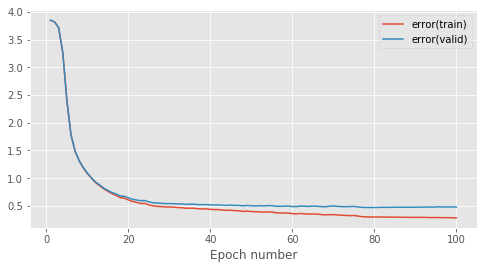

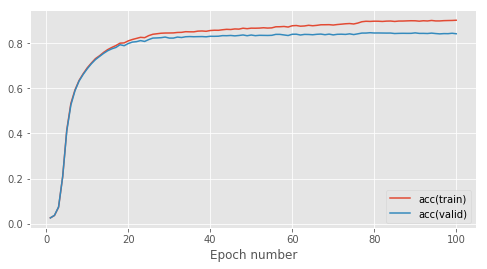

In [94]:
layers = [AffineLayer(input_dim, hidden_dim, weights_init, biases_init),
          ReluLayer(),
              
          AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
              
          ReluLayer(),
              
          AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
              
          ReluLayer(),
              
          AffineLayer(hidden_dim, output_dim, weights_init, biases_init)]

model_3 = MultipleLayerModel(layers)
learning_rule = AdamLearningRuleWithWeightDecay(learning_rate=0.0001, beta_1=0.5, beta_2=0.999, weight_decay=weight_decay)
scheduler = CosineAnnealingWithWarmRestarts(min_learning_rate=0.00025, 
                                        max_learning_rate=0.000001,
                                        total_iters_per_period=25,
                                        max_learning_rate_discount_factor=0.7,
                                        period_iteration_expansion_factor=3)

stats_3, keys, run_time, fig_1, ax_1, fig_2, ax_2, _ = train_model_and_plot_stats(
            model_3, error, learning_rule, scheduler, train_data, valid_data, num_epochs, stats_interval, notebook=True)
plt.show()

In [95]:
models = [model_1, model_2, model_3]
stats = [stats_1, stats_2, stats_3]
labels = ['AdamW', 'AdamWC', 'AdamWR']

In [96]:
test_accs = []
for model in models:
    acc = evaluation_acc(test_data, model)
    test_accs.append(acc)

In [97]:
test_accs

[0.8310126582278481, 0.8305696202531646, 0.8358227848101266]

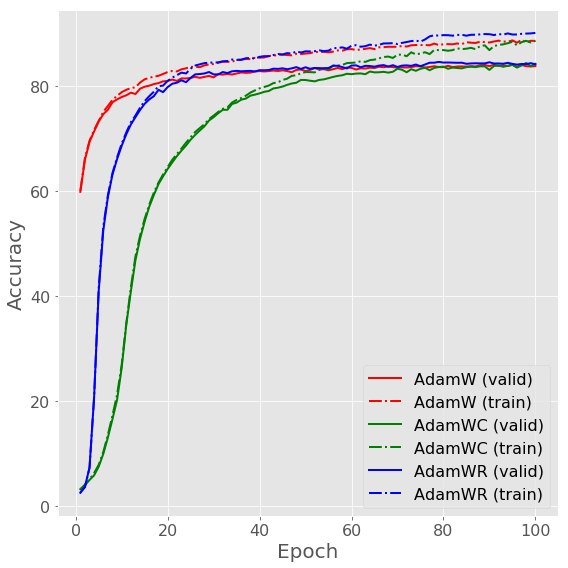

In [104]:
labels =['AdamW', 'AdamWC', 'AdamWR']
colors = ['r', 'g', 'b']
plt.figure(figsize=(8,8))
for k, stat,c in zip(labels, stats, colors):
    plt.plot(np.arange(1, stat.shape[0]), stat[1:, -1]  * 100, label=k + ' (valid)', linewidth=2, c=c)
    plt.plot(np.arange(1, stat.shape[0]), stat[1:, 1]  * 100, label=k+ ' (train)', linewidth=2, c=c, linestyle='-.')

plt.legend(loc=4, fontsize=16)
plt.ylabel('Accuracy', fontsize=20)
plt.xlabel('Epoch', fontsize=20)
plt.tick_params(axis='both', labelsize=16)
plt.tight_layout()
plt.savefig('5_3.pdf')
plt.show()